In [1]:
!pip install 'qiskit[all]'
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
!pip install qiskit-ignis
!pip install qiskit-experiments
!pip install qiskit-aqua
!pip install qiskit-terra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 2.0 MB/s 
     |████████████████████████████████| 19.2 MB 233 kB/s 
     |████████████████████████████████| 240 kB 71.7 MB/s 
     |████████████████████████████████| 159 kB 59.7 MB/s 
     |████████████████████████████████| 50 kB 6.7 MB/s 
     |████████████████████████████████| 126 kB 49.3 MB/s 
     |████████████████████████████████| 2.0 MB 39.7 MB/s 
     |████████████████████████████████| 399 kB 52.6 MB/s 
     |████████████████████████████████| 162 kB 47.2 MB/s 
     |████████████████████████████████| 55 kB 2.3 MB/s 
     |████████████████████████████████| 112 kB 47.8 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 1.6 MB 4.0 MB/s 
     |████████████████████████████████| 37.5 MB 1.5 MB/s 
     |████████████████████████████████| 943 kB 25.6 MB/s 
     |████████████████████████████████|

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-m96w35n7
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-m96w35n7
  Created wheel for qiskit-textbook: filename=qiskit_textbook-0.1.0-py3-none-any.whl size=17551 sha256=1da0866d5774a2f87cc5e09abc750dc8723be9a2b143af01f2d12c17f4cbafe0
  Stored in directory: /tmp/pip-ephem-wheel-cache-rj11pg03/wheels/71/5a/d9/c90e2359a47893f51cf2ccd814aca4979bc32eb423b258aa25
Successfully built qiskit-textbook
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 198 kB 2.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |

In [2]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 2.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are i

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, assemble, transpile
from qiskit import BasicAer, execute, assemble,IBMQ
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector, plot_histogram, plot_state_qsphere, array_to_latex
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy
import matplotlib.pyplot as plt
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector
from math import sqrt, pi
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table

Deutsch-Jozsa Algorithm

In [ ]:
n=3
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

dj_circuit = QuantumCircuit(n+1, n)
# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.


┌───┐┌───┐ ░                 ░ ┌───┐┌───┐ ░ ┌─┐      
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├┤ H ├─░─┤M├──────
     ├───┤└───┘ ░   │             ░ ├───┤└───┘ ░ └╥┘┌─┐   
q_1: ┤ H ├──────░───┼────■────────░─┤ H ├──────░──╫─┤M├───
     ├───┤┌───┐ ░   │    │        ░ ├───┤┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├┤ H ├─░──╫──╫─┤M├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘└───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░────────────░──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░            ░  ║  ║  ║ 
c: 3/═════════════════════════════════════════════╩══╩══╩═
                                                  0  1  2

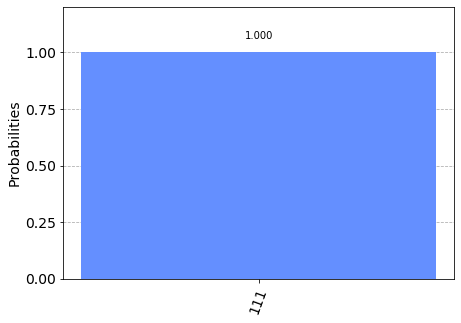

In [ ]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(dj_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

In [ ]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw()

┌───┐     ┌─────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├─────────
     ├───┤     │         │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├──────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Oracle ├┤ H ├─╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4        ├──────╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3

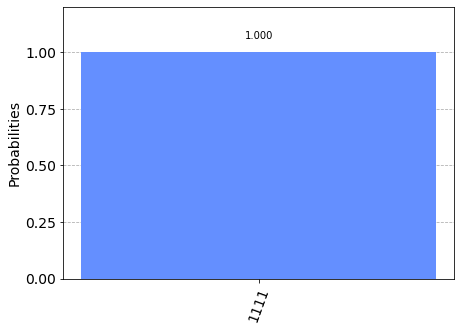

In [ ]:
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
qobj = assemble(transpiled_dj_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

least busy backend:  ibmq_quito
Job Status: job has successfully run


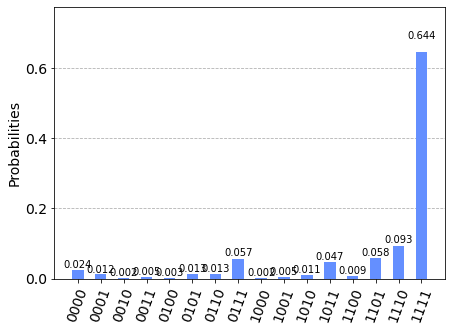

In [ ]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.enable_account('99e1dd08f2c46188b04a339f1db939ca95b546d2f5ce04176d8a47effe5a12c21cf224a58afb38ee95effeeba182ac34cd14fc18f276cd5ef7948e910f68eea5')
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(dj_circuit, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

Bernstein-Vazirani Algorithm

In [ ]:
#from qiskit_textbook.widgets import bv_widget
#bv_widget(2, "11")

n = 3 # number of qubits used to represent s
s = '011'   # the hidden binary string

# We need a circuit with n qubits, plus one auxiliary qubit
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(n+1, n)

# put auxiliary in state |->
bv_circuit.h(n)
bv_circuit.z(n)

# Apply Hadamard gates before querying the oracle
for i in range(n):
    bv_circuit.h(i)
    
# Apply barrier 
bv_circuit.barrier()

# Apply the inner-product oracle
s = s[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)
        
# Apply barrier 
bv_circuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw()

┌───┐      ░                 ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░───■─────────────░─┤ H ├┤M├──────
     ├───┤      ░   │             ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░───┼─────────■───░─┤ H ├─╫─┤M├───
     ├───┤      ░   │  ┌───┐  │   ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░───┼──┤ I ├──┼───░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐└───┘┌─┴─┐ ░ └───┘ ║  ║ └╥┘
q_3: ┤ H ├┤ Z ├─░─┤ X ├─────┤ X ├─░───────╫──╫──╫─
     └───┘└───┘ ░ └───┘     └───┘ ░       ║  ║  ║ 
c: 3/═════════════════════════════════════╩══╩══╩═
                                          0  1  2

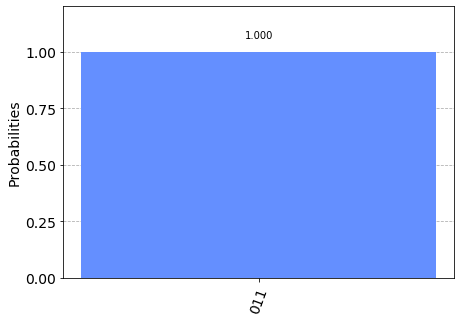

In [ ]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(bv_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

In [ ]:
IBMQ.enable_account('99e1dd08f2c46188b04a339f1db939ca95b546d2f5ce04176d8a47effe5a12c21cf224a58afb38ee95effeeba182ac34cd14fc18f276cd5ef7948e910f68eea5')
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
                                   x.configuration().n_qubits >= 2 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_quito


In [ ]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_bv_circuit = transpile(bv_circuit, backend)
job = backend.run(transpiled_bv_circuit, shots=shots)

job_monitor(job, interval=2)

Job Status: job has successfully run


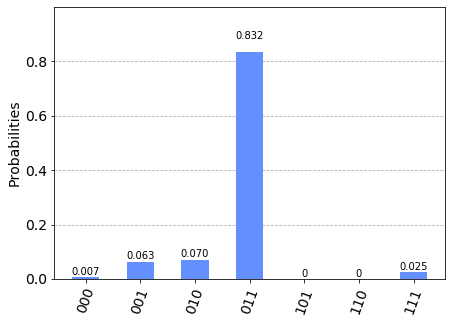

In [ ]:
# Get the results from the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

Simon's Algorithm

In [ ]:
from qiskit_textbook.tools import simon_oracle

b = '110'

n = len(b)
simon_circuit = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit.h(range(n))    
    
# Apply barrier for visual separation
simon_circuit.barrier()

simon_circuit += simon_oracle(b)

# Apply barrier for visual separation
simon_circuit.barrier()

# Apply Hadamard gates to the input register
simon_circuit.h(range(n))

# Measure qubits
simon_circuit.measure(range(n), range(n))
simon_circuit.draw()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  


┌───┐ ░                           ░ ┌───┐┌─┐      
q_0: ┤ H ├─░───■───────────────────────░─┤ H ├┤M├──────
     ├───┤ ░   │                       ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├─░───┼────■─────────■────■───░─┤ H ├─╫─┤M├───
     ├───┤ ░   │    │         │    │   ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─░───┼────┼────■────┼────┼───░─┤ H ├─╫──╫─┤M├
     └───┘ ░ ┌─┴─┐  │    │    │    │   ░ └───┘ ║  ║ └╥┘
q_3: ──────░─┤ X ├──┼────┼────┼────┼───░───────╫──╫──╫─
           ░ └───┘┌─┴─┐  │  ┌─┴─┐  │   ░       ║  ║  ║ 
q_4: ──────░──────┤ X ├──┼──┤ X ├──┼───░───────╫──╫──╫─
           ░      └───┘┌─┴─┐└───┘┌─┴─┐ ░       ║  ║  ║ 
q_5: ──────░───────────┤ X ├─────┤ X ├─░───────╫──╫──╫─
           ░           └───┘     └───┘ ░       ║  ║  ║ 
c: 3/══════════════════════════════════════════╩══╩══╩═
                                               0  1  2

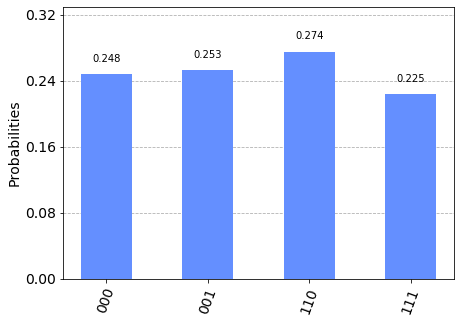

In [ ]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(simon_circuit, shots=shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [ ]:
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )

110.111 = 0 (mod 2)
110.000 = 0 (mod 2)
110.110 = 0 (mod 2)
110.001 = 0 (mod 2)


In [ ]:
b = '11'
n = len(b)
simon_circuit_2 = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit_2.h(range(n))

# Query oracle
simon_circuit_2 += simon_oracle(b)

# Apply Hadamard gates to the input register
simon_circuit_2.h(range(n))

# Measure qubits
simon_circuit_2.measure(range(n), range(n))
simon_circuit_2.draw()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  if __name__ == '__main__':


┌───┐                         ┌───┐┌─┐
q_0: ┤ H ├──■─────────■─────────■──┤ H ├┤M├
     ├───┤  │         │  ┌───┐  │  └┬─┬┘└╥┘
q_1: ┤ H ├──┼────■────┼──┤ H ├──┼───┤M├──╫─
     └───┘┌─┴─┐  │  ┌─┴─┐└───┘  │   └╥┘  ║ 
q_2: ─────┤ X ├──┼──┤ X ├───────┼────╫───╫─
          └───┘┌─┴─┐└───┘     ┌─┴─┐  ║   ║ 
q_3: ──────────┤ X ├──────────┤ X ├──╫───╫─
               └───┘          └───┘  ║   ║ 
c: 2/════════════════════════════════╩═══╩═
                                     1   0

In [ ]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
IBMQ.enable_account('99e1dd08f2c46188b04a339f1db939ca95b546d2f5ce04176d8a47effe5a12c21cf224a58afb38ee95effeeba182ac34cd14fc18f276cd5ef7948e910f68eea5')
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n*2 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

# Execute and monitor the job
from qiskit.tools.monitor import job_monitor
shots = 1024
transpiled_simon_circuit = transpile(simon_circuit_2, backend, optimization_level=3)
qobj = assemble(transpiled_simon_circuit, shots=shots)
job = backend.run(qobj)
job_monitor(job, interval=2)

least busy backend:  ibmq_quito


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  del sys.path[0]


Job Status: job has successfully run


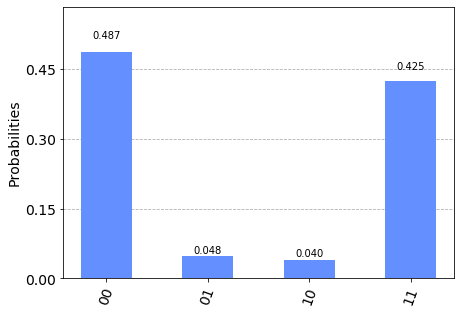

In [ ]:
# Get results and plot counts
device_counts = job.result().get_counts()
plot_histogram(device_counts)

In [ ]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

print('b = ' + b)
for z in device_counts:
    print( '{}.{} = {} (mod 2) ({:.1f}%)'.format(b, z, bdotz(b,z), device_counts[z]*100/shots))

b = 11
11.00 = 0 (mod 2) (48.7%)
11.01 = 1 (mod 2) (4.8%)
11.10 = 1 (mod 2) (4.0%)
11.11 = 0 (mod 2) (42.5%)


Quantum Fourier Transform

In [ ]:
def qft_rotations(circuit, n):
    if n == 0: # Exit function if circuit is empty
        return circuit
    n -= 1 # Indexes start from 0
    circuit.h(n) # Apply the H-gate to the most significant qubit
    for qubit in range(n):
        # For each less significant qubit, we need to do a
        # smaller-angled controlled rotation: 
        circuit.cp(pi/2**(n-qubit), qubit, n)

In [ ]:
from qiskit_textbook.widgets import scalable_circuit
scalable_circuit(qft_rotations)

IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xfb\x00\x00\x01\x08\x08\x06\x00\x00\x00X\x8d]e\x…

In [ ]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

# Let's see how it looks:
qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw()

┌───┐
q_0: ──────■───────────────────────────────■──────────────────────■───────┤ H ├
           │                               │                ┌───┐ │P(π/2) └───┘
q_1: ──────┼────────■──────────────────────┼────────■───────┤ H ├─■────────────
           │        │                ┌───┐ │P(π/4)  │P(π/2) └───┘              
q_2: ──────┼────────┼────────■───────┤ H ├─■────────■──────────────────────────
     ┌───┐ │P(π/8)  │P(π/4)  │P(π/2) └───┘                                     
q_3: ┤ H ├─■────────■────────■─────────────────────────────────────────────────
     └───┘

In [ ]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Let's see how it looks:
qc = QuantumCircuit(4)
qft(qc,4)
qc.draw(fold=-1)

┌───┐   
q_0: ──────■───────────────────────────────■──────────────────────■───────┤ H ├─X─
           │                               │                ┌───┐ │P(π/2) └───┘ │ 
q_1: ──────┼────────■──────────────────────┼────────■───────┤ H ├─■─────────X───┼─
           │        │                ┌───┐ │P(π/4)  │P(π/2) └───┘           │   │ 
q_2: ──────┼────────┼────────■───────┤ H ├─■────────■───────────────────────X───┼─
     ┌───┐ │P(π/8)  │P(π/4)  │P(π/2) └───┘                                      │ 
q_3: ┤ H ├─■────────■────────■──────────────────────────────────────────────────X─
     └───┘

In [ ]:
scalable_circuit(qft)

IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04U\x00\x00\x01\x08\x08\x06\x00\x00\x00\x9eK\xcbE\x…

In [ ]:
bin(5)

'0b101'

In [ ]:
# Create the circuit
qc = QuantumCircuit(3)

# Encode the state 5
qc.x(0)
qc.x(2)
qc.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘

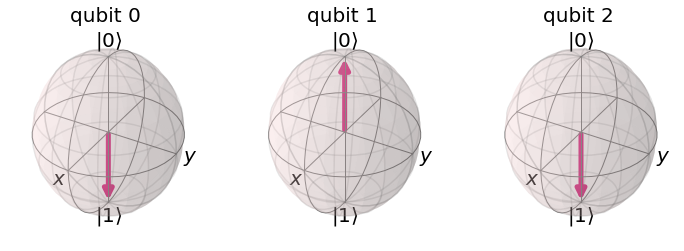

In [ ]:
sim = Aer.get_backend('aer_simulator')
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

In [ ]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

In [ ]:
nqubits = 3
number = 5
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/4,0)
qc.p(number*pi/2,1)
qc.p(number*pi,2)

qc.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤ P(5π/4) ├
     ├───┤├─────────┤
q_1: ┤ H ├┤ P(5π/2) ├
     ├───┤└┬───────┬┘
q_2: ┤ H ├─┤ P(5π) ├─
     └───┘ └───────┘

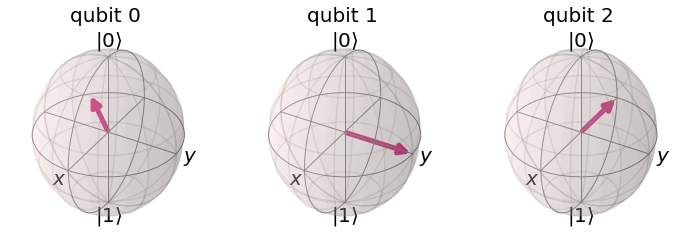

In [ ]:
qc_init = qc.copy()
qc_init.save_statevector()
sim = Aer.get_backend("aer_simulator")
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

In [ ]:
qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw()

┌─────────┐┌─────────────┐   ┌───┐                                   »
   q_0: ┤ U2(0,π) ├┤ U(0,0,5π/4) ├─X─┤ H ├─■────────────────────────■────────»
        ├─────────┤├─────────────┤ │ └───┘ │P(-π/2) ┌───┐           │        »
   q_1: ┤ U2(0,π) ├┤ U(0,0,5π/2) ├─┼───────■────────┤ H ├─■─────────┼────────»
        ├─────────┤└┬───────────┬┘ │                └───┘ │P(-π/2)  │P(-π/4) »
   q_2: ┤ U2(0,π) ├─┤ U(0,0,5π) ├──X──────────────────────■─────────■────────»
        └─────────┘ └───────────┘                                            »
meas: 3/═════════════════════════════════════════════════════════════════════»
                                                                             »
«              ░ ┌─┐      
«   q_0: ──────░─┤M├──────
«              ░ └╥┘┌─┐   
«   q_1: ──────░──╫─┤M├───
«        ┌───┐ ░  ║ └╥┘┌─┐
«   q_2: ┤ H ├─░──╫──╫─┤M├
«        └───┘ ░  ║  ║ └╥┘
«meas: 3/═════════╩══╩══╩═
«                 0  1  2

In [ ]:
IBMQ.enable_account('99e1dd08f2c46188b04a339f1db939ca95b546d2f5ce04176d8a47effe5a12c21cf224a58afb38ee95effeeba182ac34cd14fc18f276cd5ef7948e910f68eea5')
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqubits 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_quito


In [ ]:
shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
job_monitor(job)

Job Status: job has successfully run


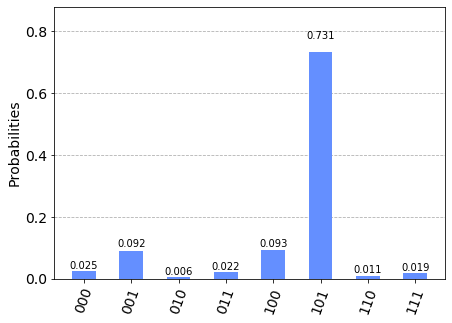

In [ ]:
counts = job.result().get_counts()
plot_histogram(counts)

Quantum Phase Estimation

In [ ]:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

In [ ]:
# Create and set up circuit
qpe2 = QuantumCircuit(4, 3)

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe2.h(qubit)

# Prepare our eigenstate |psi>:
qpe2.x(3)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe2, 3)

# Measure of course!
for n in range(3):
    qpe2.measure(n,n)

qpe2.draw(fold=-1)

┌───┐                                                                         ┌───┐                                   ┌─┐           
q_0: ┤ H ├─■─────────────────────────────────────────────────────────────────────X─┤ H ├─■──────────────■──────────────────┤M├───────────
     ├───┤ │                                                                     │ └───┘ │P(-π/2) ┌───┐ │                  └╥┘     ┌─┐   
q_1: ┤ H ├─┼─────────■─────────■─────────────────────────────────────────────────┼───────■────────┤ H ├─┼─────────■─────────╫──────┤M├───
     ├───┤ │         │         │                                                 │                └───┘ │P(-π/4)  │P(-π/2)  ║ ┌───┐└╥┘┌─┐
q_2: ┤ H ├─┼─────────┼─────────┼─────────■─────────■─────────■─────────■─────────X──────────────────────■─────────■─────────╫─┤ H ├─╫─┤M├
     ├───┤ │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)                                             ║ └───┘ ║ └╥┘
q_3: ┤ X ├─■─────────■─────────■─────────■─────────■─────────■─────────■────────────────────────────────────────────────────╫───────╫──╫─
     └───┘                                                                                                                  ║       ║  ║ 
c: 3/═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩═══════╩══╩═
                                                                                                                            0       1  2

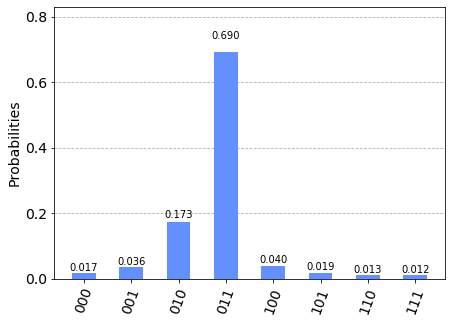

In [ ]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe2 = transpile(qpe2, aer_sim)
qobj = assemble(t_qpe2, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

In [ ]:
# Create and set up circuit
qpe3 = QuantumCircuit(6, 5)

# Apply H-Gates to counting qubits:
for qubit in range(5):
    qpe3.h(qubit)

# Prepare our eigenstate |psi>:
qpe3.x(5)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cp(angle, counting_qubit, 5);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe3, 5)

# Measure of course!
qpe3.barrier()
for n in range(5):
    qpe3.measure(n,n)

qpe3.draw(fold=-1)

┌───┐                                                                                                                                                                                                                                                                                                                         ┌───┐                                                                                                                          ░ ┌─┐            
q_0: ┤ H ├─■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────X─┤ H ├─■──────────────■───────────────────■────────────────────────■────────────────────────────────────────────────────────────░─┤M├────────────
     ├───┤ │                                                                                                                                                                                                                                                                                                                     │ └───┘ │P(-π/2) ┌───┐ │                   │                        │                                                            ░ └╥┘┌─┐         
q_1: ┤ H ├─┼─────────■─────────■────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────X────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼───────■────────┤ H ├─┼─────────■─────────┼──────────────■─────────┼────────────────────■───────────────────────────────────────░──╫─┤M├─────────
     ├───┤ │         │         │                                                                                                                                    │                                                                                                                                                            │                └───┘ │P(-π/4)  │P(-π/2)  │        ┌───┐ │         │                    │                                       ░  ║ └╥┘┌─┐      
q_2: ┤ H ├─┼─────────┼─────────┼─────────■─────────■─────────■─────────■────────────────────────────────────────────────────────────────────────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼──────────────────────■─────────■─────────┼────────┤ H ├─┼─────────┼──────────■─────────┼──────────────■────────────────────────░──╫──╫─┤M├──────
     ├───┤ │         │         │         │         │         │         │                                                                                            │                                                                                                                                                            │                                          │P(-π/8) └───┘ │P(-π/4)  │          │P(-π/2)  │        ┌───┐ │                        ░  ║  ║ └╥┘┌─┐   
q_3: ┤ H ├─┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────■─────────■─────────■─────────■─────────■─────────■─────────■─────────■────────────X────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼──────────────────────────────────────────■──────────────■─────────┼──────────■─────────┼────────┤ H ├─┼─────────■──────────────░──╫──╫──╫─┤M├───
     ├───┤ │         │         │         │         │         │         │         │         │         │         │         │         │         │         │                                                                                                             

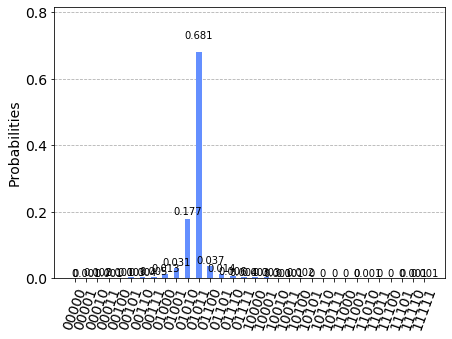

In [ ]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe3 = transpile(qpe3, aer_sim)
qobj = assemble(t_qpe3, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

In [ ]:
IBMQ.enable_account('99e1dd08f2c46188b04a339f1db939ca95b546d2f5ce04176d8a47effe5a12c21cf224a58afb38ee95effeeba182ac34cd14fc18f276cd5ef7948e910f68eea5')
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub='ibm-q')
santiago = provider.get_backend('ibmq_quito')

# Run with 2048 shots
shots = 2048
t_qpe = transpile(qpe2, santiago, optimization_level=3)
job = santiago.run(t_qpe, shots=shots)
job_monitor(job)

Job Status: job has successfully run


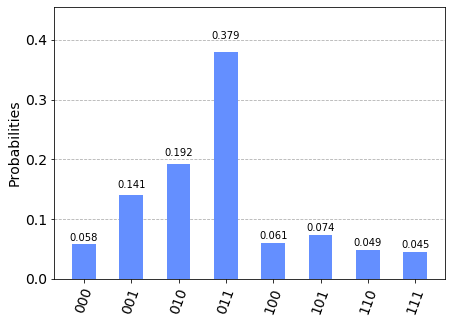

In [ ]:
# get the results from the computation
results = job.result()
answer = results.get_counts(qpe2)

plot_histogram(answer)

Shor's Algorithm

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
print("Imports Successful")

Imports Successful


In [ ]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

In [ ]:
# Specify variables
n_count = 8  # number of counting qubits
a = 7

In [ ]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

In [ ]:
# Create QuantumCircuit with n_count counting qubits
# plus 4 qubits for U to act on
qc = QuantumCircuit(n_count + 4, n_count)

# Initialize counting qubits
# in state |+>
for q in range(n_count):
    qc.h(q)
    
# And auxiliary register in state |1>
qc.x(3+n_count)

# Do controlled-U operations
for q in range(n_count):
    qc.append(c_amod15(a, 2**q), 
             [q] + [i+n_count for i in range(4)])

# Do inverse-QFT
qc.append(qft_dagger(n_count), range(n_count))

# Measure circuit
qc.measure(range(n_count), range(n_count))
qc.draw(fold=-1)  # -1 means 'do not fold' 

┌───┐                                                                                                                             ┌───────┐┌─┐                     
 q_0: ┤ H ├───────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0      ├┤M├─────────────────────
      ├───┤       │                                                                                                                     │       │└╥┘┌─┐                  
 q_1: ┤ H ├───────┼──────────────■──────────────────────────────────────────────────────────────────────────────────────────────────────┤1      ├─╫─┤M├──────────────────
      ├───┤       │              │                                                                                                      │       │ ║ └╥┘┌─┐               
 q_2: ┤ H ├───────┼──────────────┼──────────────■───────────────────────────────────────────────────────────────────────────────────────┤2      ├─╫──╫─┤M├───────────────
      ├───┤       │              │              │                                                                                       │       │ ║  ║ └╥┘┌─┐            
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■────────────────────────────────────────────────────────────────────────┤3      ├─╫──╫──╫─┤M├────────────
      ├───┤       │              │              │              │                                                                        │  QFT† │ ║  ║  ║ └╥┘┌─┐         
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────■─────────────────────────────────────────────────────────┤4      ├─╫──╫──╫──╫─┤M├─────────
      ├───┤       │              │              │              │              │                                                         │       │ ║  ║  ║  ║ └╥┘┌─┐      
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────■─────────────────────────────────────────┤5      ├─╫──╫──╫──╫──╫─┤M├──────
      ├───┤       │              │              │              │              │               │                                         │       │ ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────■─────────────────────────┤6      ├─╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤       │              │              │              │              │               │               │                         │       │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────┼────────────────■────────┤7      ├─╫──╫──╫──╫──╫──╫──╫─┤M├
      └───┘┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐└───────┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
 q_8: ─────┤0            ├┤0            ├┤0            ├┤0            ├┤0             ├┤0             ├┤0             ├┤0              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
 q_9: ─────┤1            ├┤1            ├┤1            ├┤1            ├┤1             ├┤1             ├┤1             ├┤1              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 ││  7^16 mod 15 ││  7^32 mod 15 ││  7^64 mod 15 ││  7^128 mod 15 │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_10: ─────┤2            ├┤2            ├┤2            ├┤2            ├┤2             ├┤2             ├┤2             ├┤2              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
      ┌───┐│             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_11: ┤ X ├┤3            ├┤3            ├┤3            ├┤3            ├┤3             ├┤3       

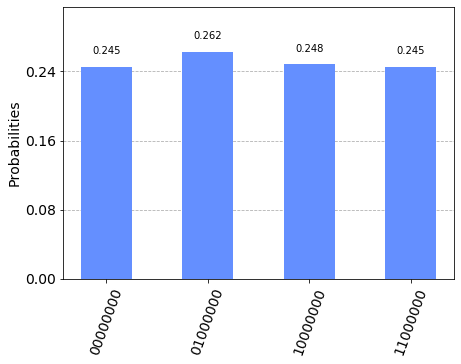

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [ ]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", 
                 f"{decimal}/{2**n_count} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

            Register Output           Phase
0  01000000(bin) =  64(dec)   64/256 = 0.25
1  00000000(bin) =   0(dec)    0/256 = 0.00
2  10000000(bin) = 128(dec)  128/256 = 0.50
3  11000000(bin) = 192(dec)  192/256 = 0.75


In [ ]:
Fraction(0.666)
# Get fraction that most closely resembles 0.666
# with denominator < 15
Fraction(0.666).limit_denominator(15)

Fraction(2, 3)

In [ ]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0   0.25      1/4            4
1   0.00      0/1            1
2   0.50      1/2            2
3   0.75      3/4            4


In [ ]:
def a2jmodN(a, j, N):
    """Compute a^{2^j} (mod N) by repeated squaring"""
    for i in range(j):
        a = np.mod(a**2, N)
    return a
a2jmodN(7, 2049, 53)

47

In [ ]:
N = 15
np.random.seed(1) # This is to make sure we get reproduceable results
a = randint(2, 15)
print(a)
from math import gcd # greatest common divisor
gcd(a, N)

7


1

In [ ]:
def qpe_amod15(a):
    n_count = 8
    qc = QuantumCircuit(4+n_count, n_count)
    for q in range(n_count):
        qc.h(q)     # Initialize counting qubits in state |+>
    qc.x(3+n_count) # And auxiliary register in state |1>
    for q in range(n_count): # Do controlled-U operations
        qc.append(c_amod15(a, 2**q), 
                 [q] + [i+n_count for i in range(4)])
    qc.append(qft_dagger(n_count), range(n_count)) # Do inverse-QFT
    qc.measure(range(n_count), range(n_count))
    # Simulate Results
    aer_sim = Aer.get_backend('aer_simulator')
    # Setting memory=True below allows us to see a list of each sequential reading
    t_qc = transpile(qc, aer_sim)
    qobj = assemble(t_qc, shots=1)
    result = aer_sim.run(qobj, memory=True).result()
    readings = result.get_memory()
    print("Register Reading: " + readings[0])
    phase = int(readings[0],2)/(2**n_count)
    print("Corresponding Phase: %f" % phase)
    return phase

In [ ]:
phase = qpe_amod15(a) # Phase = s/r
Fraction(phase).limit_denominator(15) # Denominator should (hopefully!) tell us r

Register Reading: 11000000
Corresponding Phase: 0.750000


Fraction(3, 4)

In [ ]:
frac = Fraction(phase).limit_denominator(15)
s, r = frac.numerator, frac.denominator
print(r)

4


In [ ]:
guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
print(guesses)

[3, 5]


In [ ]:
a = 7
factor_found = False
attempt = 0
while not factor_found:
    attempt += 1
    print("\nAttempt %i:" % attempt)
    phase = qpe_amod15(a) # Phase = s/r
    frac = Fraction(phase).limit_denominator(N) # Denominator should (hopefully!) tell us r
    r = frac.denominator
    print("Result: r = %i" % r)
    if phase != 0:
        # Guesses for factors are gcd(x^{r/2} ±1 , 15)
        guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
        print("Guessed Factors: %i and %i" % (guesses[0], guesses[1]))
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0: # Check to see if guess is a factor
                print("*** Non-trivial factor found: %i ***" % guess)
                factor_found = True


Attempt 1:
Register Reading: 01000000
Corresponding Phase: 0.250000
Result: r = 4
Guessed Factors: 3 and 5
*** Non-trivial factor found: 3 ***
*** Non-trivial factor found: 5 ***


Grover's Algorithm

In [ ]:
n = 2
grover_circuit = QuantumCircuit(n)
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.cz(0,1) # Oracle
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw()

┌───┐   ┌───┐┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     ├───┤ │ ├───┤├───┤ │ ├───┤
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     └───┘   └───┘└───┘   └───┘

In [ ]:
sim = Aer.get_backend('aer_simulator')
# we need to make a copy of the circuit with the 'save_statevector'
# instruction to run on the Aer simulator
grover_circuit_sim = grover_circuit.copy()
grover_circuit_sim.save_statevector()
qobj = assemble(grover_circuit_sim)
result = sim.run(qobj).result()
statevec = result.get_statevector()
from qiskit_textbook.tools import vector2latex
vector2latex(statevec, pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

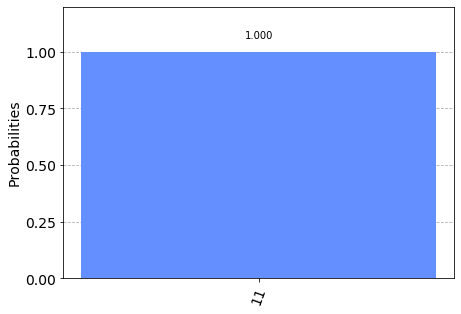

In [ ]:
grover_circuit.measure_all()

aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
# Load IBM Q account and get the least busy backend device
provider = IBMQ.enable_account('99e1dd08f2c46188b04a339f1db939ca95b546d2f5ce04176d8a47effe5a12c21cf224a58afb38ee95effeeba182ac34cd14fc18f276cd5ef7948e910f68eea5')
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: int(x.configuration().n_qubits) >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

Running on current least busy device:  ibmq_quito


In [ ]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


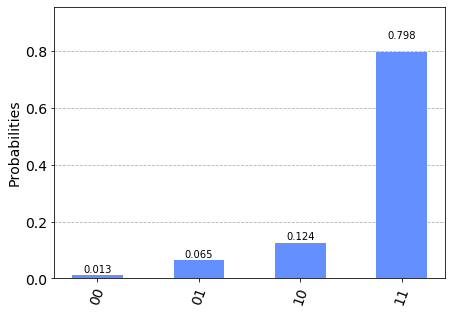

In [ ]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)

In [ ]:
qc = QuantumCircuit(3)
qc.cz(0, 2)
qc.cz(1, 2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U$_\omega$"

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

n = 3
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.append(oracle_ex3, [0,1,2])
grover_circuit.append(diffuser(n), [0,1,2])
grover_circuit.measure_all()
grover_circuit.draw()

┌───┐┌─────────────┐┌────────┐ ░ ┌─┐      
   q_0: ┤ H ├┤0            ├┤0       ├─░─┤M├──────
        ├───┤│             ││        │ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤1 U$_\omega$ ├┤1 U$_s$ ├─░──╫─┤M├───
        ├───┤│             ││        │ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤2            ├┤2       ├─░──╫──╫─┤M├
        └───┘└─────────────┘└────────┘ ░  ║  ║ └╥┘
meas: 3/══════════════════════════════════╩══╩══╩═
                                          0  1  2

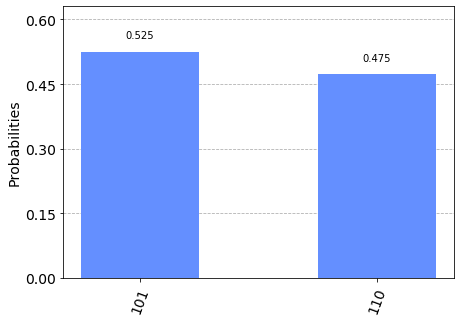

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [ ]:
backend = least_busy(provider.backends(filters=lambda x: int(x.configuration().n_qubits) >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_quito


In [ ]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


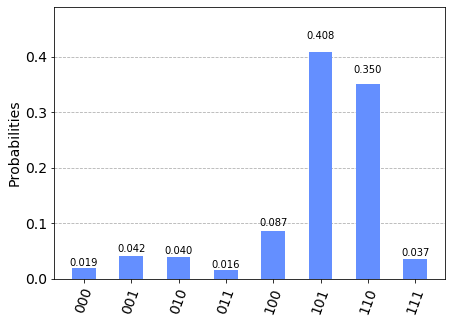

In [ ]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)

In [ ]:
from qiskit_textbook.problems import grover_problem_oracle
## Example Usage
n = 4
oracle = grover_problem_oracle(n, variant=1)  # 0th variant of oracle, with n qubits
qc = QuantumCircuit(n)
qc.append(oracle, [0,1,2,3])
qc.draw()

┌────────────────────┐
q_0: ┤0                   ├
     │                    │
q_1: ┤1                   ├
     │  Oracle
n=4, var=1 │
q_2: ┤2                   ├
     │                    │
q_3: ┤3                   ├
     └────────────────────┘

In [ ]:
clause_list = [[0,1],
               [0,2],
               [1,3],
               [2,3]]

def XOR(qc, a, b, output):
    qc.cx(a, output)
    qc.cx(b, output)
    
# We will use separate registers to name the bits
in_qubits = QuantumRegister(2, name='input')
out_qubit = QuantumRegister(1, name='output')
qc = QuantumCircuit(in_qubits, out_qubit)
XOR(qc, in_qubits[0], in_qubits[1], out_qubit)
qc.draw()

input_0: ──■───────
           │       
input_1: ──┼────■──
         ┌─┴─┐┌─┴─┐
 output: ┤ X ├┤ X ├
         └───┘└───┘

In [ ]:
# Create separate registers to name bits
var_qubits = QuantumRegister(4, name='v')  # variable bits
clause_qubits = QuantumRegister(4, name='c')  # bits to store clause-checks

# Create quantum circuit
qc = QuantumCircuit(var_qubits, clause_qubits)

# Use XOR gate to check each clause
i = 0
for clause in clause_list:
    XOR(qc, clause[0], clause[1], clause_qubits[i])
    i += 1

qc.draw()

v_0: ──■─────────■───────────────────────────
       │         │                           
v_1: ──┼────■────┼─────────■─────────────────
       │    │    │         │                 
v_2: ──┼────┼────┼────■────┼─────────■───────
       │    │    │    │    │         │       
v_3: ──┼────┼────┼────┼────┼────■────┼────■──
     ┌─┴─┐┌─┴─┐  │    │    │    │    │    │  
c_0: ┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼──
     └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │  
c_1: ──────────┤ X ├┤ X ├──┼────┼────┼────┼──
               └───┘└───┘┌─┴─┐┌─┴─┐  │    │  
c_2: ────────────────────┤ X ├┤ X ├──┼────┼──
                         └───┘└───┘┌─┴─┐┌─┴─┐
c_3: ──────────────────────────────┤ X ├┤ X ├
                                   └───┘└───┘

In [ ]:
# Create separate registers to name bits
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit)

# Compute clauses
i = 0
for clause in clause_list:
    XOR(qc, clause[0], clause[1], clause_qubits[i])
    i += 1

# Flip 'output' bit if all clauses are satisfied
qc.mct(clause_qubits, output_qubit)

qc.draw()

v_0: ──■─────────■────────────────────────────────
       │         │                                
v_1: ──┼────■────┼─────────■──────────────────────
       │    │    │         │                      
v_2: ──┼────┼────┼────■────┼─────────■────────────
       │    │    │    │    │         │            
v_3: ──┼────┼────┼────┼────┼────■────┼────■───────
     ┌─┴─┐┌─┴─┐  │    │    │    │    │    │       
c_0: ┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼────■──
     └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │    │  
c_1: ──────────┤ X ├┤ X ├──┼────┼────┼────┼────■──
               └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │  
c_2: ────────────────────┤ X ├┤ X ├──┼────┼────■──
                         └───┘└───┘┌─┴─┐┌─┴─┐  │  
c_3: ──────────────────────────────┤ X ├┤ X ├──■──
                                   └───┘└───┘┌─┴─┐
out: ────────────────────────────────────────┤ X ├
                                             └───┘

In [ ]:
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

def sudoku_oracle(qc, clause_list, clause_qubits):
    # Compute clauses
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

    # Flip 'output' bit if all clauses are satisfied
    qc.mct(clause_qubits, output_qubit)

    # Uncompute clauses to reset clause-checking bits to 0
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

sudoku_oracle(qc, clause_list, clause_qubits)
qc.draw(fold=-1)

v_0: ──■─────────■──────────────────────────────────■─────────■───────────────────────────
           │         │                                  │         │                           
    v_1: ──┼────■────┼─────────■────────────────────────┼────■────┼─────────■─────────────────
           │    │    │         │                        │    │    │         │                 
    v_2: ──┼────┼────┼────■────┼─────────■──────────────┼────┼────┼────■────┼─────────■───────
           │    │    │    │    │         │              │    │    │    │    │         │       
    v_3: ──┼────┼────┼────┼────┼────■────┼────■─────────┼────┼────┼────┼────┼────■────┼────■──
         ┌─┴─┐┌─┴─┐  │    │    │    │    │    │       ┌─┴─┐┌─┴─┐  │    │    │    │    │    │  
    c_0: ┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼────■──┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼──
         └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │    │  └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │  
    c_1: ──────────┤ X ├┤ X ├──┼────┼────┼────┼────■────────────┤ X ├┤ X ├──┼────┼────┼────┼──
                   └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │            └───┘└───┘┌─┴─┐┌─┴─┐  │    │  
    c_2: ────────────────────┤ X ├┤ X ├──┼────┼────■──────────────────────┤ X ├┤ X ├──┼────┼──
                             └───┘└───┘┌─┴─┐┌─┴─┐  │                      └───┘└───┘┌─┴─┐┌─┴─┐
    c_3: ──────────────────────────────┤ X ├┤ X ├──■────────────────────────────────┤ X ├┤ X ├
                                       └───┘└───┘┌─┴─┐                              └───┘└───┘
    out: ────────────────────────────────────────┤ X ├────────────────────────────────────────
                                                 └───┘                                        
cbits: 4/═════════════════════════════════════════════════════════════════════════════════════

In [ ]:
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

# Initialize 'out0' in state |->
qc.initialize([1, -1]/np.sqrt(2), output_qubit)

# Initialize qubits in state |s>
qc.h(var_qubits)
qc.barrier()  # for visual separation

## First Iteration
# Apply our oracle
sudoku_oracle(qc, clause_list, clause_qubits)
qc.barrier()  # for visual separation
# Apply our diffuser
qc.append(diffuser(4), [0,1,2,3])

## Second Iteration
sudoku_oracle(qc, clause_list, clause_qubits)
qc.barrier()  # for visual separation
# Apply our diffuser
qc.append(diffuser(4), [0,1,2,3])

# Measure the variable qubits
qc.measure(var_qubits, cbits)

qc.draw(fold=-1)

┌───┐               ░                                                                                       ░ ┌────────┐                                                                                      ░ ┌────────┐┌─┐         
    v_0: ─────────────┤ H ├───────────────░───■─────────■──────────────────────────────────■─────────■────────────────────────────░─┤0       ├──■─────────■──────────────────────────────────■─────────■────────────────────────────░─┤0       ├┤M├─────────
                      ├───┤               ░   │         │                                  │         │                            ░ │        │  │         │                                  │         │                            ░ │        │└╥┘┌─┐      
    v_1: ─────────────┤ H ├───────────────░───┼────■────┼─────────■────────────────────────┼────■────┼─────────■──────────────────░─┤1       ├──┼────■────┼─────────■────────────────────────┼────■────┼─────────■──────────────────░─┤1       ├─╫─┤M├──────
                      ├───┤               ░   │    │    │         │                        │    │    │         │                  ░ │  U$_s$ │  │    │    │         │                        │    │    │         │                  ░ │  U$_s$ │ ║ └╥┘┌─┐   
    v_2: ─────────────┤ H ├───────────────░───┼────┼────┼────■────┼─────────■──────────────┼────┼────┼────■────┼─────────■────────░─┤2       ├──┼────┼────┼────■────┼─────────■──────────────┼────┼────┼────■────┼─────────■────────░─┤2       ├─╫──╫─┤M├───
                      ├───┤               ░   │    │    │    │    │         │              │    │    │    │    │         │        ░ │        │  │    │    │    │    │         │              │    │    │    │    │         │        ░ │        │ ║  ║ └╥┘┌─┐
    v_3: ─────────────┤ H ├───────────────░───┼────┼────┼────┼────┼────■────┼────■─────────┼────┼────┼────┼────┼────■────┼────■───░─┤3       ├──┼────┼────┼────┼────┼────■────┼────■─────────┼────┼────┼────┼────┼────■────┼────■───░─┤3       ├─╫──╫──╫─┤M├
                      └───┘               ░ ┌─┴─┐┌─┴─┐  │    │    │    │    │    │       ┌─┴─┐┌─┴─┐  │    │    │    │    │    │   ░ └────────┘┌─┴─┐┌─┴─┐  │    │    │    │    │    │       ┌─┴─┐┌─┴─┐  │    │    │    │    │    │   ░ └────────┘ ║  ║  ║ └╥┘
    c_0: ─────────────────────────────────░─┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼────■──┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼───░───────────┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼────■──┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼───░────────────╫──╫──╫──╫─
                                          ░ └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │    │  └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │   ░           └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │    │  └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │   ░            ║  ║  ║  ║ 
    c_1: ─────────────────────────────────░───────────┤ X ├┤ X ├──┼────┼────┼────┼────■────────────┤ X ├┤ X ├──┼────┼────┼────┼───░─────────────────────┤ X ├┤ X ├──┼────┼────┼────┼────■────────────┤ X ├┤ X ├──┼────┼────┼────┼───░────────────╫──╫──╫──╫─
                                          ░           └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │            └───┘└───┘┌─┴─┐┌─┴─┐  │    │   ░                     └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │            └───┘└───┘┌─┴─┐┌─┴─┐  │    │   ░            ║  ║  ║  ║ 
    c_2: ─────────────────────────────────░─────────────────────┤ X ├┤ X ├──┼────┼────■──────────────────────┤ X ├┤ X ├──┼────┼───░───────────────────────────────┤ X ├┤ X ├──┼────┼────■──────────────────────┤ X ├┤ X ├──┼────┼───░────────────╫──╫──╫──╫─
                                          ░                     └───┘└───┘┌─┴─┐┌─┴─┐  │                      └───┘└───┘┌─┴─┐┌─┴─┐ ░                               └───┘└───┘┌─┴─┐┌─┴─┐  │                      └───┘└───┘┌─┴─┐┌─┴─┐ ░            ║  ║  ║  ║ 
    c_3: ─────────────────────────────────░───────────────────────────────┤ X ├┤ X ├──■────────────────────────────────┤ X ├┤ X ├─░─────────────────────────────────────────┤ X ├┤ X ├──■────────────────────────────────┤ X ├┤ X ├

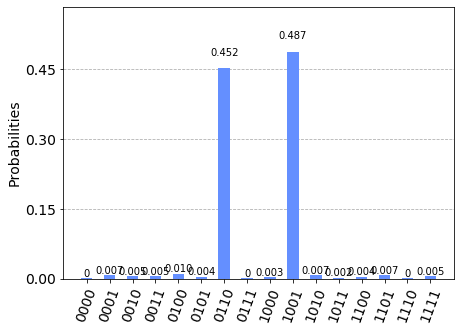

In [ ]:
# Simulate and plot results
aer_simulator = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, aer_simulator)
qobj = assemble(transpiled_qc)
result = aer_sim.run(qobj).result()
plot_histogram(result.get_counts())

Quantum Counting

In [ ]:
def example_grover_iteration():
    """Small circuit with 5/16 solutions"""
    # Do circuit
    qc = QuantumCircuit(4)
    # Oracle
    qc.h([2,3])
    qc.ccx(0,1,2)
    qc.h(2)
    qc.x(2)
    qc.ccx(0,2,3)
    qc.x(2)
    qc.h(3)
    qc.x([1,3])
    qc.h(2)
    qc.mct([0,1,3],2)
    qc.x([1,3])
    qc.h(2)
    # Diffuser
    qc.h(range(3))
    qc.x(range(3))
    qc.z(3)
    qc.mct([0,1,2],3)
    qc.x(range(3))
    qc.h(range(3))
    qc.z(3)
    return qc

# Create controlled-Grover
grit = example_grover_iteration().to_gate()
grit.label = "Grover"
cgrit = grit.control()

def qft(n):
    """Creates an n-qubit QFT circuit"""
    circuit = QuantumCircuit(4)
    def swap_registers(circuit, n):
        for qubit in range(n//2):
            circuit.swap(qubit, n-qubit-1)
        return circuit
    def qft_rotations(circuit, n):
        """Performs qft on the first n qubits in circuit (without swaps)"""
        if n == 0:
            return circuit
        n -= 1
        circuit.h(n)
        for qubit in range(n):
            circuit.cp(np.pi/2**(n-qubit), qubit, n)
        qft_rotations(circuit, n)
    
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

qft_dagger = qft(4).to_gate().inverse()
qft_dagger.label = "QFT†"

# Create QuantumCircuit
t = 4   # no. of counting qubits
n = 4   # no. of searching qubits
qc = QuantumCircuit(n+t, t) # Circuit with n+t qubits and t classical bits

# Initialize all qubits to |+>
for qubit in range(t+n):
    qc.h(qubit)

# Begin controlled Grover iterations
iterations = 1
for qubit in range(t):
    for i in range(iterations):
        qc.append(cgrit, [qubit] + [*range(t, n+t)])
    iterations *= 2
    
# Do inverse QFT on counting qubits
qc.append(qft_dagger, range(t))

# Measure counting qubits
qc.measure(range(t), range(t))

# Display the circuit
qc.draw(fold=-1)

┌───┐                                                                                                                                                                     ┌───────┐┌─┐         
q_0: ┤ H ├─────■───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0      ├┤M├─────────
     ├───┤     │                                                                                                                                                               │       │└╥┘┌─┐      
q_1: ┤ H ├─────┼──────────■──────────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤1      ├─╫─┤M├──────
     ├───┤     │          │          │                                                                                                                                         │  QFT† │ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┼──────────┼──────────┼──────────■──────────■──────────■──────────■─────────────────────────────────────────────────────────────────────────────────────────────┤2      ├─╫──╫─┤M├───
     ├───┤     │          │          │          │          │          │          │                                                                                             │       │ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────■──────────■──────────■──────────■──────────■──────────■──────────■──────────■─────┤3      ├─╫──╫──╫─┤M├
     ├───┤┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐└───────┘ ║  ║  ║ └╥┘
q_4: ┤ H ├┤0        ├┤0        ├┤0        ├┤0        ├┤0        ├┤0        ├┤0        ├┤0        ├┤0        ├┤0        ├┤0        ├┤0        ├┤0        ├┤0        ├┤0        ├──────────╫──╫──╫──╫─
     ├───┤│         ││         ││         ││         ││         ││         ││         ││         ││         ││         ││         ││         ││         ││         ││         │          ║  ║  ║  ║ 
q_5: ┤ H ├┤1        ├┤1        ├┤1        ├┤1        ├┤1        ├┤1        ├┤1        ├┤1        ├┤1        ├┤1        ├┤1        ├┤1        ├┤1        ├┤1        ├┤1        ├──────────╫──╫──╫──╫─
     ├───┤│  Grover ││  Grover ││  Grover ││  Grover ││  Grover ││  Grover ││  Grover ││  Grover ││  Grover ││  Grover ││  Grover ││  Grover ││  Grover ││  Grover ││  Grover │          ║  ║  ║  ║ 
q_6: ┤ H ├┤2        ├┤2        ├┤2        ├┤2        ├┤2        ├┤2        ├┤2        ├┤2        ├┤2        ├┤2        ├┤2        ├┤2        ├┤2        ├┤2        ├┤2        ├──────────╫──╫──╫──╫─
     ├───┤│         ││         ││         ││         ││         ││         ││         ││         ││         ││         ││         ││         ││         ││         ││         │          ║  ║  ║  ║ 
q_7: ┤ H ├┤3        ├┤3        ├┤3        ├┤3        ├┤3        ├┤3        ├┤3        ├┤3        ├┤3        ├┤3        ├┤3        ├┤3        ├┤3        ├┤3        ├┤3        ├──────────╫──╫──╫──╫─
     └───┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘          ║  ║  ║  ║ 
c: 4/════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                                                                                                                                                         0  1  2  3

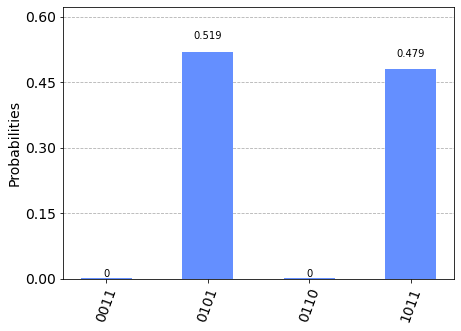

In [ ]:
# Execute and see results
aer_sim = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, aer_sim)
qobj = assemble(transpiled_qc)
job = aer_sim.run(qobj)
hist = job.result().get_counts()
plot_histogram(hist)

In [ ]:
measured_str = max(hist, key=hist.get)
measured_int = int(measured_str,2)
print("Register Output = %i" % measured_int)

theta = (measured_int/(2**t))*math.pi*2
print("Theta = %.5f" % theta)

N = 2**n
M = N * (math.sin(theta/2)**2)
print("No. of Solutions = %.1f" % (N-M))

m = t - 1 # Upper bound: Will be less than this 
err = (math.sqrt(2*M*N) + N/(2**(m+1)))*(2**(-m))
print("Error < %.2f" % err)

def calculate_M(measured_int, t, n):
    """For Processing Output of Quantum Counting"""
    # Calculate Theta
    theta = (measured_int/(2**t))*math.pi*2
    print("Theta = %.5f" % theta)
    # Calculate No. of Solutions
    N = 2**n
    M = N * (math.sin(theta/2)**2)
    print("No. of Solutions = %.1f" % (N-M))
    # Calculate Upper Error Bound
    m = t - 1 #Will be less than this (out of scope) 
    err = (math.sqrt(2*M*N) + N/(2**(m+1)))*(2**(-m))
    print("Error < %.2f" % err)

Register Output = 5
Theta = 1.96350
No. of Solutions = 4.9
Error < 2.48


Quantum Walk Search Algorithm

In [ ]:
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.circuit.library import QFT

#provider = IBMQ.enable_account('99e1dd08f2c46188b04a339f1db939ca95b546d2f5ce04176d8a47effe5a12c21cf224a58afb38ee95effeeba182ac34cd14fc18f276cd5ef7948e910f68eea5')

one_step_circuit = QuantumCircuit(6, name=' ONE STEP') 
# Coin operator
one_step_circuit.h([4,5])
one_step_circuit.z([4,5])
one_step_circuit.cz(4,5)
one_step_circuit.h([4,5])

# Shift operator function for 4d-hypercube
def shift_operator(circuit):
    for i in range(0,4):
        circuit.x(4)
        if i%2==0:
            circuit.x(5)
        circuit.ccx(4,5,i)

shift_operator(one_step_circuit)

one_step_gate = one_step_circuit.to_instruction() 
one_step_circuit.draw()

┌───┐                              
q_0: ───────────────────────┤ X ├──────────────────────────────
                            └─┬─┘     ┌───┐                    
q_1: ─────────────────────────┼───────┤ X ├────────────────────
                              │       └─┬─┘     ┌───┐          
q_2: ─────────────────────────┼─────────┼───────┤ X ├──────────
                              │         │       └─┬─┘     ┌───┐
q_3: ─────────────────────────┼─────────┼─────────┼───────┤ X ├
     ┌───┐┌───┐   ┌───┐┌───┐  │  ┌───┐  │  ┌───┐  │  ┌───┐└─┬─┘
q_4: ┤ H ├┤ Z ├─■─┤ H ├┤ X ├──■──┤ X ├──■──┤ X ├──■──┤ X ├──■──
     ├───┤├───┤ │ ├───┤├───┤  │  └───┘  │  ├───┤  │  └───┘  │  
q_5: ┤ H ├┤ Z ├─■─┤ H ├┤ X ├──■─────────■──┤ X ├──■─────────■──
     └───┘└───┘   └───┘└───┘               └───┘

In [ ]:
one_step_circuit.inverse().draw() 

┌───┐                       
q_0: ──────────────────────────────┤ X ├───────────────────────
                         ┌───┐     └─┬─┘                       
q_1: ────────────────────┤ X ├───────┼─────────────────────────
               ┌───┐     └─┬─┘       │                         
q_2: ──────────┤ X ├───────┼─────────┼─────────────────────────
     ┌───┐     └─┬─┘       │         │                         
q_3: ┤ X ├───────┼─────────┼─────────┼─────────────────────────
     └─┬─┘┌───┐  │  ┌───┐  │  ┌───┐  │  ┌───┐┌───┐   ┌───┐┌───┐
q_4: ──■──┤ X ├──■──┤ X ├──■──┤ X ├──■──┤ X ├┤ H ├─■─┤ Z ├┤ H ├
       │  └───┘  │  ├───┤  │  └───┘  │  ├───┤├───┤ │ ├───┤├───┤
q_5: ──■─────────■──┤ X ├──■─────────■──┤ X ├┤ H ├─■─┤ Z ├┤ H ├
                    └───┘               └───┘└───┘   └───┘└───┘

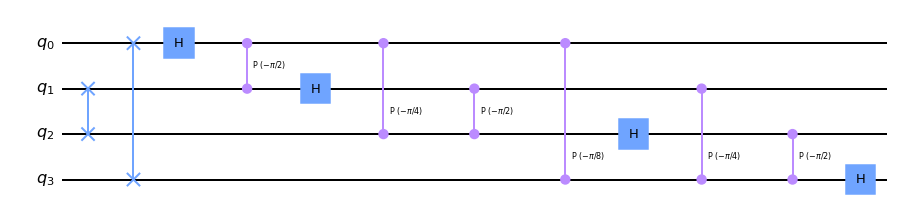

In [ ]:
# Make controlled gates
inv_cont_one_step = one_step_circuit.inverse().control()
inv_cont_one_step_gate = inv_cont_one_step.to_instruction()
cont_one_step = one_step_circuit.control()
cont_one_step_gate = cont_one_step.to_instruction()

inv_qft_gate = QFT(4, inverse=True).to_instruction()  
qft_gate = QFT(4, inverse=False).to_instruction()

QFT(4, inverse=True).decompose().draw("mpl")

In [ ]:
phase_circuit =  QuantumCircuit(6, name=' phase oracle ')
# Mark 1011
phase_circuit.x(2)
phase_circuit.h(3)
phase_circuit.mct([0,1,2], 3)
phase_circuit.h(3)
phase_circuit.x(2)
# Mark 1111
phase_circuit.h(3)
phase_circuit.mct([0,1,2],3)
phase_circuit.h(3)
phase_oracle_gate = phase_circuit.to_instruction()
# Phase oracle circuit
phase_oracle_circuit =  QuantumCircuit(11, name=' PHASE ORACLE CIRCUIT ')
phase_oracle_circuit.append(phase_oracle_gate, [4,5,6,7,8,9])
phase_circuit.draw() 

q_0: ───────■──────────────■───────
            │              │       
q_1: ───────■──────────────■───────
     ┌───┐  │  ┌───┐       │       
q_2: ┤ X ├──■──┤ X ├───────■───────
     ├───┤┌─┴─┐├───┤┌───┐┌─┴─┐┌───┐
q_3: ┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘
q_4: ──────────────────────────────
                                   
q_5: ──────────────────────────────

In [ ]:
# Mark q_4 if the other qubits are non-zero 
mark_auxiliary_circuit = QuantumCircuit(5, name=' mark auxiliary ')
mark_auxiliary_circuit.x([0,1,2,3,4])
mark_auxiliary_circuit.mct([0,1,2,3], 4)
mark_auxiliary_circuit.z(4)
mark_auxiliary_circuit.mct([0,1,2,3], 4)
mark_auxiliary_circuit.x([0,1,2,3,4])

mark_auxiliary_gate = mark_auxiliary_circuit.to_instruction()
mark_auxiliary_circuit.draw()

┌───┐               ┌───┐
q_0: ┤ X ├──■─────────■──┤ X ├
     ├───┤  │         │  ├───┤
q_1: ┤ X ├──■─────────■──┤ X ├
     ├───┤  │         │  ├───┤
q_2: ┤ X ├──■─────────■──┤ X ├
     ├───┤  │         │  ├───┤
q_3: ┤ X ├──■─────────■──┤ X ├
     ├───┤┌─┴─┐┌───┐┌─┴─┐├───┤
q_4: ┤ X ├┤ X ├┤ Z ├┤ X ├┤ X ├
     └───┘└───┘└───┘└───┘└───┘

In [ ]:
# Phase estimation
phase_estimation_circuit = QuantumCircuit(11, name=' phase estimation ')
phase_estimation_circuit.h([0,1,2,3])
for i in range(0,4):
    stop = 2**i
    for j in range(0,stop):
        phase_estimation_circuit.append(cont_one_step, [i,4,5,6,7,8,9])

# Inverse fourier transform
phase_estimation_circuit.append(inv_qft_gate, [0,1,2,3])

# Mark all angles theta that are not 0 with an auxiliary qubit
phase_estimation_circuit.append(mark_auxiliary_gate, [0,1,2,3,10])

# Reverse phase estimation
phase_estimation_circuit.append(qft_gate, [0,1,2,3])   

for i in range(3,-1,-1):
    stop = 2**i
    for j in range(0,stop):
        phase_estimation_circuit.append(inv_cont_one_step, [i,4,5,6,7,8,9])
phase_estimation_circuit.barrier(range(0,10))
phase_estimation_circuit.h([0,1,2,3])

# Make phase estimation gate
phase_estimation_gate = phase_estimation_circuit.to_instruction()
phase_estimation_circuit.draw(fold=-1) 

┌───┐┌──────────────┐                                                                                                                                                                                                                                ┌───────┐┌───────────────────┐┌──────┐                                                                                                                                                                                                                                                                          ┌─────────────────┐ ░ ┌───┐
 q_0: ┤ H ├┤0             ├────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0      ├┤0                  ├┤0     ├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0                ├─░─┤ H ├
      ├───┤│              │┌──────────────┐┌──────────────┐                                                                                                                                                                                                │       ││                   ││      │                                                                                                                                                                                                                                    ┌─────────────────┐┌─────────────────┐│                 │ ░ ├───┤
 q_1: ┤ H ├┤              ├┤0             ├┤0             ├────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤1      ├┤1                  ├┤1     ├────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0                ├┤0                ├┤                 ├─░─┤ H ├
      ├───┤│              ││              ││              │┌──────────────┐┌──────────────┐┌──────────────┐┌──────────────┐                                                                                                                                │  IQFT ││                   ││  QFT │                                                                                                                                                        ┌─────────────────┐┌─────────────────┐┌─────────────────┐┌─────────────────┐│                 ││                 ││                 │ ░ ├───┤
 q_2: ┤ H ├┤              ├┤              ├┤              ├┤0             ├┤0             ├┤0             ├┤0             ├────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤2      ├┤2                  ├┤2     ├────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0                ├┤0                ├┤0                ├┤0                ├┤                 ├┤                 ├┤                 ├─░─┤ H ├
      ├───┤│              ││              ││              ││              ││              ││              ││              │┌──────────────┐┌──────────────┐┌──────────────┐┌──────────────┐┌──────────────┐┌──────────────┐┌──────────────┐┌──────────────┐│       ││                   ││      │┌─────────────────┐┌─────────────────┐┌─────────────────┐┌─────────────────┐┌─────────────────┐┌─────────────────┐┌─────────────────┐┌─────────────────┐│                 ││                 ││                 ││         

In [ ]:
# Implementation of the full quantum walk search algorithm
theta_q = QuantumRegister(4, 'theta')
node_q = QuantumRegister(4, 'node')
coin_q = QuantumRegister(2, 'coin')
auxiliary_q = QuantumRegister(1, 'auxiliary')
creg_c2 = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(theta_q, node_q, coin_q, auxiliary_q, creg_c2)
# Apply Hadamard gates to the qubits that represent the nodes and the coin
circuit.h([4,5,6,7,8,9])
iterations = 2

for i in range(0,iterations):
    circuit.append(phase_oracle_gate, [4,5,6,7,8,9])
    circuit.append(phase_estimation_gate, [0,1,2,3,4,5,6,7,8,9,10])

circuit.measure(node_q[0], creg_c2[0])
circuit.measure(node_q[1], creg_c2[1])
circuit.measure(node_q[2], creg_c2[2])
circuit.measure(node_q[3], creg_c2[3])
circuit.draw(fold=-1)

┌──────────────────────┐                   ┌──────────────────────┐            
  theta_0: ────────────────────────┤0                     ├───────────────────┤0                     ├────────────
                                   │                      │                   │                      │            
  theta_1: ────────────────────────┤1                     ├───────────────────┤1                     ├────────────
                                   │                      │                   │                      │            
  theta_2: ────────────────────────┤2                     ├───────────────────┤2                     ├────────────
                                   │                      │                   │                      │            
  theta_3: ────────────────────────┤3                     ├───────────────────┤3                     ├────────────
           ┌───┐┌─────────────────┐│                      │┌─────────────────┐│                      │┌─┐         
   node_0: ┤ H ├┤0                ├┤4                     ├┤0                ├┤4                     ├┤M├─────────
           ├───┤│                 ││                      ││                 ││                      │└╥┘┌─┐      
   node_1: ┤ H ├┤1                ├┤5   phase estimation  ├┤1                ├┤5   phase estimation  ├─╫─┤M├──────
           ├───┤│                 ││                      ││                 ││                      │ ║ └╥┘┌─┐   
   node_2: ┤ H ├┤2                ├┤6                     ├┤2                ├┤6                     ├─╫──╫─┤M├───
           ├───┤│   phase oracle  ││                      ││   phase oracle  ││                      │ ║  ║ └╥┘┌─┐
   node_3: ┤ H ├┤3                ├┤7                     ├┤3                ├┤7                     ├─╫──╫──╫─┤M├
           ├───┤│                 ││                      ││                 ││                      │ ║  ║  ║ └╥┘
   coin_0: ┤ H ├┤4                ├┤8                     ├┤4                ├┤8                     ├─╫──╫──╫──╫─
           ├───┤│                 ││                      ││                 ││                      │ ║  ║  ║  ║ 
   coin_1: ┤ H ├┤5                ├┤9                     ├┤5                ├┤9                     ├─╫──╫──╫──╫─
           └───┘└─────────────────┘│                      │└─────────────────┘│                      │ ║  ║  ║  ║ 
auxiliary: ────────────────────────┤10                    ├───────────────────┤10                    ├─╫──╫──╫──╫─
                                   └──────────────────────┘                   └──────────────────────┘ ║  ║  ║  ║ 
      c: 4/════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                                                                       0  1  2  3

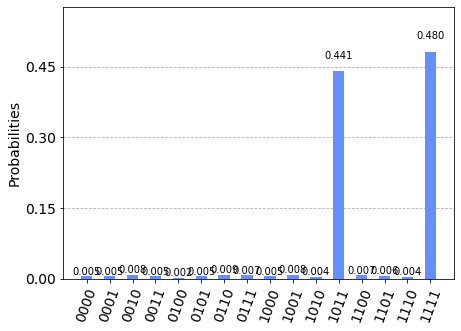

In [ ]:
backend = Aer.get_backend('qasm_simulator') 
job = execute( circuit, backend, shots=1024 ) 
hist = job.result().get_counts() 
plot_histogram( hist )

Quantum Teleportation

<IPython.core.display.Latex object>

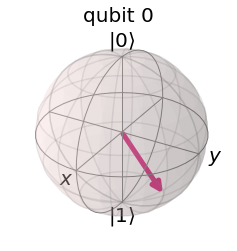

In [ ]:
# Create random 1-qubit state
psi = random_statevector(2)

# Display it nicely
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
# Show it on a Bloch sphere
plot_bloch_multivector(psi)

In [ ]:
def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target

def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

# This function takes a QuantumCircuit (qc), integer (qubit)
# and ClassicalRegisters (crz & crx) to decide which gates to apply
def bob_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers 
    qc.z(qubit).c_if(crz, 1) # are in the state '1'    

## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

init_gate = Initialize(psi)
init_gate.label = "init"

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

# Display the circuit
qc.draw(fold=-1)

┌──────────────────────────────────────────┐ ░            ░      ┌───┐ ░ ┌─┐                 
  q_0: ┤ init(-0.81552-0.51629j,0.14709-0.21619j) ├─░────────────░───■──┤ H ├─░─┤M├─────────────────
       └──────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐              
  q_1: ─────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├──────────────
                                                    ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ┌───┐  ┌───┐ 
  q_2: ─────────────────────────────────────────────░──────┤ X ├─░────────────░──╫──╫──┤ X ├──┤ Z ├─
                                                    ░      └───┘ ░            ░  ║  ║  └─╥─┘  └─╥─┘ 
                                                                                 ║  ║    ║   ┌──╨──┐
crz: 1/══════════════════════════════════════════════════════════════════════════╩══╬════╬═══╡ 0x1 ╞
                                                                                 0  ║ ┌──╨──┐└─────┘
crx: 1/═════════════════════════════════════════════════════════════════════════════╩═╡ 0x1 ╞═══════
                                                                                    0 └─────┘

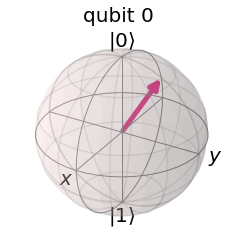

In [ ]:
plot_bloch_multivector(psi)

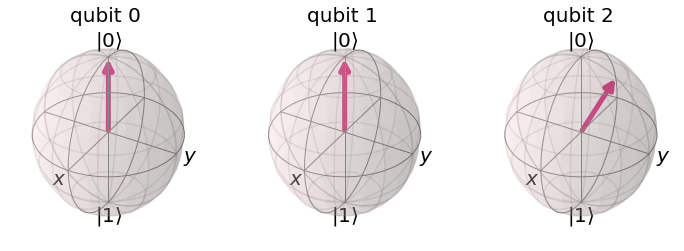

In [ ]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)

In [ ]:
inverse_init_gate = init_gate.gates_to_uncompute()

In [ ]:
## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

## STEP 5
# reverse the initialization process
qc.append(inverse_init_gate, [2])

# Display the circuit
qc.draw(fold=-1)

┌──────────────────────────────────────────┐ ░            ░      ┌───┐ ░ ┌─┐                                 
  q_0: ┤ init(-0.81552-0.51629j,0.14709-0.21619j) ├─░────────────░───■──┤ H ├─░─┤M├─────────────────────────────────
       └──────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐                              
  q_1: ─────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├──────────────────────────────
                                                    ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ┌───┐  ┌───┐ ┌──────────────┐
  q_2: ─────────────────────────────────────────────░──────┤ X ├─░────────────░──╫──╫──┤ X ├──┤ Z ├─┤ disentangler ├
                                                    ░      └───┘ ░            ░  ║  ║  └─╥─┘  └─╥─┘ └──────────────┘
                                                                                 ║  ║    ║   ┌──╨──┐                
crz: 1/══════════════════════════════════════════════════════════════════════════╩══╬════╬═══╡ 0x1 ╞════════════════
                                                                                 0  ║ ┌──╨──┐└─────┘                
crx: 1/═════════════════════════════════════════════════════════════════════════════╩═╡ 0x1 ╞═══════════════════════
                                                                                    0 └─────┘

In [ ]:
cr_result = ClassicalRegister(1)
qc.add_register(cr_result)
qc.measure(2,2)
qc.draw(fold=-1)

┌──────────────────────────────────────────┐ ░            ░      ┌───┐ ░ ┌─┐                                    
  q_0: ┤ init(-0.81552-0.51629j,0.14709-0.21619j) ├─░────────────░───■──┤ H ├─░─┤M├────────────────────────────────────
       └──────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐                                 
  q_1: ─────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─────────────────────────────────
                                                    ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ┌───┐  ┌───┐ ┌──────────────┐┌─┐
  q_2: ─────────────────────────────────────────────░──────┤ X ├─░────────────░──╫──╫──┤ X ├──┤ Z ├─┤ disentangler ├┤M├
                                                    ░      └───┘ ░            ░  ║  ║  └─╥─┘  └─╥─┘ └──────────────┘└╥┘
                                                                                 ║  ║    ║   ┌──╨──┐                 ║ 
crz: 1/══════════════════════════════════════════════════════════════════════════╩══╬════╬═══╡ 0x1 ╞═════════════════╬═
                                                                                 0  ║ ┌──╨──┐└─────┘                 ║ 
crx: 1/═════════════════════════════════════════════════════════════════════════════╩═╡ 0x1 ╞════════════════════════╬═
                                                                                    0 └─────┘                        ║ 
 c0: 1/══════════════════════════════════════════════════════════════════════════════════════════════════════════════╩═
                                                                                                                     0

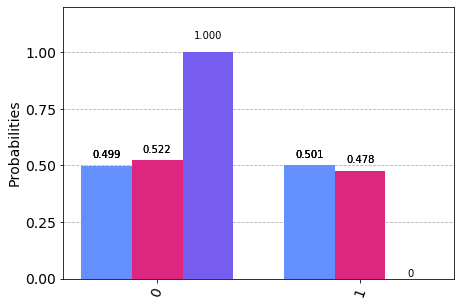

In [ ]:
from qiskit.result import marginal_counts
t_qc = transpile(qc, sim)
t_qc.save_statevector()
counts = sim.run(t_qc).result().get_counts()
qubit_counts = [marginal_counts(counts,[qubit]) for qubit in range(3)]
plot_histogram(qubit_counts)

In [ ]:
def new_bob_gates(qc, a, b, c):
    qc.cx(b, c)
    qc.cz(a, c)

qc = QuantumCircuit(3,1)

# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)
qc.barrier()
# Alice sends classical bits to Bob
new_bob_gates(qc, 0, 1, 2)

# We undo the initialization process
qc.append(inverse_init_gate, [2])

# See the results, we only care about the state of qubit 2
qc.measure(2,0)

# View the results:
qc.draw(fold=-1)

┌──────────────────────────────────────────┐ ░            ░      ┌───┐ ░                            
q_0: ┤ init(-0.81552-0.51629j,0.14709-0.21619j) ├─░────────────░───■──┤ H ├─░───────■────────────────────
     └──────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░       │                    
q_1: ─────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░───■───┼────────────────────
                                                  ░ └───┘┌─┴─┐ ░ └───┘      ░ ┌─┴─┐ │ ┌──────────────┐┌─┐
q_2: ─────────────────────────────────────────────░──────┤ X ├─░────────────░─┤ X ├─■─┤ disentangler ├┤M├
                                                  ░      └───┘ ░            ░ └───┘   └──────────────┘└╥┘
c: 1/══════════════════════════════════════════════════════════════════════════════════════════════════╩═
                                                                                                       0

In [ ]:
# First, see what devices we are allowed to use by loading our saved accounts
provider = IBMQ.enable_account('99e1dd08f2c46188b04a339f1db939ca95b546d2f5ce04176d8a47effe5a12c21cf224a58afb38ee95effeeba182ac34cd14fc18f276cd5ef7948e910f68eea5')
provider = IBMQ.get_provider("ibm-q")

# get the least-busy backend at IBM and run the quantum circuit there
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)
job_monitor(job)  # displays job status under cell

Job Status: job has successfully run


{'0': 3664, '1': 336}


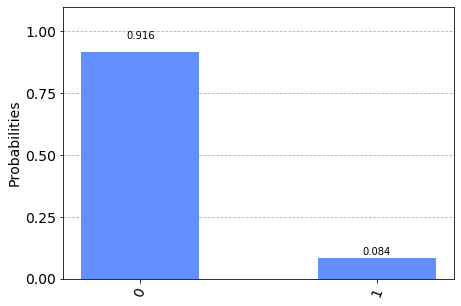

In [ ]:
# Get the results and display them
exp_result = job.result()
exp_counts = exp_result.get_counts(qc)
print(exp_counts)
plot_histogram(exp_counts)

In [ ]:
print(f"The experimental error rate : {exp_counts['1']*100/sum(exp_counts.values()):.3f}%")

The experimental error rate : 8.400%


Superdense Coding

In [ ]:
def create_bell_pair():
    """
    Returns:
        QuantumCircuit: Circuit that produces a Bell pair
    """
    qc = QuantumCircuit(2)
    qc.h(1)
    qc.cx(1, 0)
    return qc

def encode_message(qc, qubit, msg):
    """Encodes a two-bit message on qc using the superdense coding protocol
    Args:
        qc (QuantumCircuit): Circuit to encode message on
        qubit (int): Which qubit to add the gate to
        msg (str): Two-bit message to send
    Returns:
        QuantumCircuit: Circuit that, when decoded, will produce msg
    Raises:
        ValueError if msg is wrong length or contains invalid characters
    """
    if len(msg) != 2 or not set(msg).issubset({"0","1"}):
        raise ValueError(f"message '{msg}' is invalid")
    if msg[1] == "1":
        qc.x(qubit)
    if msg[0] == "1":
        qc.z(qubit)
    return qc

def decode_message(qc):
    qc.cx(1, 0)
    qc.h(1)
    return qc

# Charlie creates the entangled pair between Alice and Bob
qc = create_bell_pair()

# We'll add a barrier for visual separation
qc.barrier()

# At this point, qubit 0 goes to Alice and qubit 1 goes to Bob

# Next, Alice encodes her message onto qubit 1. In this case,
# we want to send the message '10'. You can try changing this
# value and see how it affects the circuit
message = '10'
qc = encode_message(qc, 1, message)
qc.barrier()
# Alice then sends her qubit to Bob.

# After recieving qubit 0, Bob applies the recovery protocol:
qc = decode_message(qc)

# Finally, Bob measures his qubits to read Alice's message
qc.measure_all()

# Draw our output
qc.draw()

┌───┐ ░       ░ ┌───┐      ░ ┌─┐   
   q_0: ─────┤ X ├─░───────░─┤ X ├──────░─┤M├───
        ┌───┐└─┬─┘ ░ ┌───┐ ░ └─┬─┘┌───┐ ░ └╥┘┌─┐
   q_1: ┤ H ├──■───░─┤ Z ├─░───■──┤ H ├─░──╫─┤M├
        └───┘      ░ └───┘ ░      └───┘ ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

{'10': 1024}


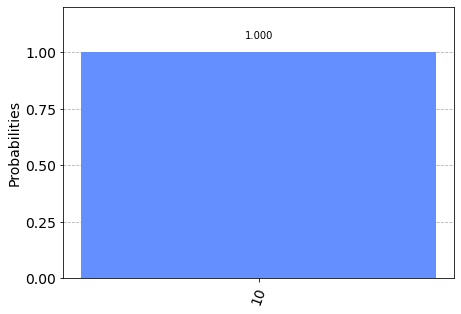

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

In [ ]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 1024

# Load local account information
IBMQ.enable_account('99e1dd08f2c46188b04a339f1db939ca95b546d2f5ce04176d8a47effe5a12c21cf224a58afb38ee95effeeba182ac34cd14fc18f276cd5ef7948e910f68eea5')
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
# Run our circuit
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)

least busy backend:  ibmq_quito


In [ ]:
# Monitoring our job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


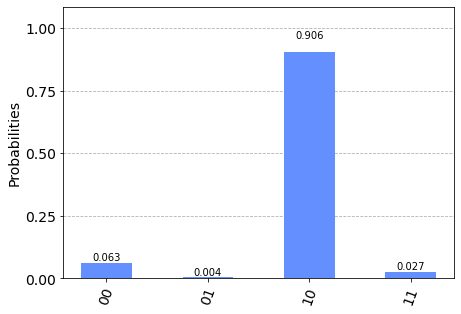

In [ ]:
# Plotting our result
result = job.result()
plot_histogram(result.get_counts(qc))

In [ ]:
correct_results = result.get_counts(qc)[message]
accuracy = (correct_results/shots)*100
print(f"Accuracy = {accuracy:.2f}%")

Accuracy = 353.81%


Quantum Key Distribution

┌───┐ ░ ┌───┐┌─┐
  q: ┤ H ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

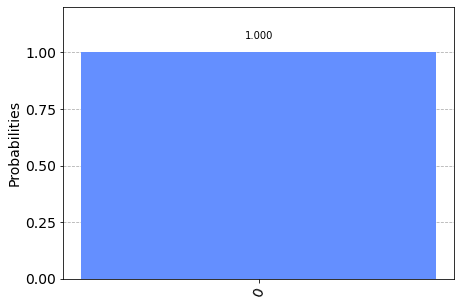

In [ ]:
qc = QuantumCircuit(1,1)
# Alice prepares qubit in state |+>
qc.h(0)
qc.barrier()
# Alice now sends the qubit to Bob
# who measures it in the X-basis
qc.h(0)
qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(assemble(qc))
plot_histogram(job.result().get_counts())

┌───┐┌─┐ ░ ┌───┐┌─┐
  q: ┤ H ├┤M├─░─┤ H ├┤M├
     └───┘└╥┘ ░ └───┘└╥┘
c: 1/══════╩══════════╩═
           0          0

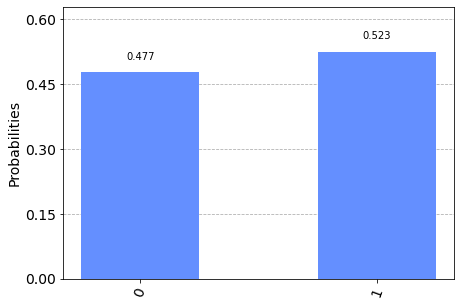

In [ ]:
qc = QuantumCircuit(1,1)
# Alice prepares qubit in state |+>
qc.h(0)
# Alice now sends the qubit to Bob
# but Eve intercepts and tries to read it
qc.measure(0, 0)
qc.barrier()
# Eve then passes this on to Bob
# who measures it in the X-basis
qc.h(0)
qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(assemble(qc))
plot_histogram(job.result().get_counts())

In [ ]:
from numpy.random import randint
np.random.seed(seed=0)
n = 100
## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)
print(alice_bits)
alice_bases = randint(2, size=n)
print(alice_bases)

[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0]
[1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]


In [ ]:
def encode_message(bits, bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0: # Prepare qubit in Z-basis
            if bits[i] == 0:
                pass 
            else:
                qc.x(0)
        else: # Prepare qubit in X-basis
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message

np.random.seed(seed=0)
n = 100

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

print('bit = %i' % alice_bits[0])
print('basis = %i' % alice_bases[0])

bit = 0
basis = 1


In [ ]:
message[0].draw()

┌───┐ ░ 
  q: ┤ H ├─░─
     └───┘ ░ 
c: 1/════════

In [ ]:
print('bit = %i' % alice_bits[4])
print('basis = %i' % alice_bases[4])
message[4].draw()

bit = 1
basis = 0


┌───┐ ░ 
  q: ┤ X ├─░─
     └───┘ ░ 
c: 1/════════

In [ ]:
np.random.seed(seed=0)
n = 100

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = randint(2, size=n)
print(bob_bases)


[1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1]


In [ ]:
def measure_message(message, bases):
    backend = Aer.get_backend('aer_simulator')
    measurements = []
    for q in range(n):
        if bases[q] == 0: # measuring in Z-basis
            message[q].measure(0,0)
        if bases[q] == 1: # measuring in X-basis
            message[q].h(0)
            message[q].measure(0,0)
        aer_sim = Aer.get_backend('aer_simulator')
        qobj = assemble(message[q], shots=1, memory=True)
        result = aer_sim.run(qobj).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

np.random.seed(seed=0)
n = 100

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)
message[0].draw()

┌───┐ ░ ┌───┐┌─┐
  q: ┤ H ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

In [ ]:
message[6].draw()

┌───┐ ░ ┌───┐┌─┐
  q: ┤ X ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

In [ ]:
print(bob_results)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0]


In [ ]:
def remove_garbage(a_bases, b_bases, bits):
    good_bits = []
    for q in range(n):
        if a_bases[q] == b_bases[q]:
            # If both used the same basis, add
            # this to the list of 'good' bits
            good_bits.append(bits[q])
    return good_bits

np.random.seed(seed=0)
n = 100

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)

## Step 4
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
print(alice_key)

[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]


In [ ]:
np.random.seed(seed=0)
n = 100

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)

## Step 4
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
print(bob_key)

[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]


In [ ]:
def sample_bits(bits, selection):
    sample = []
    for i in selection:
        # use np.mod to make sure the
        # bit we sample is always in 
        # the list range
        i = np.mod(i, len(bits))
        # pop(i) removes the element of the
        # list at index 'i'
        sample.append(bits.pop(i))
    return sample

np.random.seed(seed=0)
n = 100

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)

## Step 4
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)

## Step 5
sample_size = 15
bit_selection = randint(n, size=sample_size)

bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
alice_sample = [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [ ]:
bob_sample == alice_sample

True

In [ ]:
print(bob_key)
print(alice_key)
print("key length = %i" % len(alice_key))

[1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]
[1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]
key length = 33


In [ ]:
np.random.seed(seed=3)
## Step 1
alice_bits = randint(2, size=n)
## Step 2
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
print(alice_bases)

[1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1]


In [ ]:
message[0].draw()

┌───┐ ░ 
  q: ┤ H ├─░─
     └───┘ ░ 
c: 1/════════

In [ ]:
np.random.seed(seed=3)
## Step 1
alice_bits = randint(2, size=n)
## Step 2
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
## Interception!!
eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
print(intercepted_message)

[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1]


In [ ]:
message[0].draw()

┌───┐ ░ ┌─┐
  q: ┤ H ├─░─┤M├
     └───┘ ░ └╥┘
c: 1/═════════╩═
              0

In [ ]:
np.random.seed(seed=3)
## Step 1
alice_bits = randint(2, size=n)
## Step 2
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
## Interception!!
eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
## Step 3
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)
message[0].draw()

┌───┐ ░ ┌─┐┌───┐┌─┐
  q: ┤ H ├─░─┤M├┤ H ├┤M├
     └───┘ ░ └╥┘└───┘└╥┘
c: 1/═════════╩═══════╩═
              0       0

In [ ]:
np.random.seed(seed=3)
## Step 1
alice_bits = randint(2, size=n)
## Step 2
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
## Interception!!
eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
## Step 3
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)
## Step 4
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
## Step 5
sample_size = 15
bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1]
alice_sample = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [ ]:
bob_sample == alice_sample

False

In [ ]:
n = 100
# Step 1
alice_bits = randint(2, size=n)
alice_bases = randint(2, size=n)
# Step 2
message = encode_message(alice_bits, alice_bases)
# Interception!
eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
# Step 3
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)
# Step 4
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
# Step 5
sample_size = 15 # Change this to something lower and see if 
                 # Eve can intercept the message without Alice
                 # and Bob finding out
bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
alice_sample = sample_bits(alice_key, bit_selection)

if bob_sample != alice_sample:
    print("Eve's interference was detected.")
else:
    print("Eve went undetected!")

Eve's interference was detected.


Solving Linear Systems of Equations using HHL

In [ ]:
import numpy as np
from qiskit.algorithms.linear_solvers.numpy_linear_solver import NumPyLinearSolver
from qiskit.algorithms.linear_solvers.hhl import HHL
matrix = np.array([[1, -1/3], [-1/3, 1]])
vector = np.array([1, 0])
naive_hhl_solution = HHL().solve(matrix, vector)

classical_solution = NumPyLinearSolver().solve(matrix, vector / np.linalg.norm(vector))

from qiskit.algorithms.linear_solvers.matrices.tridiagonal_toeplitz import TridiagonalToeplitz
tridi_matrix = TridiagonalToeplitz(1, 1, -1 / 3)

tridi_solution = HHL().solve(tridi_matrix, vector)
print('classical state:', classical_solution.state)

classical state: [1.125 0.375]


In [ ]:
print('naive state:')
print(naive_hhl_solution.state)
print('tridiagonal state:')
print(tridi_solution.state)

naive state:
      ┌────────────┐┌──────┐        ┌─────────┐
  q4: ┤ circuit-85 ├┤3     ├────────┤3        ├
      └────────────┘│      │┌──────┐│         │
q5_0: ──────────────┤0     ├┤2     ├┤0        ├
                    │  QPE ││      ││  QPE_dg │
q5_1: ──────────────┤1     ├┤1     ├┤1        ├
                    │      ││  1/x ││         │
q5_2: ──────────────┤2     ├┤0     ├┤2        ├
                    └──────┘│      │└─────────┘
  q6: ──────────────────────┤3     ├───────────
                            └──────┘           
tridiagonal state:
       ┌─────────────┐┌──────┐        ┌─────────┐
  q26: ┤ circuit-305 ├┤3     ├────────┤3        ├
       └─────────────┘│      │┌──────┐│         │
q27_0: ───────────────┤0     ├┤2     ├┤0        ├
                      │  QPE ││      ││  QPE_dg │
q27_1: ───────────────┤1     ├┤1     ├┤1        ├
                      │      ││  1/x ││         │
q27_2: ───────────────┤2     ├┤0     ├┤2        ├
                      └──────┘│      │└─

In [ ]:
print('classical Euclidean norm:', classical_solution.euclidean_norm)
print('naive Euclidean norm:', naive_hhl_solution.euclidean_norm)
print('tridiagonal Euclidean norm:', tridi_solution.euclidean_norm)

classical Euclidean norm: 1.1858541225631423
naive Euclidean norm: 1.185854122563138
tridiagonal Euclidean norm: 1.1858541225631356


In [ ]:
from qiskit.quantum_info import Statevector

naive_sv = Statevector(naive_hhl_solution.state).data
tridi_sv = Statevector(tridi_solution.state).data

# Extract the right vector components. 1000 corresponds to the index 8 and 1001 corresponds to the index 9
naive_full_vector = np.array([naive_sv[8], naive_sv[9]])
tridi_full_vector = np.array([tridi_sv[8], tridi_sv[9]])

print('naive raw solution vector:', naive_full_vector)
print('tridi raw solution vector:', tridi_full_vector)

naive raw solution vector: [4.91000685e-17-8.17005312e-17j 1.38431086e-17+4.89393824e-16j]
tridi raw solution vector: [-2.25750720e-16+5.15186588e-17j -3.37428847e-17+5.84491450e-16j]


In [ ]:
naive_full_vector = np.real(naive_full_vector)
tridi_full_vector = np.real(tridi_full_vector)
print('full naive solution vector:', naive_hhl_solution.euclidean_norm*naive_full_vector/np.linalg.norm(naive_full_vector))
print('full tridi solution vector:', tridi_solution.euclidean_norm*tridi_full_vector/np.linalg.norm(tridi_full_vector))
print('classical state:', classical_solution.state)

full naive solution vector: [1.14135909 0.32179095]
full tridi solution vector: [-1.17282534 -0.17530181]
classical state: [1.125 0.375]


In [ ]:
from scipy.sparse import diags

num_qubits = 2
matrix_size = 2 ** num_qubits
# entries of the tridiagonal Toeplitz symmetric matrix
a = 1
b = -1/3

matrix = diags([b, a, b], [-1, 0, 1], shape=(matrix_size, matrix_size)).toarray()
vector = np.array([1] + [0]*(matrix_size - 1))

# run the algorithms
classical_solution = NumPyLinearSolver().solve(matrix, vector / np.linalg.norm(vector))
naive_hhl_solution = HHL().solve(matrix, vector)
tridi_matrix = TridiagonalToeplitz(num_qubits, a, b)
tridi_solution = HHL().solve(tridi_matrix, vector)

print('classical euclidean norm:', classical_solution.euclidean_norm)
print('naive euclidean norm:', naive_hhl_solution.euclidean_norm)
print('tridiagonal euclidean norm:', tridi_solution.euclidean_norm)

classical euclidean norm: 1.237833351044751
naive euclidean norm: 1.2099806231120045
tridiagonal euclidean norm: 1.209457721870527


In [ ]:
from qiskit import transpile

num_qubits = list(range(1,5))
a = 1
b = -1/3

i=1
# calculate the circuit depths for different number of qubits to compare the use of resources
naive_depths = []
tridi_depths = []
for nb in num_qubits:
    matrix = diags([b, a, b], [-1, 0, 1], shape=(2**nb, 2**nb)).toarray()
    vector = np.array([1] + [0]*(2**nb -1))
    
    naive_hhl_solution = HHL().solve(matrix, vector)
    tridi_matrix = TridiagonalToeplitz(nb, a, b)
    tridi_solution = HHL().solve(tridi_matrix, vector)

    naive_qc = transpile(naive_hhl_solution.state,basis_gates=['id', 'rz', 'sx', 'x', 'cx'])
    tridi_qc = transpile(tridi_solution.state,basis_gates=['id', 'rz', 'sx', 'x', 'cx'])
    
    naive_depths.append(naive_qc.depth())
    tridi_depths.append(tridi_qc.depth())
    i +=1

sizes = [str(2**nb)+"x"+str(2**nb) for nb in num_qubits]
columns = ['size of the system', 'quantum_solution depth', 'tridi_solution depth']
data = np.array([sizes, naive_depths, tridi_depths])
row_format ="{:>23}" * (len(columns) + 2)
for team, row in zip(columns, data):
    print(row_format.format(team, *row))

     size of the system                    2x2                    4x4                    8x8                  16x16
 quantum_solution depth                    334                   2578                  34163                 403647
   tridi_solution depth                    565                   5107                  14756                  46552


In [ ]:
print('excess:', [naive_depths[i] - tridi_depths[i] for i in range(0, len(naive_depths))])

excess: [-231, -2529, 19407, 357095]


In [ ]:
from qiskit.algorithms.linear_solvers.observables import AbsoluteAverage, MatrixFunctional

num_qubits = 1
matrix_size = 2 ** num_qubits
# entries of the tridiagonal Toeplitz symmetric matrix
a = 1
b = -1/3

matrix = diags([b, a, b], [-1, 0, 1], shape=(matrix_size, matrix_size)).toarray()
vector = np.array([1] + [0]*(matrix_size - 1))
tridi_matrix = TridiagonalToeplitz(1, a, b)

average_solution = HHL().solve(tridi_matrix, vector, AbsoluteAverage())
classical_average = NumPyLinearSolver().solve(matrix, vector / np.linalg.norm(vector), AbsoluteAverage())

print('quantum average:', average_solution.observable)
print('classical average:', classical_average.observable)
print('quantum circuit results:', average_solution.circuit_results)

quantum average: 0.749999999999996
classical average: 0.75
quantum circuit results: (0.4999999999999949+0j)


In [ ]:
observable = MatrixFunctional(1, 1 / 2)

functional_solution = HHL().solve(tridi_matrix, vector, observable)
classical_functional = NumPyLinearSolver().solve(matrix, vector / np.linalg.norm(vector), observable)

print('quantum functional:', functional_solution.observable)
print('classical functional:', classical_functional.observable)
print('quantum circuit results:', functional_solution.circuit_results)

quantum functional: 1.828124999999981
classical functional: 1.828125
quantum circuit results: [(0.6249999999999939+0j), (0.4999999999999949+0j), (0.1249999999999988+0j)]


In [ ]:
def solve(self, matrix: Union[np.ndarray, QuantumCircuit],
          vector: Union[np.ndarray, QuantumCircuit],
          observable: Optional[Union[LinearSystemObservable, BaseOperator,
                                     List[BaseOperator]]] = None,
          post_rotation: Optional[Union[QuantumCircuit, List[QuantumCircuit]]] = None,
          post_processing: Optional[Callable[[Union[float, List[float]]],
                                             Union[float, List[float]]]] = None) \
        -> LinearSolverResult:

SyntaxError: ignored

In [ ]:
from qiskit import Aer

backend = Aer.get_backend('aer_simulator')
hhl = HHL(1e-3, quantum_instance=backend)

accurate_solution = hhl.solve(matrix, vector)
classical_solution = NumPyLinearSolver().solve(matrix, vector / np.linalg.norm(vector))

print(accurate_solution.euclidean_norm)
print(classical_solution.euclidean_norm)

1.185854122563138
1.1858541225631423


Depth: 26
CNOTS: 10


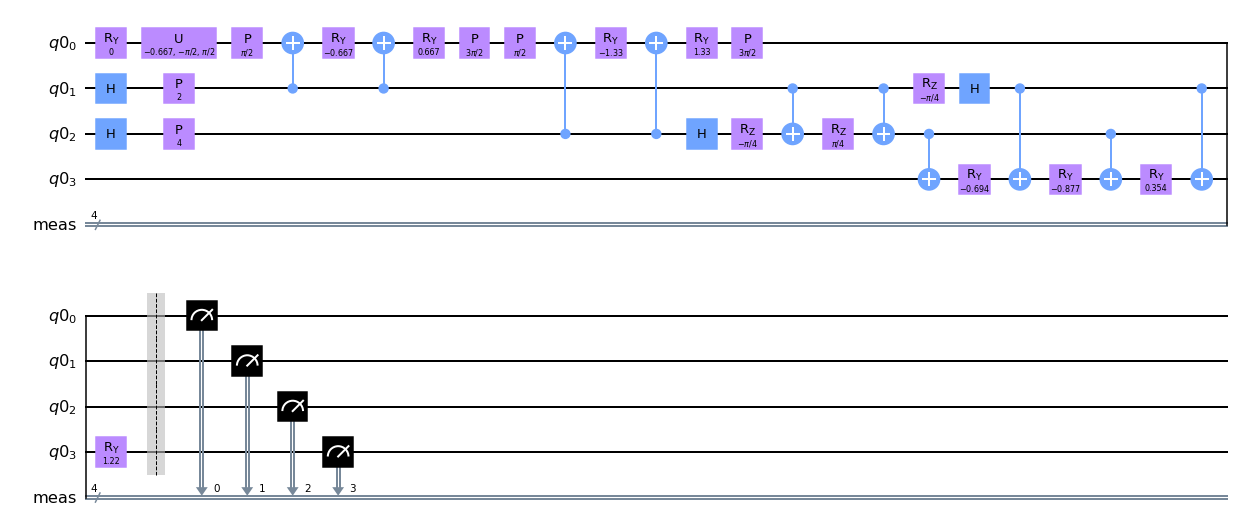

In [ ]:
from qiskit import QuantumRegister, QuantumCircuit
import numpy as np

t = 2  # This is not optimal; As an exercise, set this to the
       # value that will get the best results. See section 8 for solution.

nqubits = 4  # Total number of qubits
nb = 1  # Number of qubits representing the solution
nl = 2  # Number of qubits representing the eigenvalues

theta = 0  # Angle defining |b>

a = 1  # Matrix diagonal
b = -1/3  # Matrix off-diagonal

# Initialize the quantum and classical registers
qr = QuantumRegister(nqubits)

# Create a Quantum Circuit
qc = QuantumCircuit(qr)

qrb = qr[0:nb]
qrl = qr[nb:nb+nl]
qra = qr[nb+nl:nb+nl+1]

# State preparation. 
qc.ry(2*theta, qrb[0])
    
# QPE with e^{iAt}
for qu in qrl:
    qc.h(qu)

qc.p(a*t, qrl[0])
qc.p(a*t*2, qrl[1])

qc.u(b*t, -np.pi/2, np.pi/2, qrb[0])


# Controlled e^{iAt} on \lambda_{1}:
params=b*t

qc.p(np.pi/2,qrb[0])
qc.cx(qrl[0],qrb[0])
qc.ry(params,qrb[0])
qc.cx(qrl[0],qrb[0])
qc.ry(-params,qrb[0])
qc.p(3*np.pi/2,qrb[0])

# Controlled e^{2iAt} on \lambda_{2}:
params = b*t*2

qc.p(np.pi/2,qrb[0])
qc.cx(qrl[1],qrb[0])
qc.ry(params,qrb[0])
qc.cx(qrl[1],qrb[0])
qc.ry(-params,qrb[0])
qc.p(3*np.pi/2,qrb[0])

# Inverse QFT
qc.h(qrl[1])
qc.rz(-np.pi/4,qrl[1])
qc.cx(qrl[0],qrl[1])
qc.rz(np.pi/4,qrl[1])
qc.cx(qrl[0],qrl[1])
qc.rz(-np.pi/4,qrl[0])
qc.h(qrl[0])

# Eigenvalue rotation
t1=(-np.pi +np.pi/3 - 2*np.arcsin(1/3))/4
t2=(-np.pi -np.pi/3 + 2*np.arcsin(1/3))/4
t3=(np.pi -np.pi/3 - 2*np.arcsin(1/3))/4
t4=(np.pi +np.pi/3 + 2*np.arcsin(1/3))/4

qc.cx(qrl[1],qra[0])
qc.ry(t1,qra[0])
qc.cx(qrl[0],qra[0])
qc.ry(t2,qra[0])
qc.cx(qrl[1],qra[0])
qc.ry(t3,qra[0])
qc.cx(qrl[0],qra[0])
qc.ry(t4,qra[0])
qc.measure_all()

print("Depth: %i" % qc.depth())
print("CNOTS: %i" % qc.count_ops()['cx'])
qc.draw('mpl')

In [ ]:
from qiskit import ClassicalRegister, IBMQ
from qiskit.compiler import transpile
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, # Measurement error mitigation functions
                                                 CompleteMeasFitter, 
                                                 MeasurementFilter)

provider = IBMQ.enable_account('99e1dd08f2c46188b04a339f1db939ca95b546d2f5ce04176d8a47effe5a12c21cf224a58afb38ee95effeeba182ac34cd14fc18f276cd5ef7948e910f68eea5')

backend = provider.get_backend('ibmq_quito') # calibrate using real hardware
layout = [2,3,0,4]
chip_qubits = 5

# Transpiled circuit for the real hardware
qc_qa_cx = transpile(qc, backend=backend, initial_layout=layout)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
meas_cals, state_labels = complete_meas_cal(qubit_list=layout, qr=QuantumRegister(chip_qubits))
qcs = meas_cals + [qc_qa_cx]

job = backend.run(qcs, shots=10)

Simulating Molecules using VQE

In [ ]:
import numpy as np
np.random.seed(999999)
target_distr = np.random.rand(2)
# We now convert the random vector into a valid probability vector
target_distr /= sum(target_distr)

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
def get_var_form(params):
    qr = QuantumRegister(1, name="q")
    cr = ClassicalRegister(1, name='c')
    qc = QuantumCircuit(qr, cr)
    qc.u3(params[0], params[1], params[2], qr[0])
    qc.measure(qr, cr[0])
    return qc

from qiskit import Aer, transpile, assemble
backend = Aer.get_backend("qasm_simulator")
NUM_SHOTS = 10000

def get_probability_distribution(counts):
    output_distr = [v / NUM_SHOTS for v in counts.values()]
    if len(output_distr) == 1:
        output_distr.append(1 - output_distr[0])
    return output_distr

def objective_function(params):
    # Obtain a quantum circuit instance from the parameters
    qc = get_var_form(params)
    # Execute the quantum circuit to obtain the probability distribution associated with the current parameters
    t_qc = transpile(qc, backend)
    qobj = assemble(t_qc, shots=NUM_SHOTS)
    result = backend.run(qobj).result()
    # Obtain the counts for each measured state, and convert those counts into a probability vector
    output_distr = get_probability_distribution(result.get_counts(qc))
    # Calculate the cost as the distance between the output distribution and the target distribution
    cost = sum([np.abs(output_distr[i] - target_distr[i]) for i in range(2)])
    return cost

from qiskit.aqua.components.optimizers import COBYLA

# Initialize the COBYLA optimizer
optimizer = COBYLA(maxiter=500, tol=0.0001)

# Create the initial parameters (noting that our single qubit variational form has 3 parameters)
params = np.random.rand(3)
ret = optimizer.optimize(num_vars=3, objective_function=objective_function, initial_point=params)

# Obtain the output distribution using the final parameters
qc = get_var_form(ret[0])
t_qc = transpile(qc, backend)
qobj = assemble(t_qc, shots=NUM_SHOTS)
counts = backend.run(qobj).result().get_counts(qc)
output_distr = get_probability_distribution(counts)

print("Target Distribution:", target_distr)
print("Obtained Distribution:", output_distr)
print("Output Error (Manhattan Distance):", ret[1])
print("Parameters Found:", ret[0])

ImportError: ignored

In [ ]:
from qiskit.circuit.library import EfficientSU2
entanglements = ["linear", "full"]
for entanglement in entanglements:
    form = EfficientSU2(num_qubits=4, entanglement=entanglement)
    if entanglement == "linear":
        print("=============Linear Entanglement:=============")
    else:
        print("=============Full Entanglement:=============")
    # We initialize all parameters to 0 for this demonstration
    display(form.draw(fold=100))
    print()

=============Linear Entanglement:=============


»
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
«     ┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                                                                                                                     ├
«     │                                                                                                                                                                                                      │
«q_1: ┤1                                                                                                                                                                                                     ├
«     │  EfficientSU2(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7],θ[8],θ[9],θ[10],θ[11],θ[12],θ[13],θ[14],θ[15],θ[16],θ[17],θ[18],θ[19],θ[20],θ[21],θ[22],θ[23],θ[24],θ[25],θ[26],θ[27],θ[28],θ[29],θ[30],θ[31]) │
«q_2: ┤2                                                                                                                                                                                                     ├
«     │                                                                                                                                                                                                      │
«q_3: ┤3                                                                                                                                                                                                     ├
«     └──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘


=============Full Entanglement:=============


»
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
«     ┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                                                                                                                     ├
«     │                                                                                                                                                                                                      │
«q_1: ┤1                                                                                                                                                                                                     ├
«     │  EfficientSU2(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7],θ[8],θ[9],θ[10],θ[11],θ[12],θ[13],θ[14],θ[15],θ[16],θ[17],θ[18],θ[19],θ[20],θ[21],θ[22],θ[23],θ[24],θ[25],θ[26],θ[27],θ[28],θ[29],θ[30],θ[31]) │
«q_2: ┤2                                                                                                                                                                                                     ├
«     │                                                                                                                                                                                                      │
«q_3: ┤3                                                                                                                                                                                                     ├
«     └──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

Solving combinatorial optimization problems using QAOA

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the pa

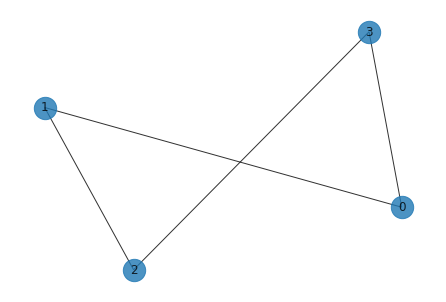

In [ ]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3])
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])
nx.draw(G, with_labels=True, alpha=0.8, node_size=500)

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
from qiskit.circuit import Parameter

# Adjacency is essentially a matrix which tells you which nodes are
# connected. This matrix is given as a sparse matrix, so we need to
# convert it to a dense matrix
adjacency = nx.adjacency_matrix(G).todense()

nqubits = 4

beta = Parameter("$\\beta$")
qc_mix = QuantumCircuit(nqubits)
for i in range(0, nqubits):
    qc_mix.rx(2 * beta, i)
    
qc_mix.draw()

┌───────────────┐
q_0: ┤ Rx(2*$\beta$) ├
     ├───────────────┤
q_1: ┤ Rx(2*$\beta$) ├
     ├───────────────┤
q_2: ┤ Rx(2*$\beta$) ├
     ├───────────────┤
q_3: ┤ Rx(2*$\beta$) ├
     └───────────────┘

In [ ]:
gamma = Parameter("$\\gamma$")
qc_p = QuantumCircuit(nqubits)
for pair in list(G.edges()):  # pairs of nodes
    qc_p.rzz(2 * gamma, pair[0], pair[1])
    qc_p.barrier()
    
qc_p.decompose().draw(fold=-1)

░                              ░                              ░                              ░ 
q_0: ──■──────────────────────■───░───■──────────────────────■───░──────────────────────────────░──────────────────────────────░─
     ┌─┴─┐┌────────────────┐┌─┴─┐ ░   │                      │   ░                              ░                              ░ 
q_1: ┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░───┼──────────────────────┼───░───■──────────────────────■───░──────────────────────────────░─
     └───┘└────────────────┘└───┘ ░   │                      │   ░ ┌─┴─┐┌────────────────┐┌─┴─┐ ░                              ░ 
q_2: ─────────────────────────────░───┼──────────────────────┼───░─┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░───■──────────────────────■───░─
                                  ░ ┌─┴─┐┌────────────────┐┌─┴─┐ ░ └───┘└────────────────┘└───┘ ░ ┌─┴─┐┌────────────────┐┌─┴─┐ ░ 
q_3: ─────────────────────────────░─┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░──────────────────────────────░─┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░─
                                  ░ └───┘└────────────────┘└───┘ ░                              ░ └───┘└────────────────┘└───┘ ░

In [ ]:
qc_0 = QuantumCircuit(nqubits)
for i in range(0, nqubits):
    qc_0.h(i)
    
qc_0.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     └───┘

In [ ]:
qc_qaoa = QuantumCircuit(nqubits)

qc_qaoa.append(qc_0, [i for i in range(0, nqubits)])
qc_qaoa.append(qc_p, [i for i in range(0, nqubits)])
qc_qaoa.append(qc_mix, [i for i in range(0, nqubits)])

qc_qaoa.decompose().decompose().draw(fold=-1)

┌─────────┐                             ░                              ░                              ░                              ░ ┌────────────────┐
q_0: ┤ U2(0,π) ├──■──────────────────────■───░───■──────────────────────■───░──────────────────────────────░──────────────────────────────░─┤ R(2*$\beta$,0) ├
     ├─────────┤┌─┴─┐┌────────────────┐┌─┴─┐ ░   │                      │   ░                              ░                              ░ ├────────────────┤
q_1: ┤ U2(0,π) ├┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░───┼──────────────────────┼───░───■──────────────────────■───░──────────────────────────────░─┤ R(2*$\beta$,0) ├
     ├─────────┤└───┘└────────────────┘└───┘ ░   │                      │   ░ ┌─┴─┐┌────────────────┐┌─┴─┐ ░                              ░ ├────────────────┤
q_2: ┤ U2(0,π) ├─────────────────────────────░───┼──────────────────────┼───░─┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░───■──────────────────────■───░─┤ R(2*$\beta$,0) ├
     ├─────────┤                             ░ ┌─┴─┐┌────────────────┐┌─┴─┐ ░ └───┘└────────────────┘└───┘ ░ ┌─┴─┐┌────────────────┐┌─┴─┐ ░ ├────────────────┤
q_3: ┤ U2(0,π) ├─────────────────────────────░─┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░──────────────────────────────░─┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░─┤ R(2*$\beta$,0) ├
     └─────────┘                             ░ └───┘└────────────────┘└───┘ ░                              ░ └───┘└────────────────┘└───┘ ░ └────────────────┘

In [ ]:
def maxcut_obj(x, G):
    """
    Given a bitstring as a solution, this function returns
    the number of edges shared between the two partitions
    of the graph.
    
    Args:
        x: str
           solution bitstring
           
        G: networkx graph
        
    Returns:
        obj: float
             Objective
    """
    obj = 0
    for i, j in G.edges():
        if x[i] != x[j]:
            obj -= 1
            
    return obj


def compute_expectation(counts, G):
    
    """
    Computes expectation value based on measurement results
    
    Args:
        counts: dict
                key as bitstring, val as count
           
        G: networkx graph
        
    Returns:
        avg: float
             expectation value
    """
    
    avg = 0
    sum_count = 0
    for bitstring, count in counts.items():
        
        obj = maxcut_obj(bitstring, G)
        avg += obj * count
        sum_count += count
        
    return avg/sum_count


# We will also bring the different circuit components that
# build the qaoa circuit under a single function
def create_qaoa_circ(G, theta):
    
    """
    Creates a parametrized qaoa circuit
    
    Args:  
        G: networkx graph
        theta: list
               unitary parameters
                     
    Returns:
        qc: qiskit circuit
    """
    
    nqubits = len(G.nodes())
    p = len(theta)//2  # number of alternating unitaries
    qc = QuantumCircuit(nqubits)
    
    beta = theta[:p]
    gamma = theta[p:]
    
    # initial_state
    for i in range(0, nqubits):
        qc.h(i)
    
    for irep in range(0, p):
        
        # problem unitary
        for pair in list(G.edges()):
            qc.rzz(2 * gamma[irep], pair[0], pair[1])

        # mixer unitary
        for i in range(0, nqubits):
            qc.rx(2 * beta[irep], i)
            
    qc.measure_all()
        
    return qc

# Finally we write a function that executes the circuit on the chosen backend
def get_expectation(G, p, shots=512):
    
    """
    Runs parametrized circuit
    
    Args:
        G: networkx graph
        p: int,
           Number of repetitions of unitaries
    """
    
    backend = Aer.get_backend('qasm_simulator')
    backend.shots = shots
    
    def execute_circ(theta):
        
        qc = create_qaoa_circ(G, theta)
        counts = backend.run(qc, seed_simulator=10, 
                             nshots=512).result().get_counts()
        
        return compute_expectation(counts, G)
    
    return execute_circ

from scipy.optimize import minimize


expectation = get_expectation(G, p=1)

res = minimize(expectation, 
                      [1.0, 1.0], 
                      method='COBYLA')

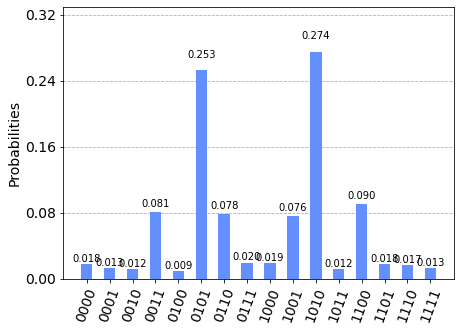

In [ ]:
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('aer_simulator')
backend.shots = 512

qc_res = create_qaoa_circ(G, res.x)

counts = backend.run(qc_res, seed_simulator=10).result().get_counts()

plot_histogram(counts)

Solving Satisfiability Problems using Grover's Algorithm

In [ ]:
import numpy as np
from qiskit import Aer
from qiskit.visualization import plot_histogram
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Grover, AmplificationProblem
from qiskit.circuit.library import PhaseOracle

with open('examples/3sat.dimacs', 'r') as f:
    dimacs = f.read()
print(dimacs)

FileNotFoundError: ignored

In [ ]:
oracle = PhaseOracle.from_dimacs_file('examples/3sat.dimacs')
oracle.draw()

FileNotFoundError: ignored

In [ ]:
class Verifier():
    """Create an object that can be used to check whether
    an assignment satisfies a DIMACS file.
        Args:
            dimacs_file (str): path to the DIMACS file
    """
    def __init__(self, dimacs_file):
        with open(dimacs_file, 'r') as f:
            self.dimacs = f.read()

    def is_correct(self, guess):
        """Verifies a SAT solution against this object's
        DIMACS file.
            Args:
                guess (str): Assignment to be verified.
                             Must be string of 1s and 0s.
            Returns:
                bool: True if `guess` satisfies the
                           problem. False otherwise.
        """
        # Convert characters to bools & reverse
        guess = [bool(int(x)) for x in guess][::-1]
        for line in self.dimacs.split('\n'):
            line = line.strip(' 0')
            clause_eval = False
            for literal in line.split(' '):
                if literal in ['p', 'c']:
                    # line is not a clause
                    clause_eval = True
                    break
                if '-' in literal:
                    literal = literal.strip('-')
                    lit_eval = not guess[int(literal)-1]
                else:
                    lit_eval = guess[int(literal)-1]
                clause_eval |= lit_eval
            if clause_eval is False:
                return False
        return True


v = Verifier('examples/3sat.dimacs')   
v.is_correct('001')

FileNotFoundError: ignored

In [ ]:
# Configure backend
backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)

# Create a new problem from the phase oracle and the
# verification function
problem = AmplificationProblem(oracle=oracle, is_good_state=v.is_correct)

# Use Grover's algorithm to solve the problem
grover = Grover(quantum_instance=quantum_instance)
result = grover.amplify(problem)
result.top_measurement

NameError: ignored

In [ ]:
plot_histogram(result.circuit_results)

NameError: ignored

In [ ]:
# Load our saved IBMQ accounts and get the ibmq_16_melbourne backend
from qiskit.test.mock import FakeMelbourne
melbourne = FakeMelbourne()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  


In [ ]:
from qiskit.compiler import transpile

# transpile the circuit for ibmq_16_melbourne
qc = grover.construct_circuit(problem, max(result.iterations))
qc.measure_all()
grover_compiled = transpile(qc, backend=melbourne, optimization_level=3)

print('gates = ', grover_compiled.count_ops())
print('depth = ', grover_compiled.depth())

NameError: ignored

In [ ]:
from qiskit import assemble
counts = melbourne.run(assemble(grover_compiled)).result().get_counts()
plot_histogram(counts)

NameError: ignored

Hybrid quantum-classical Neural Networks with PyTorch and Qiskit

In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import qiskit
from qiskit import transpile, assemble
from qiskit.visualization import *

In [ ]:
class QuantumCircuit:
    """ 
    This class provides a simple interface for interaction 
    with the quantum circuit 
    """
    
    def __init__(self, n_qubits, backend, shots):
        # --- Circuit definition ---
        self._circuit = qiskit.QuantumCircuit(n_qubits)
        
        all_qubits = [i for i in range(n_qubits)]
        self.theta = qiskit.circuit.Parameter('theta')
        
        self._circuit.h(all_qubits)
        self._circuit.barrier()
        self._circuit.ry(self.theta, all_qubits)
        
        self._circuit.measure_all()
        # ---------------------------

        self.backend = backend
        self.shots = shots
    
    def run(self, thetas):
        t_qc = transpile(self._circuit,
                         self.backend)
        qobj = assemble(t_qc,
                        shots=self.shots,
                        parameter_binds = [{self.theta: theta} for theta in thetas])
        job = self.backend.run(qobj)
        result = job.result().get_counts()
        
        counts = np.array(list(result.values()))
        states = np.array(list(result.keys())).astype(float)
        
        # Compute probabilities for each state
        probabilities = counts / self.shots
        # Get state expectation
        expectation = np.sum(states * probabilities)
        
        return np.array([expectation])


simulator = qiskit.Aer.get_backend('aer_simulator')

circuit = QuantumCircuit(1, simulator, 100)
print('Expected value for rotation pi {}'.format(circuit.run([np.pi])[0]))
circuit._circuit.draw()

Expected value for rotation pi 0.54


┌───┐ ░ ┌───────────┐ ░ ┌─┐
     q: ┤ H ├─░─┤ Ry(theta) ├─░─┤M├
        └───┘ ░ └───────────┘ ░ └╥┘
meas: 1/═════════════════════════╩═
                                 0

In [ ]:
class HybridFunction(Function):
    """ Hybrid quantum - classical function definition """
    
    @staticmethod
    def forward(ctx, input, quantum_circuit, shift):
        """ Forward pass computation """
        ctx.shift = shift
        ctx.quantum_circuit = quantum_circuit

        expectation_z = ctx.quantum_circuit.run(input[0].tolist())
        result = torch.tensor([expectation_z])
        ctx.save_for_backward(input, result)

        return result
        
    @staticmethod
    def backward(ctx, grad_output):
        """ Backward pass computation """
        input, expectation_z = ctx.saved_tensors
        input_list = np.array(input.tolist())
        
        shift_right = input_list + np.ones(input_list.shape) * ctx.shift
        shift_left = input_list - np.ones(input_list.shape) * ctx.shift
        
        gradients = []
        for i in range(len(input_list)):
            expectation_right = ctx.quantum_circuit.run(shift_right[i])
            expectation_left  = ctx.quantum_circuit.run(shift_left[i])
            
            gradient = torch.tensor([expectation_right]) - torch.tensor([expectation_left])
            gradients.append(gradient)
        gradients = np.array([gradients]).T
        return torch.tensor([gradients]).float() * grad_output.float(), None, None

class Hybrid(nn.Module):
    """ Hybrid quantum - classical layer definition """
    
    def __init__(self, backend, shots, shift):
        super(Hybrid, self).__init__()
        self.quantum_circuit = QuantumCircuit(1, backend, shots)
        self.shift = shift
        
    def forward(self, input):
        return HybridFunction.apply(input, self.quantum_circuit, self.shift)

In [ ]:
# Concentrating on the first 100 samples
n_samples = 100

X_train = datasets.MNIST(root='./data', train=True, download=True,
                         transform=transforms.Compose([transforms.ToTensor()]))

# Leaving only labels 0 and 1 
idx = np.append(np.where(X_train.targets == 0)[0][:n_samples], 
                np.where(X_train.targets == 1)[0][:n_samples])

X_train.data = X_train.data[idx]
X_train.targets = X_train.targets[idx]

train_loader = torch.utils.data.DataLoader(X_train, batch_size=1, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



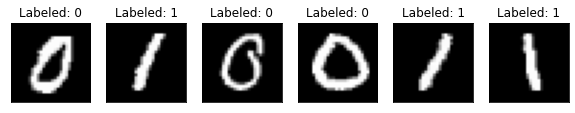

In [ ]:
n_samples_show = 6

data_iter = iter(train_loader)
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

while n_samples_show > 0:
    images, targets = data_iter.__next__()

    axes[n_samples_show - 1].imshow(images[0].numpy().squeeze(), cmap='gray')
    axes[n_samples_show - 1].set_xticks([])
    axes[n_samples_show - 1].set_yticks([])
    axes[n_samples_show - 1].set_title("Labeled: {}".format(targets.item()))
    
    n_samples_show -= 1

In [ ]:
n_samples = 50

X_test = datasets.MNIST(root='./data', train=False, download=True,
                        transform=transforms.Compose([transforms.ToTensor()]))

idx = np.append(np.where(X_test.targets == 0)[0][:n_samples], 
                np.where(X_test.targets == 1)[0][:n_samples])

X_test.data = X_test.data[idx]
X_test.targets = X_test.targets[idx]

test_loader = torch.utils.data.DataLoader(X_test, batch_size=1, shuffle=True)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(256, 64)
        self.fc2 = nn.Linear(64, 1)
        self.hybrid = Hybrid(qiskit.Aer.get_backend('aer_simulator'), 100, np.pi / 2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(1, -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.hybrid(x)
        return torch.cat((x, 1 - x), -1)

In [ ]:
model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.NLLLoss()

epochs = 20
loss_list = []

model.train()
for epoch in range(epochs):
    total_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        # Forward pass
        output = model(data)
        # Calculating loss
        loss = loss_func(output, target)
        # Backward pass
        loss.backward()
        # Optimize the weights
        optimizer.step()
        
        total_loss.append(loss.item())
    loss_list.append(sum(total_loss)/len(total_loss))
    print('Training [{:.0f}%]\tLoss: {:.4f}'.format(
        100. * (epoch + 1) / epochs, loss_list[-1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.


Training [5%]	Loss: -0.7855
Training [10%]	Loss: -0.9208
Training [15%]	Loss: -0.9316
Training [20%]	Loss: -0.9390
Training [25%]	Loss: -0.9488
Training [30%]	Loss: -0.9615
Training [35%]	Loss: -0.9575
Training [40%]	Loss: -0.9618
Training [45%]	Loss: -0.9683
Training [50%]	Loss: -0.9703
Training [55%]	Loss: -0.9750
Training [60%]	Loss: -0.9803
Training [65%]	Loss: -0.9781
Training [70%]	Loss: -0.9834
Training [75%]	Loss: -0.9812
Training [80%]	Loss: -0.9809
Training [85%]	Loss: -0.9861
Training [90%]	Loss: -0.9863
Training [95%]	Loss: -0.9885
Training [100%]	Loss: -0.9889


Text(0, 0.5, 'Neg Log Likelihood Loss')

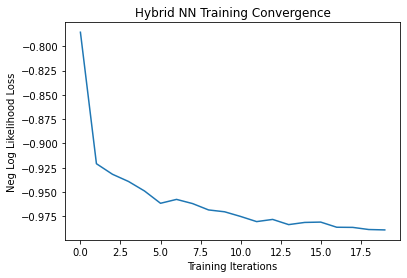

In [ ]:
plt.plot(loss_list)
plt.title('Hybrid NN Training Convergence')
plt.xlabel('Training Iterations')
plt.ylabel('Neg Log Likelihood Loss')

In [ ]:
model.eval()
with torch.no_grad():
    
    correct = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        output = model(data)
        
        pred = output.argmax(dim=1, keepdim=True) 
        correct += pred.eq(target.view_as(pred)).sum().item()
        
        loss = loss_func(output, target)
        total_loss.append(loss.item())
        
    print('Performance on test data:\n\tLoss: {:.4f}\n\tAccuracy: {:.1f}%'.format(
        sum(total_loss) / len(total_loss),
        correct / len(test_loader) * 100)
        )

Performance on test data:
	Loss: -0.9706
	Accuracy: 100.0%


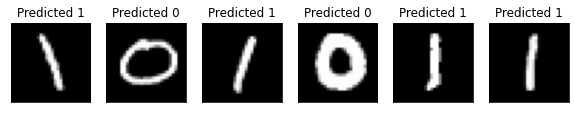

In [ ]:
n_samples_show = 6
count = 0
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

model.eval()
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        if count == n_samples_show:
            break
        output = model(data)
        
        pred = output.argmax(dim=1, keepdim=True) 

        axes[count].imshow(data[0].numpy().squeeze(), cmap='gray')

        axes[count].set_xticks([])
        axes[count].set_yticks([])
        axes[count].set_title('Predicted {}'.format(pred.item()))
        
        count += 1

Variational Quantum Linear Solver

In [ ]:
import random
from scipy.optimize import minimize

def apply_fixed_ansatz(qubits, parameters):

    for iz in range (0, len(qubits)):
        circ.ry(parameters[0][iz], qubits[iz])

    circ.cz(qubits[0], qubits[1])
    circ.cz(qubits[2], qubits[0])

    for iz in range (0, len(qubits)):
        circ.ry(parameters[1][iz], qubits[iz])

    circ.cz(qubits[1], qubits[2])
    circ.cz(qubits[2], qubits[0])

    for iz in range (0, len(qubits)):
        circ.ry(parameters[2][iz], qubits[iz])

circ = QuantumCircuit(3)
apply_fixed_ansatz([0, 1, 2], [[1, 1, 1], [1, 1, 1], [1, 1, 1]])
circ.draw()

┌───────┐      ┌───────┐      ┌───────┐
q_0: ┤ Ry(1) ├─■──■─┤ Ry(1) ├────■─┤ Ry(1) ├
     ├───────┤ │  │ ├───────┤    │ ├───────┤
q_1: ┤ Ry(1) ├─■──┼─┤ Ry(1) ├─■──┼─┤ Ry(1) ├
     ├───────┤    │ ├───────┤ │  │ ├───────┤
q_2: ┤ Ry(1) ├────■─┤ Ry(1) ├─■──■─┤ Ry(1) ├
     └───────┘      └───────┘      └───────┘

In [ ]:
# Creates the Hadamard test

def had_test(gate_type, qubits, auxiliary_index, parameters):

    circ.h(auxiliary_index)

    apply_fixed_ansatz(qubits, parameters)

    for ie in range (0, len(gate_type[0])):
        if (gate_type[0][ie] == 1):
            circ.cz(auxiliary_index, qubits[ie])

    for ie in range (0, len(gate_type[1])):
        if (gate_type[1][ie] == 1):
            circ.cz(auxiliary_index, qubits[ie])
    
    circ.h(auxiliary_index)
    
circ = QuantumCircuit(4)
had_test([[0, 0, 0], [0, 0, 1]], [1, 2, 3], 0, [[1, 1, 1], [1, 1, 1], [1, 1, 1]])
circ.draw()

┌───┐                                   ┌───┐
q_0: ──┤ H ├─────────────────────────────────■─┤ H ├
     ┌─┴───┴─┐      ┌───────┐      ┌───────┐ │ └───┘
q_1: ┤ Ry(1) ├─■──■─┤ Ry(1) ├────■─┤ Ry(1) ├─┼──────
     ├───────┤ │  │ ├───────┤    │ ├───────┤ │      
q_2: ┤ Ry(1) ├─■──┼─┤ Ry(1) ├─■──┼─┤ Ry(1) ├─┼──────
     ├───────┤    │ ├───────┤ │  │ ├───────┤ │      
q_3: ┤ Ry(1) ├────■─┤ Ry(1) ├─■──■─┤ Ry(1) ├─■──────
     └───────┘      └───────┘      └───────┘

In [ ]:
# Creates controlled anstaz for calculating |<b|psi>|^2 with a Hadamard test

def control_fixed_ansatz(qubits, parameters, auxiliary, reg):

    for i in range (0, len(qubits)):
        circ.cry(parameters[0][i], qiskit.circuit.Qubit(reg, auxiliary), qiskit.circuit.Qubit(reg, qubits[i]))

    circ.ccx(auxiliary, qubits[1], 4)
    circ.cz(qubits[0], 4)
    circ.ccx(auxiliary, qubits[1], 4)

    circ.ccx(auxiliary, qubits[0], 4)
    circ.cz(qubits[2], 4)
    circ.ccx(auxiliary, qubits[0], 4)

    for i in range (0, len(qubits)):
        circ.cry(parameters[1][i], qiskit.circuit.Qubit(reg, auxiliary), qiskit.circuit.Qubit(reg, qubits[i]))

    circ.ccx(auxiliary, qubits[2], 4)
    circ.cz(qubits[1], 4)
    circ.ccx(auxiliary, qubits[2], 4)

    circ.ccx(auxiliary, qubits[0], 4)
    circ.cz(qubits[2], 4)
    circ.ccx(auxiliary, qubits[0], 4)

    for i in range (0, len(qubits)):
        circ.cry(parameters[2][i], qiskit.circuit.Qubit(reg, auxiliary), qiskit.circuit.Qubit(reg, qubits[i]))

q_reg = QuantumRegister(5)
circ = QuantumCircuit(q_reg)
control_fixed_ansatz([1, 2, 3], [[1, 1, 1], [1, 1, 1], [1, 1, 1]], 0, q_reg)
circ.draw(fold=-1)

q2_0: ────■────────■────────■──────■───────■────■───────■──────■────────■────────■──────■───────■────■───────■──────■────────■────────■────
      ┌───┴───┐    │        │      │       │    │       │  ┌───┴───┐    │        │      │       │    │       │  ┌───┴───┐    │        │    
q2_1: ┤ Ry(1) ├────┼────────┼──────┼───■───┼────■───────■──┤ Ry(1) ├────┼────────┼──────┼───────┼────■───────■──┤ Ry(1) ├────┼────────┼────
      └───────┘┌───┴───┐    │      │   │   │    │       │  └───────┘┌───┴───┐    │      │       │    │       │  └───────┘┌───┴───┐    │    
q2_2: ─────────┤ Ry(1) ├────┼──────■───┼───■────┼───────┼───────────┤ Ry(1) ├────┼──────┼───■───┼────┼───────┼───────────┤ Ry(1) ├────┼────
               └───────┘┌───┴───┐  │   │   │    │       │           └───────┘┌───┴───┐  │   │   │    │       │           └───────┘┌───┴───┐
q2_3: ──────────────────┤ Ry(1) ├──┼───┼───┼────┼───■───┼────────────────────┤ Ry(1) ├──■───┼───■────┼───■───┼────────────────────┤ Ry(1) ├
                        └───────┘┌─┴─┐ │ ┌─┴─┐┌─┴─┐ │ ┌─┴─┐                  └───────┘┌─┴─┐ │ ┌─┴─┐┌─┴─┐ │ ┌─┴─┐                  └───────┘
q2_4: ───────────────────────────┤ X ├─■─┤ X ├┤ X ├─■─┤ X ├───────────────────────────┤ X ├─■─┤ X ├┤ X ├─■─┤ X ├───────────────────────────
                                 └───┘   └───┘└───┘   └───┘                           └───┘   └───┘└───┘   └───┘

In [ ]:
def control_b(auxiliary, qubits):

    for ia in qubits:
        circ.ch(auxiliary, ia)

circ = QuantumCircuit(4)
control_b(0, [1, 2, 3])
circ.draw()

q_0: ──■────■────■──
     ┌─┴─┐  │    │  
q_1: ┤ H ├──┼────┼──
     └───┘┌─┴─┐  │  
q_2: ─────┤ H ├──┼──
          └───┘┌─┴─┐
q_3: ──────────┤ H ├
               └───┘

In [ ]:
# Create the controlled Hadamard test, for calculating <psi|psi>

def special_had_test(gate_type, qubits, auxiliary_index, parameters, reg):

    circ.h(auxiliary_index)

    control_fixed_ansatz(qubits, parameters, auxiliary_index, reg)

    for ty in range (0, len(gate_type)):
        if (gate_type[ty] == 1):
            circ.cz(auxiliary_index, qubits[ty])


    control_b(auxiliary_index, qubits)
    
    circ.h(auxiliary_index)

q_reg = QuantumRegister(5)
circ = QuantumCircuit(q_reg)
special_had_test([[0, 0, 0], [0, 0, 1]], [1, 2, 3], 0, [[1, 1, 1], [1, 1, 1], [1, 1, 1]], q_reg)
circ.draw(fold=-1)

┌───┐                                                                                                                                                    ┌───┐
q3_0: ┤ H ├────■────────■────────■──────■───────■────■───────■──────■────────■────────■──────■───────■────■───────■──────■────────■────────■──────■────■────■──┤ H ├
      └───┘┌───┴───┐    │        │      │       │    │       │  ┌───┴───┐    │        │      │       │    │       │  ┌───┴───┐    │        │    ┌─┴─┐  │    │  └───┘
q3_1: ─────┤ Ry(1) ├────┼────────┼──────┼───■───┼────■───────■──┤ Ry(1) ├────┼────────┼──────┼───────┼────■───────■──┤ Ry(1) ├────┼────────┼────┤ H ├──┼────┼───────
           └───────┘┌───┴───┐    │      │   │   │    │       │  └───────┘┌───┴───┐    │      │       │    │       │  └───────┘┌───┴───┐    │    └───┘┌─┴─┐  │       
q3_2: ──────────────┤ Ry(1) ├────┼──────■───┼───■────┼───────┼───────────┤ Ry(1) ├────┼──────┼───■───┼────┼───────┼───────────┤ Ry(1) ├────┼─────────┤ H ├──┼───────
                    └───────┘┌───┴───┐  │   │   │    │       │           └───────┘┌───┴───┐  │   │   │    │       │           └───────┘┌───┴───┐     └───┘┌─┴─┐     
q3_3: ───────────────────────┤ Ry(1) ├──┼───┼───┼────┼───■───┼────────────────────┤ Ry(1) ├──■───┼───■────┼───■───┼────────────────────┤ Ry(1) ├──────────┤ H ├─────
                             └───────┘┌─┴─┐ │ ┌─┴─┐┌─┴─┐ │ ┌─┴─┐                  └───────┘┌─┴─┐ │ ┌─┴─┐┌─┴─┐ │ ┌─┴─┐                  └───────┘          └───┘     
q3_4: ────────────────────────────────┤ X ├─■─┤ X ├┤ X ├─■─┤ X ├───────────────────────────┤ X ├─■─┤ X ├┤ X ├─■─┤ X ├───────────────────────────────────────────────
                                      └───┘   └───┘└───┘   └───┘                           └───┘   └───┘└───┘   └───┘

In [ ]:
# Implements the entire cost function on the quantum circuit

def calculate_cost_function(parameters):
    
    global opt

    overall_sum_1 = 0
    
    parameters = [parameters[0:3], parameters[3:6], parameters[6:9]]

    for i in range(0, len(gate_set)):
        for j in range(0, len(gate_set)):

            global circ

            qctl = QuantumRegister(5)
            qc = ClassicalRegister(5)
            circ = QuantumCircuit(qctl, qc)

            backend = Aer.get_backend('aer_simulator')
            
            multiply = coefficient_set[i]*coefficient_set[j]

            had_test([gate_set[i], gate_set[j]], [1, 2, 3], 0, parameters)

            circ.save_statevector()
            t_circ = transpile(circ, backend)
            qobj = assemble(t_circ)
            job = backend.run(qobj)

            result = job.result()
            outputstate = np.real(result.get_statevector(circ, decimals=100))
            o = outputstate

            m_sum = 0
            for l in range (0, len(o)):
                if (l%2 == 1):
                    n = o[l]**2
                    m_sum+=n

            overall_sum_1+=multiply*(1-(2*m_sum))

    overall_sum_2 = 0

    for i in range(0, len(gate_set)):
        for j in range(0, len(gate_set)):

            multiply = coefficient_set[i]*coefficient_set[j]
            mult = 1

            for extra in range(0, 2):

                qctl = QuantumRegister(5)
                qc = ClassicalRegister(5)
                circ = QuantumCircuit(qctl, qc)

                backend = Aer.get_backend('aer_simulator')

                if (extra == 0):
                    special_had_test(gate_set[i], [1, 2, 3], 0, parameters, qctl)
                if (extra == 1):
                    special_had_test(gate_set[j], [1, 2, 3], 0, parameters, qctl)

                circ.save_statevector()    
                t_circ = transpile(circ, backend)
                qobj = assemble(t_circ)
                job = backend.run(qobj)

                result = job.result()
                outputstate = np.real(result.get_statevector(circ, decimals=100))
                o = outputstate

                m_sum = 0
                for l in range (0, len(o)):
                    if (l%2 == 1):
                        n = o[l]**2
                        m_sum+=n
                mult = mult*(1-(2*m_sum))

            overall_sum_2+=multiply*mult
            
    print(1-float(overall_sum_2/overall_sum_1))

    return 1-float(overall_sum_2/overall_sum_1)

coefficient_set = [0.55, 0.45]
gate_set = [[0, 0, 0], [0, 0, 1]]

out = minimize(calculate_cost_function, x0=[float(random.randint(0,3000))/1000 for i in range(0, 9)], method="COBYLA", options={'maxiter':200})
print(out)

out_f = [out['x'][0:3], out['x'][3:6], out['x'][6:9]]

circ = QuantumCircuit(3, 3)
apply_fixed_ansatz([0, 1, 2], out_f)
circ.save_statevector()

backend = Aer.get_backend('aer_simulator')
t_circ = transpile(circ, backend)
qobj = assemble(t_circ)
job = backend.run(qobj)

result = job.result()
o = result.get_statevector(circ, decimals=10)

a1 = coefficient_set[1]*np.array([[1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0], [0,0,1,0,0,0,0,0], [0,0,0,1,0,0,0,0], [0,0,0,0,-1,0,0,0], [0,0,0,0,0,-1,0,0], [0,0,0,0,0,0,-1,0], [0,0,0,0,0,0,0,-1]])
a2 = coefficient_set[0]*np.array([[1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0], [0,0,1,0,0,0,0,0], [0,0,0,1,0,0,0,0], [0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0], [0,0,0,0,0,0,1,0], [0,0,0,0,0,0,0,1]])
a3 = np.add(a1, a2)

b = np.array([float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8))])

print((b.dot(a3.dot(o)/(np.linalg.norm(a3.dot(o)))))**2)

0.8527669274671503
0.7556040402402312
0.8264822997699087
0.7113106427607006
0.5760650660121376
0.6037571108277826
0.5888863364901453
0.7405574240886945
0.694517903137902
0.5854377836666725
0.6186012702914587
0.563971068362016
0.5634714713337079
0.5973607349197398
0.5671699016739242
0.6334326667082566
0.5996841514757532
0.5468299215559241
0.5542645624384989
0.5787975489288097
0.5788211415120507
0.5516460091405178
0.52599849814653
0.5409201395711878
0.5425443883416237
0.5155534625059128
0.49851294747420394
0.4907910046030912
0.5089468310976795
0.5064390116892269
0.47996782259673265
0.5024550158349408
0.4866279108483582
0.48277157607327925
0.48728523885392694
0.4871663383258583
0.48578231874405153
0.4884322976090605
0.47953901848557157
0.47971167286772465
0.4863118451945473
0.49037784803083617
0.4594886271684101
0.44565762763713734
0.4419539983710288
0.44993430907599974
0.42871236441556493
0.42383246036215927
0.40882292736435266
0.39808485636169455
0.373098821590125
0.3769884028407572
0.3

In [ ]:
coefficient_set = [0.55, 0.225, 0.225]
gate_set = [[0, 0, 0], [0, 1, 0], [0, 0, 1]]

out = minimize(calculate_cost_function, x0=[float(random.randint(0,3000))/1000 for i in range(0, 9)], method="COBYLA", options={'maxiter':200})
print(out)

out_f = [out['x'][0:3], out['x'][3:6], out['x'][6:9]]

circ = QuantumCircuit(3, 3)
apply_fixed_ansatz([0, 1, 2], out_f)
circ.save_statevector()

backend = Aer.get_backend('aer_simulator')

t_circ = transpile(circ, backend)
qobj = assemble(t_circ)
job = backend.run(qobj)

result = job.result()
o = result.get_statevector(circ, decimals=10)

a1 = coefficient_set[2]*np.array([[1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0], [0,0,1,0,0,0,0,0], [0,0,0,1,0,0,0,0], [0,0,0,0,-1,0,0,0], [0,0,0,0,0,-1,0,0], [0,0,0,0,0,0,-1,0], [0,0,0,0,0,0,0,-1]])
a0 = coefficient_set[1]*np.array([[1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0], [0,0,-1,0,0,0,0,0], [0,0,0,-1,0,0,0,0], [0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0], [0,0,0,0,0,0,-1,0], [0,0,0,0,0,0,0,-1]])
a2 = coefficient_set[0]*np.array([[1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0], [0,0,1,0,0,0,0,0], [0,0,0,1,0,0,0,0], [0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0], [0,0,0,0,0,0,1,0], [0,0,0,0,0,0,0,1]])

a3 = np.add(np.add(a2, a0), a1)

b = np.array([float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8))])

print((b.dot(a3.dot(o)/(np.linalg.norm(a3.dot(o)))))**2)

0.8433656490293366
0.8495964352950843
0.8936515206787292
0.8629567234233019
0.7563411261784274
0.9998449549357015
0.6882465070445155
0.728857535794301
0.9993063558432235
0.6961978139483489
0.3989855681099964
0.5355145907229295
0.40350424990442546
0.6334885289782621
0.36160690253537575
0.45685835254613694
0.5335397083540212
0.33632425619575623
0.2666249852558895
0.47037740516827997
0.45960461296554833
0.23352630160169952
0.2471389738709613
0.32143340779534
0.3626535169770442
0.20080224597620067
0.3840660480423399
0.24601365797619223
0.1971593322700833
0.17785850489396193
0.2350604959106729
0.1869549556088307
0.09291618718840766
0.30058560778107635
0.15688379928819762
0.09918148167939533
0.12824726707383882
0.10664998442446139
0.12802318371894605
0.10061054758574639
0.12995096800659234
0.09255408716400293
0.15563072646511955
0.08346986356488817
0.14063670330819444
0.13057747494645777
0.09845596129774026
0.08227471937764996
0.08282190340031548
0.07891544181177335
0.07227289574604501
0.083

In [ ]:
#Implements the entire cost function on the quantum circuit (sampling, 100000 shots)

def calculate_cost_function(parameters):

    global opt

    overall_sum_1 = 0
    
    parameters = [parameters[0:3], parameters[3:6], parameters[6:9]]

    for i in range(0, len(gate_set)):
        for j in range(0, len(gate_set)):

            global circ

            qctl = QuantumRegister(5)
            qc = ClassicalRegister(1)
            circ = QuantumCircuit(qctl, qc)

            backend = Aer.get_backend('aer_simulator')
            
            multiply = coefficient_set[i]*coefficient_set[j]

            had_test([gate_set[i], gate_set[j]], [1, 2, 3], 0, parameters)

            circ.measure(0, 0)

            t_circ = transpile(circ, backend)
            qobj = assemble(t_circ, shots=10000)
            job = backend.run(qobj)

            result = job.result()
            outputstate = result.get_counts(circ)

            if ('1' in outputstate.keys()):
                m_sum = float(outputstate["1"])/100000
            else:
                m_sum = 0

            overall_sum_1+=multiply*(1-2*m_sum)

    overall_sum_2 = 0

    for i in range(0, len(gate_set)):
        for j in range(0, len(gate_set)):

            multiply = coefficient_set[i]*coefficient_set[j]
            mult = 1

            for extra in range(0, 2):

                qctl = QuantumRegister(5)
                qc = ClassicalRegister(1)
                
                circ = QuantumCircuit(qctl, qc)

                backend = Aer.get_backend('aer_simulator')

                if (extra == 0):
                    special_had_test(gate_set[i], [1, 2, 3], 0, parameters, qctl)
                if (extra == 1):
                    special_had_test(gate_set[j], [1, 2, 3], 0, parameters, qctl)

                circ.measure(0, 0)

                t_circ = transpile(circ, backend)
                qobj = assemble(t_circ, shots=10000)
                job = backend.run(qobj)

                result = job.result()
                outputstate = result.get_counts(circ)

                if ('1' in outputstate.keys()):
                    m_sum = float(outputstate["1"])/100000
                else:
                    m_sum = 0

                mult = mult*(1-2*m_sum)
            
            overall_sum_2+=multiply*mult
            
    print(1-float(overall_sum_2/overall_sum_1))

    return 1-float(overall_sum_2/overall_sum_1)

coefficient_set = [0.55, 0.225, 0.225]
gate_set = [[0, 0, 0], [0, 1, 0], [0, 0, 1]]

out = minimize(calculate_cost_function, x0=[float(random.randint(0,3000))/1000 for i in range(0, 9)], method="COBYLA", options={'maxiter':200})
print(out)

out_f = [out['x'][0:3], out['x'][3:6], out['x'][6:9]]

circ = QuantumCircuit(3, 3)
apply_fixed_ansatz([0, 1, 2], out_f)
circ.save_statevector()

backend = Aer.get_backend('aer_simulator')

t_circ = transpile(circ, backend)
qobj = assemble(t_circ)
job = backend.run(qobj)

result = job.result()
o = result.get_statevector(circ, decimals=10)

a1 = coefficient_set[2]*np.array([[1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0], [0,0,1,0,0,0,0,0], [0,0,0,1,0,0,0,0], [0,0,0,0,-1,0,0,0], [0,0,0,0,0,-1,0,0], [0,0,0,0,0,0,-1,0], [0,0,0,0,0,0,0,-1]])
a0 = coefficient_set[1]*np.array([[1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0], [0,0,-1,0,0,0,0,0], [0,0,0,-1,0,0,0,0], [0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0], [0,0,0,0,0,0,-1,0], [0,0,0,0,0,0,0,-1]])
a2 = coefficient_set[0]*np.array([[1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0], [0,0,1,0,0,0,0,0], [0,0,0,1,0,0,0,0], [0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0], [0,0,0,0,0,0,1,0], [0,0,0,0,0,0,0,1]])

a3 = np.add(np.add(a2, a0), a1)

b = np.array([float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8)),float(1/np.sqrt(8))])

print((b.dot(a3.dot(o)/(np.linalg.norm(a3.dot(o)))))**2)

0.09103893486556836
0.13773724150376476
0.15504917479664104
0.08898170998397514
0.0960056947301059
0.12984297387792676
0.09986313124701862
0.09583247210534784
0.11697090172541458
0.0966201682261264
0.05484414005995475
0.0692273911008866
0.05632605475119423
0.05622205725222229
0.05211984186718033
0.05126277407622071
0.05016557879316974
0.0586111423791712
0.05665453701022283
0.04166670394890326
0.04533409484185569
0.03650868761426651
0.03786273801024198
0.03970012859729555
0.035222836164802596
0.03418693887341806
0.0387029611684091
0.034136345183860994
0.03485003476146198
0.03936571090843233
0.03079362147972997
0.03465407012793298
0.03029613044049151
0.030813768727570023
0.031526882792584976
0.030933322824550746
0.03134818071840961
0.030666414912982276
0.030718555321297747
0.03090576344610696
0.03206227026629027
0.031451509430980074
0.031257305544838854
0.030031967073859245
0.03131691505080858
0.030046667732113397
0.030445098460827658
0.030791563917816345
0.030381546995708164
0.030534214

Quantum Image Processing - FRQI and NEQR Image Representations

In [ ]:
# Importing standard Qiskit libraries and configuring account
import qiskit as qk
from qiskit.tools.jupyter import *

In [ ]:
theta = 0 # all pixels black
qc = QuantumCircuit(3)


qc.h(0)
qc.h(1)

qc.barrier()
#Pixel 1

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()
#Pixel 2

qc.x(1)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()

qc.x(1)
qc.x(0)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)


qc.barrier()

qc.x(1)

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.measure_all()

qc.draw(fold=-1)

┌───┐ ░                                       ░                                            ░ ┌───┐                                      ░                                            ░ ┌─┐      
   q_0: ┤ H ├─░─────■──────■─────────────■────────────░──────────■──────■─────────────■────────────░─┤ X ├────■──────■─────────────■────────────░──────────■──────■─────────────■────────────░─┤M├──────
        ├───┤ ░     │    ┌─┴─┐         ┌─┴─┐          ░ ┌───┐    │    ┌─┴─┐         ┌─┴─┐          ░ ├───┤    │    ┌─┴─┐         ┌─┴─┐          ░ ┌───┐    │    ┌─┴─┐         ┌─┴─┐          ░ └╥┘┌─┐   
   q_1: ┤ H ├─░─────┼────┤ X ├────■────┤ X ├────■─────░─┤ X ├────┼────┤ X ├────■────┤ X ├────■─────░─┤ X ├────┼────┤ X ├────■────┤ X ├────■─────░─┤ X ├────┼────┤ X ├────■────┤ X ├────■─────░──╫─┤M├───
        └───┘ ░ ┌───┴───┐└───┘┌───┴───┐└───┘┌───┴───┐ ░ └───┘┌───┴───┐└───┘┌───┴───┐└───┘┌───┴───┐ ░ └───┘┌───┴───┐└───┘┌───┴───┐└───┘┌───┴───┐ ░ └───┘┌───┴───┐└───┘┌───┴───┐└───┘┌───┴───┐ ░  ║ └╥┘┌─┐
   q_2: ──────░─┤ Ry(0) ├─────┤ Ry(0) ├─────┤ Ry(0) ├─░──────┤ Ry(0) ├─────┤ Ry(0) ├─────┤ Ry(0) ├─░──────┤ Ry(0) ├─────┤ Ry(0) ├─────┤ Ry(0) ├─░──────┤ Ry(0) ├─────┤ Ry(0) ├─────┤ Ry(0) ├─░──╫──╫─┤M├
              ░ └───────┘     └───────┘     └───────┘ ░      └───────┘     └───────┘     └───────┘ ░      └───────┘     └───────┘     └───────┘ ░      └───────┘     └───────┘     └───────┘ ░  ║  ║ └╥┘
meas: 3/════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                                                                                                                                                0  1  2

{'011': 1035, '001': 1022, '000': 1039, '010': 1000}


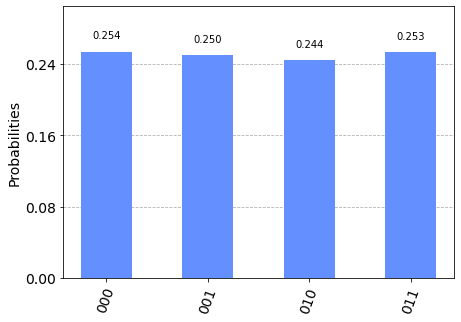

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc, shots=4096)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

In [ ]:
theta = pi/2  # all pixels white
qc1 = QuantumCircuit(3)

qc1.h(0)
qc1.h(1)

qc1.barrier()
#Pixel 1

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.barrier()
#Pixel 2

qc1.x(1)

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.barrier()

qc1.x(1)
qc1.x(0)
qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)


qc1.barrier()

qc1.x(1)

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.measure_all()

qc1.draw(fold=-1)

┌───┐ ░                                              ░                                                   ░ ┌───┐                                             ░                                                   ░ ┌─┐      
   q_0: ┤ H ├─░──────■───────■────────────────■──────────────░───────────■───────■────────────────■──────────────░─┤ X ├─────■───────■────────────────■──────────────░───────────■───────■────────────────■──────────────░─┤M├──────
        ├───┤ ░      │     ┌─┴─┐            ┌─┴─┐            ░ ┌───┐     │     ┌─┴─┐            ┌─┴─┐            ░ ├───┤     │     ┌─┴─┐            ┌─┴─┐            ░ ┌───┐     │     ┌─┴─┐            ┌─┴─┐            ░ └╥┘┌─┐   
   q_1: ┤ H ├─░──────┼─────┤ X ├─────■──────┤ X ├─────■──────░─┤ X ├─────┼─────┤ X ├─────■──────┤ X ├─────■──────░─┤ X ├─────┼─────┤ X ├─────■──────┤ X ├─────■──────░─┤ X ├─────┼─────┤ X ├─────■──────┤ X ├─────■──────░──╫─┤M├───
        └───┘ ░ ┌────┴────┐└───┘┌────┴─────┐└───┘┌────┴────┐ ░ └───┘┌────┴────┐└───┘┌────┴─────┐└───┘┌────┴────┐ ░ └───┘┌────┴────┐└───┘┌────┴─────┐└───┘┌────┴────┐ ░ └───┘┌────┴────┐└───┘┌────┴─────┐└───┘┌────┴────┐ ░  ║ └╥┘┌─┐
   q_2: ──────░─┤ Ry(π/2) ├─────┤ Ry(-π/2) ├─────┤ Ry(π/2) ├─░──────┤ Ry(π/2) ├─────┤ Ry(-π/2) ├─────┤ Ry(π/2) ├─░──────┤ Ry(π/2) ├─────┤ Ry(-π/2) ├─────┤ Ry(π/2) ├─░──────┤ Ry(π/2) ├─────┤ Ry(-π/2) ├─────┤ Ry(π/2) ├─░──╫──╫─┤M├
              ░ └─────────┘     └──────────┘     └─────────┘ ░      └─────────┘     └──────────┘     └─────────┘ ░      └─────────┘     └──────────┘     └─────────┘ ░      └─────────┘     └──────────┘     └─────────┘ ░  ║  ║ └╥┘
meas: 3/════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                                                                                                                                                                            0  1  2

{'101': 1059, '110': 1061, '111': 956, '100': 1020}


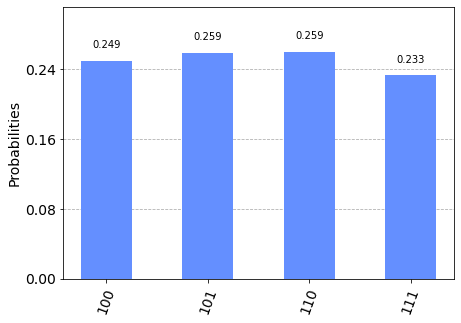

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc1 = transpile(qc1, aer_sim)
qobj = assemble(t_qc1, shots=4096)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc1)
print(counts)
plot_histogram(counts)

In [ ]:
theta = pi/4  # all pixels white
qc2 = qk.QuantumCircuit(3)

qc2.h(0)
qc2.h(1)

qc2.barrier()
#Pixel 1

qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.barrier()
#Pixel 2

qc2.x(1)

qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.barrier()

qc2.x(1)
qc2.x(0)
qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)


qc2.barrier()

qc2.x(1)

qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.measure_all()

qc2.draw(fold=-1)

┌───┐ ░                                              ░                                                   ░ ┌───┐                                             ░                                                   ░ ┌─┐      
   q_0: ┤ H ├─░──────■───────■────────────────■──────────────░───────────■───────■────────────────■──────────────░─┤ X ├─────■───────■────────────────■──────────────░───────────■───────■────────────────■──────────────░─┤M├──────
        ├───┤ ░      │     ┌─┴─┐            ┌─┴─┐            ░ ┌───┐     │     ┌─┴─┐            ┌─┴─┐            ░ ├───┤     │     ┌─┴─┐            ┌─┴─┐            ░ ┌───┐     │     ┌─┴─┐            ┌─┴─┐            ░ └╥┘┌─┐   
   q_1: ┤ H ├─░──────┼─────┤ X ├─────■──────┤ X ├─────■──────░─┤ X ├─────┼─────┤ X ├─────■──────┤ X ├─────■──────░─┤ X ├─────┼─────┤ X ├─────■──────┤ X ├─────■──────░─┤ X ├─────┼─────┤ X ├─────■──────┤ X ├─────■──────░──╫─┤M├───
        └───┘ ░ ┌────┴────┐└───┘┌────┴─────┐└───┘┌────┴────┐ ░ └───┘┌────┴────┐└───┘┌────┴─────┐└───┘┌────┴────┐ ░ └───┘┌────┴────┐└───┘┌────┴─────┐└───┘┌────┴────┐ ░ └───┘┌────┴────┐└───┘┌────┴─────┐└───┘┌────┴────┐ ░  ║ └╥┘┌─┐
   q_2: ──────░─┤ Ry(π/4) ├─────┤ Ry(-π/4) ├─────┤ Ry(π/4) ├─░──────┤ Ry(π/4) ├─────┤ Ry(-π/4) ├─────┤ Ry(π/4) ├─░──────┤ Ry(π/4) ├─────┤ Ry(-π/4) ├─────┤ Ry(π/4) ├─░──────┤ Ry(π/4) ├─────┤ Ry(-π/4) ├─────┤ Ry(π/4) ├─░──╫──╫─┤M├
              ░ └─────────┘     └──────────┘     └─────────┘ ░      └─────────┘     └──────────┘     └─────────┘ ░      └─────────┘     └──────────┘     └─────────┘ ░      └─────────┘     └──────────┘     └─────────┘ ░  ║  ║ └╥┘
meas: 3/════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                                                                                                                                                                            0  1  2

{'010': 494, '001': 525, '101': 519, '110': 498, '100': 507, '011': 534, '000': 508, '111': 511}


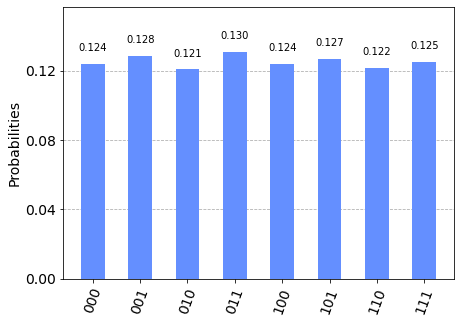

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc2 = transpile(qc2, aer_sim)
qobj = assemble(t_qc2, shots=4096)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc2)
print(counts)
plot_histogram(counts)

In [ ]:
print("Depth : ", qc1.depth())
print("Operations: ", qc1.count_ops())

Depth :  23
Operations:  OrderedDict([('cry', 12), ('cx', 8), ('barrier', 5), ('x', 4), ('measure', 3), ('h', 2)])


In [ ]:
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circ = pm.run(qc1)
new_circ.draw(fold=-1)

┌─────────────┐ ░                                                                                                                             ░                                                                                                                             ░  ┌───────────┐                                                                                                              ░                                                                                                                             ░ ┌─┐      
   q_0: ┤ U3(π/2,0,π) ├─░──────────────────■────────────────────■─────────■────────────────────────────────────────■──────────────────────────────────░──────────────────■────────────────────■─────────■────────────────────────────────────────■──────────────────────────────────░──┤ U3(π,0,π) ├───■────────────────────■─────────■────────────────────────────────────────■──────────────────────────────────░──────────────────■────────────────────■─────────■────────────────────────────────────────■──────────────────────────────────░─┤M├──────
        ├─────────────┤ ░                  │                    │       ┌─┴─┐                                    ┌─┴─┐                                ░  ┌───────────┐   │                    │       ┌─┴─┐                                    ┌─┴─┐                                ░  ├───────────┤   │                    │       ┌─┴─┐                                    ┌─┴─┐                                ░  ┌───────────┐   │                    │       ┌─┴─┐                                    ┌─┴─┐                                ░ └╥┘┌─┐   
   q_1: ┤ U3(π/2,0,π) ├─░──────────────────┼────────────────────┼───────┤ X ├────────■───────────────────■───────┤ X ├───────■────────────────────■───░──┤ U3(π,0,π) ├───┼────────────────────┼───────┤ X ├────────■───────────────────■───────┤ X ├───────■────────────────────■───░──┤ U3(π,0,π) ├───┼────────────────────┼───────┤ X ├────────■───────────────────■───────┤ X ├───────■────────────────────■───░──┤ U3(π,0,π) ├───┼────────────────────┼───────┤ X ├────────■───────────────────■───────┤ X ├───────■────────────────────■───░──╫─┤M├───
        └─────────────┘ ░ ┌─────────────┐┌─┴─┐┌──────────────┐┌─┴─┐┌────┴───┴─────┐┌─┴─┐┌─────────────┐┌─┴─┐┌────┴───┴────┐┌─┴─┐┌──────────────┐┌─┴─┐ ░ ┌┴───────────┴┐┌─┴─┐┌──────────────┐┌─┴─┐┌────┴───┴─────┐┌─┴─┐┌─────────────┐┌─┴─┐┌────┴───┴────┐┌─┴─┐┌──────────────┐┌─┴─┐ ░ ┌┴───────────┴┐┌─┴─┐┌──────────────┐┌─┴─┐┌────┴───┴─────┐┌─┴─┐┌─────────────┐┌─┴─┐┌────┴───┴────┐┌─┴─┐┌──────────────┐┌─┴─┐ ░ ┌┴───────────┴┐┌─┴─┐┌──────────────┐┌─┴─┐┌────┴───┴─────┐┌─┴─┐┌─────────────┐┌─┴─┐┌────┴───┴────┐┌─┴─┐┌──────────────┐┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ────────────────░─┤ U3(π/4,0,0) ├┤ X ├┤ U3(-π/4,0,0) ├┤ X ├┤ U3(-π/4,0,0) ├┤ X ├┤ U3(π/4,0,0) ├┤ X ├┤ U3(π/4,0,0) ├┤ X ├┤ U3(-π/4,0,0) ├┤ X ├─░─┤ U3(π/4,0,0) ├┤ X ├┤ U3(-π/4,0,0) ├┤ X ├┤ U3(-π/4,0,0) ├┤ X ├┤ U3(π/4,0,0) ├┤ X ├┤ U3(π/4,0,0) ├┤ X ├┤ U3(-π/4,0,0) ├┤ X ├─░─┤ U3(π/4,0,0) ├┤ X ├┤ U3(-π/4,0,0) ├┤ X ├┤ U3(-π/4,0,0) ├┤ X ├┤ U3(π/4,0,0) ├┤ X ├┤ U3(π/4,0,0) ├┤ X ├┤ U3(-π/4,0,0) ├┤ X ├─░─┤ U3(π/4,0,0) ├┤ X ├┤ U3(-π/4,0,0) ├┤ X ├┤ U3(-π/4,0,0) ├┤ X ├┤ U3(π/4,0,0) ├┤ X ├┤ U3(π/4,0,0) ├┤ X ├┤ U3(-π/4,0,0) ├┤ X ├─░──╫──╫─┤M├
                        ░ └─────────────┘└───┘└──────────────┘└───┘└──────────────┘└───┘└─────────────┘└───┘└─────────────┘└───┘└──────────────┘└───┘ ░ └─────────────┘└───┘└──────────────┘└───┘└──────────────┘└───┘└─────────────┘└───┘└─────────────┘└───┘└──────────────┘└───┘ ░ └─────────────┘└───┘└──────────────┘└───┘└──────────────┘└───┘└─────────────┘└───┘└─────────────┘└───┘└──────────────┘└───┘ ░ └─────────────┘└───┘└──────────────┘└───┘└──────────────┘└───┘└─────────────┘└───┘└─────────────┘└───┘└──────────────┘└───┘ ░  ║  ║ └╥┘
meas: 3/════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

In [ ]:
print("Depth : ", new_circ.depth())
print("Operations: ", new_circ.count_ops())

Depth :  50
Operations:  OrderedDict([('cx', 32), ('u3', 30), ('barrier', 5), ('measure', 3)])


In [ ]:
from qiskit.test.mock import FakeAthens
fake_athens = FakeAthens()
# The device coupling map is needed for transpiling to correct
# CNOT gates before simulation
coupling_map = fake_athens.configuration().coupling_map
optimized_3 = transpile(qc1, backend=fake_athens, seed_transpiler=11, optimization_level=3)
print('gates = ', optimized_3.count_ops())
print('depth = ', optimized_3.depth())

gates =  OrderedDict([('rz', 61), ('sx', 55), ('cx', 51), ('barrier', 5), ('x', 4), ('measure', 3)])
depth =  148


In [ ]:
t_qc1 = transpile(qc1, fake_athens, optimization_level=3)
qobj = assemble(t_qc1, shots=4096)
result = fake_athens.run(qobj).result()
counts = result.get_counts(qc1)
print(counts)
plot_histogram(counts)

QiskitError: ignored

{'111': 1087, '100': 1022, '101': 995, '110': 992}


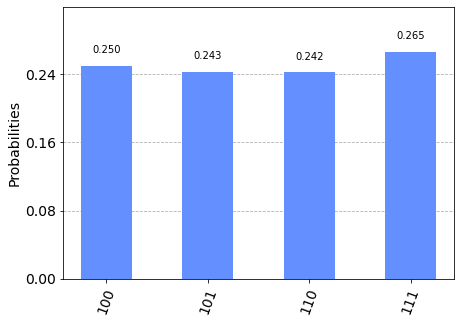

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(t_qc1, shots=4096)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc1)
print(counts)
plot_histogram(counts)

In [ ]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister

# Initialize the quantum circuit for the image 
# Pixel position
idx = QuantumRegister(2, 'idx')
# grayscale pixel intensity value
intensity = QuantumRegister(8,'intensity')
# classical register
cr = ClassicalRegister(10, 'cr')

# create the quantum circuit for the image
qc_image = QuantumCircuit(intensity, idx, cr)

# set the total number of qubits
num_qubits = qc_image.num_qubits

qc_image.draw()

intensity_0: 
             
intensity_1: 
             
intensity_2: 
             
intensity_3: 
             
intensity_4: 
             
intensity_5: 
             
intensity_6: 
             
intensity_7: 
             
      idx_0: 
             
      idx_1: 
             
      cr: 10/

In [ ]:
# Initialize the quantum circuit

# Optional: Add Identity gates to the intensity values
for idx in range(intensity.size):
    qc_image.i(idx)

# Add Hadamard gates to the pixel positions    
qc_image.h(8)
qc_image.h(9)

# Separate with barrier so it is easy to read later.
qc_image.barrier()
qc_image.draw()

┌───┐ ░ 
intensity_0: ┤ I ├─░─
             ├───┤ ░ 
intensity_1: ┤ I ├─░─
             ├───┤ ░ 
intensity_2: ┤ I ├─░─
             ├───┤ ░ 
intensity_3: ┤ I ├─░─
             ├───┤ ░ 
intensity_4: ┤ I ├─░─
             ├───┤ ░ 
intensity_5: ┤ I ├─░─
             ├───┤ ░ 
intensity_6: ┤ I ├─░─
             ├───┤ ░ 
intensity_7: ┤ I ├─░─
             ├───┤ ░ 
      idx_0: ┤ H ├─░─
             ├───┤ ░ 
      idx_1: ┤ H ├─░─
             └───┘ ░ 
      cr: 10/════════

In [ ]:
# Encode the first pixel, since its value is 0, we will apply ID gates here:
for idx in range(num_qubits):
    qc_image.i(idx)

qc_image.barrier()
qc_image.draw()

┌───┐ ░ ┌───┐ ░ 
intensity_0: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_1: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_2: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_3: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_4: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_5: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_6: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_7: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
      idx_0: ┤ H ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
      idx_1: ┤ H ├─░─┤ I ├─░─
             └───┘ ░ └───┘ ░ 
      cr: 10/════════════════

In [ ]:
# Encode the second pixel whose value is (01100100):
value01 = '01100100'

# Add the NOT gate to set the position at 01:
qc_image.x(qc_image.num_qubits-1)

# We'll reverse order the value so it is in the same order when measured.
for idx, px_value in enumerate(value01[::-1]):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1, num_qubits-2, idx)

# Reset the NOT gate
qc_image.x(num_qubits-1)

qc_image.barrier()
qc_image.draw()

┌───┐ ░ ┌───┐ ░                           ░ 
intensity_0: ┤ I ├─░─┤ I ├─░───────────────────────────░─
             ├───┤ ░ ├───┤ ░                           ░ 
intensity_1: ┤ I ├─░─┤ I ├─░───────────────────────────░─
             ├───┤ ░ ├───┤ ░      ┌───┐                ░ 
intensity_2: ┤ I ├─░─┤ I ├─░──────┤ X ├────────────────░─
             ├───┤ ░ ├───┤ ░      └─┬─┘                ░ 
intensity_3: ┤ I ├─░─┤ I ├─░────────┼──────────────────░─
             ├───┤ ░ ├───┤ ░        │                  ░ 
intensity_4: ┤ I ├─░─┤ I ├─░────────┼──────────────────░─
             ├───┤ ░ ├───┤ ░        │  ┌───┐           ░ 
intensity_5: ┤ I ├─░─┤ I ├─░────────┼──┤ X ├───────────░─
             ├───┤ ░ ├───┤ ░        │  └─┬─┘┌───┐      ░ 
intensity_6: ┤ I ├─░─┤ I ├─░────────┼────┼──┤ X ├──────░─
             ├───┤ ░ ├───┤ ░        │    │  └─┬─┘      ░ 
intensity_7: ┤ I ├─░─┤ I ├─░────────┼────┼────┼────────░─
             ├───┤ ░ ├───┤ ░        │    │    │        ░ 
      idx_0: ┤ H ├─░─┤ I ├─░────────■────■────■────────░─
             ├───┤ ░ ├───┤ ░ ┌───┐  │    │    │  ┌───┐ ░ 
      idx_1: ┤ H ├─░─┤ I ├─░─┤ X ├──■────■────■──┤ X ├─░─
             └───┘ ░ └───┘ ░ └───┘               └───┘ ░ 
      cr: 10/════════════════════════════════════════════

In [ ]:
# Encode the third pixel whose value is (11001000):
value10 = '11001000'

# Add the 0CNOT gates, where 0 is on X pixel:
qc_image.x(num_qubits-2)
for idx, px_value in enumerate(value10[::-1]):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1, num_qubits-2, idx)
qc_image.x(num_qubits-2)


qc_image.barrier()
qc_image.draw(fold=-1)

┌───┐ ░ ┌───┐ ░                           ░                           ░                           ░ 
intensity_0: ┤ I ├─░─┤ I ├─░───────────────────────────░───────────────────────────░───────────────────────────░─
             ├───┤ ░ ├───┤ ░                           ░                           ░                           ░ 
intensity_1: ┤ I ├─░─┤ I ├─░───────────────────────────░───────────────────────────░───────────────────────────░─
             ├───┤ ░ ├───┤ ░      ┌───┐                ░                           ░                           ░ 
intensity_2: ┤ I ├─░─┤ I ├─░──────┤ X ├────────────────░───────────────────────────░───────────────────────────░─
             ├───┤ ░ ├───┤ ░      └─┬─┘                ░      ┌───┐                ░      ┌───┐                ░ 
intensity_3: ┤ I ├─░─┤ I ├─░────────┼──────────────────░──────┤ X ├────────────────░──────┤ X ├────────────────░─
             ├───┤ ░ ├───┤ ░        │                  ░      └─┬─┘                ░      └─┬─┘                ░ 
intensity_4: ┤ I ├─░─┤ I ├─░────────┼──────────────────░────────┼──────────────────░────────┼──────────────────░─
             ├───┤ ░ ├───┤ ░        │  ┌───┐           ░        │                  ░        │                  ░ 
intensity_5: ┤ I ├─░─┤ I ├─░────────┼──┤ X ├───────────░────────┼──────────────────░────────┼──────────────────░─
             ├───┤ ░ ├───┤ ░        │  └─┬─┘┌───┐      ░        │  ┌───┐           ░        │  ┌───┐           ░ 
intensity_6: ┤ I ├─░─┤ I ├─░────────┼────┼──┤ X ├──────░────────┼──┤ X ├───────────░────────┼──┤ X ├───────────░─
             ├───┤ ░ ├───┤ ░        │    │  └─┬─┘      ░        │  └─┬─┘┌───┐      ░        │  └─┬─┘┌───┐      ░ 
intensity_7: ┤ I ├─░─┤ I ├─░────────┼────┼────┼────────░────────┼────┼──┤ X ├──────░────────┼────┼──┤ X ├──────░─
             ├───┤ ░ ├───┤ ░        │    │    │        ░ ┌───┐  │    │  └─┬─┘┌───┐ ░ ┌───┐  │    │  └─┬─┘┌───┐ ░ 
      idx_0: ┤ H ├─░─┤ I ├─░────────■────■────■────────░─┤ X ├──■────■────■──┤ X ├─░─┤ X ├──■────■────■──┤ X ├─░─
             ├───┤ ░ ├───┤ ░ ┌───┐  │    │    │  ┌───┐ ░ └───┘  │    │    │  └───┘ ░ └───┘  │    │    │  └───┘ ░ 
      idx_1: ┤ H ├─░─┤ I ├─░─┤ X ├──■────■────■──┤ X ├─░────────■────■────■────────░────────■────■────■────────░─
             └───┘ ░ └───┘ ░ └───┘               └───┘ ░                           ░                           ░ 
      cr: 10/════════════════════════════════════════════════════════════════════════════════════════════════════

In [ ]:
# Encode the third pixel whose value is (10101010):
value11 = '11111111'

# Add the CCNOT gates:
for idx, px_value in enumerate(value11):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1,num_qubits-2, idx)

qc_image.barrier()
qc_image.measure(range(10),range(10))
qc_image.draw(fold=-1)

┌───┐ ░ ┌───┐ ░                           ░                           ░                           ░ ┌───┐                                    ░ ┌─┐                           
intensity_0: ┤ I ├─░─┤ I ├─░───────────────────────────░───────────────────────────░───────────────────────────░─┤ X ├────────────────────────────────────░─┤M├───────────────────────────
             ├───┤ ░ ├───┤ ░                           ░                           ░                           ░ └─┬─┘┌───┐                               ░ └╥┘┌─┐                        
intensity_1: ┤ I ├─░─┤ I ├─░───────────────────────────░───────────────────────────░───────────────────────────░───┼──┤ X ├───────────────────────────────░──╫─┤M├────────────────────────
             ├───┤ ░ ├───┤ ░      ┌───┐                ░                           ░                           ░   │  └─┬─┘┌───┐                          ░  ║ └╥┘┌─┐                     
intensity_2: ┤ I ├─░─┤ I ├─░──────┤ X ├────────────────░───────────────────────────░───────────────────────────░───┼────┼──┤ X ├──────────────────────────░──╫──╫─┤M├─────────────────────
             ├───┤ ░ ├───┤ ░      └─┬─┘                ░      ┌───┐                ░      ┌───┐                ░   │    │  └─┬─┘┌───┐                     ░  ║  ║ └╥┘┌─┐                  
intensity_3: ┤ I ├─░─┤ I ├─░────────┼──────────────────░──────┤ X ├────────────────░──────┤ X ├────────────────░───┼────┼────┼──┤ X ├─────────────────────░──╫──╫──╫─┤M├──────────────────
             ├───┤ ░ ├───┤ ░        │                  ░      └─┬─┘                ░      └─┬─┘                ░   │    │    │  └─┬─┘┌───┐                ░  ║  ║  ║ └╥┘┌─┐               
intensity_4: ┤ I ├─░─┤ I ├─░────────┼──────────────────░────────┼──────────────────░────────┼──────────────────░───┼────┼────┼────┼──┤ X ├────────────────░──╫──╫──╫──╫─┤M├───────────────
             ├───┤ ░ ├───┤ ░        │  ┌───┐           ░        │                  ░        │                  ░   │    │    │    │  └─┬─┘┌───┐           ░  ║  ║  ║  ║ └╥┘┌─┐            
intensity_5: ┤ I ├─░─┤ I ├─░────────┼──┤ X ├───────────░────────┼──────────────────░────────┼──────────────────░───┼────┼────┼────┼────┼──┤ X ├───────────░──╫──╫──╫──╫──╫─┤M├────────────
             ├───┤ ░ ├───┤ ░        │  └─┬─┘┌───┐      ░        │  ┌───┐           ░        │  ┌───┐           ░   │    │    │    │    │  └─┬─┘┌───┐      ░  ║  ║  ║  ║  ║ └╥┘┌─┐         
intensity_6: ┤ I ├─░─┤ I ├─░────────┼────┼──┤ X ├──────░────────┼──┤ X ├───────────░────────┼──┤ X ├───────────░───┼────┼────┼────┼────┼────┼──┤ X ├──────░──╫──╫──╫──╫──╫──╫─┤M├─────────
             ├───┤ ░ ├───┤ ░        │    │  └─┬─┘      ░        │  └─┬─┘┌───┐      ░        │  └─┬─┘┌───┐      ░   │    │    │    │    │    │  └─┬─┘┌───┐ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
intensity_7: ┤ I ├─░─┤ I ├─░────────┼────┼────┼────────░────────┼────┼──┤ X ├──────░────────┼────┼──┤ X ├──────░───┼────┼────┼────┼────┼────┼────┼──┤ X ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├──────
             ├───┤ ░ ├───┤ ░        │    │    │        ░ ┌───┐  │    │  └─┬─┘┌───┐ ░ ┌───┐  │    │  └─┬─┘┌───┐ ░   │    │    │    │    │    │    │  └─┬─┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
      idx_0: ┤ H ├─░─┤ I ├─░────────■────■────■────────░─┤ X ├──■────■────■──┤ X ├─░─┤ X ├──■────■────■──┤ X ├─░───■────■────■────■────■────■────■────■───░──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
             ├───┤ ░ ├───┤ ░ ┌───┐  │    │    │  ┌───┐ ░ └───┘  │    │    │  └───┘ ░ └───┘  │    │    │  └───┘ ░   │    │    │    │    │    │    │    │   ░  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
      idx_1: ┤ H ├─░─┤ I ├─░─┤ X ├──■────■────■──┤ X ├─░────────■────■────■────────░────────■────■────■────────░───■────■────■────■────■────■────■────■───░──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
             └───┘ ░ └───┘ ░ └───┘               └───┘ ░                           ░                           ░                                          ░  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
      cr: 10/═════════════════════════════════════════════════════════════════════════

In [ ]:
print('Circuit dimensions')
print('Circuit depth: ', qc_image.decompose().depth())
print('Circuit size: ', qc_image.decompose().size())

qc_image.decompose().count_ops()

Circuit dimensions
Circuit depth:  180
Circuit size:  291


OrderedDict([('cx', 102),
             ('t', 68),
             ('tdg', 51),
             ('h', 34),
             ('id', 18),
             ('measure', 10),
             ('barrier', 6),
             ('u3', 6),
             ('u2', 2)])

Encoded: 00 = 0
Encoded: 01 = 01100100
Encoded: 10 = 11001000
Encoded: 11 = 1
{'0000000000': 2024, '0101100100': 2066, '1000000000': 2063, '1111111111': 2039}


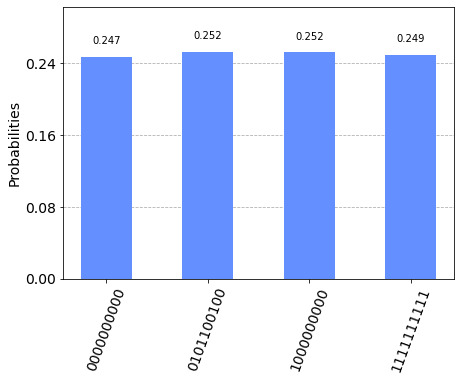

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc_image = transpile(qc_image, aer_sim)
qobj = assemble(t_qc_image, shots=8192)
job_neqr = aer_sim.run(qobj)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts()
print('Encoded: 00 = 0')
print('Encoded: 01 = 01100100')
print('Encoded: 10 = 11001000')
print('Encoded: 11 = 1')

print(counts_neqr)
plot_histogram(counts_neqr)

Quantum Edge Detection - QHED Algorithm on Small and Large Images

In [ ]:
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit import IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')

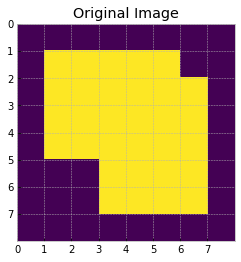

In [ ]:
# A 8x8 binary image represented as a numpy array
image = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 1, 1, 1, 1, 1, 1, 0],
                  [0, 1, 1, 1, 1, 1, 1, 0],
                  [0, 1, 1, 1, 1, 1, 1, 0],
                  [0, 0, 0, 1, 1, 1, 1, 0],
                  [0, 0, 0, 1, 1, 1, 1, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0]])

# Function for plotting the image using matplotlib
def plot_image(img, title: str):
    plt.title(title)
    plt.xticks(range(img.shape[0]))
    plt.yticks(range(img.shape[1]))
    plt.imshow(img, extent=[0, img.shape[0], img.shape[1], 0], cmap='viridis')
    plt.show()
    
plot_image(image, 'Original Image')

In [ ]:
# Convert the raw pixel values to probability amplitudes
def amplitude_encode(img_data):
    
    # Calculate the RMS value
    rms = np.sqrt(np.sum(np.sum(img_data**2, axis=1)))
    
    # Create normalized image
    image_norm = []
    for arr in img_data:
        for ele in arr:
            image_norm.append(ele / rms)
        
    # Return the normalized image as a numpy array
    return np.array(image_norm)

# Get the amplitude ancoded pixel values
# Horizontal: Original image
image_norm_h = amplitude_encode(image)

# Vertical: Transpose of Original image
image_norm_v = amplitude_encode(image.T)

In [ ]:
# Initialize some global variable for number of qubits
data_qb = 6
anc_qb = 1
total_qb = data_qb + anc_qb

# Initialize the amplitude permutation unitary
D2n_1 = np.roll(np.identity(2**total_qb), 1, axis=1)

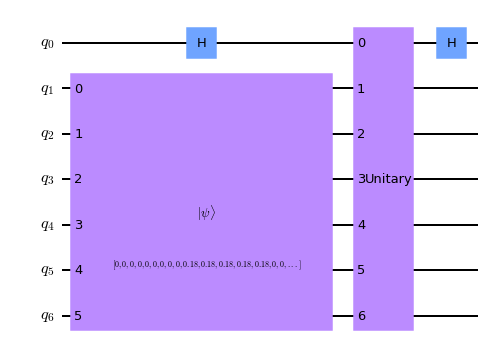

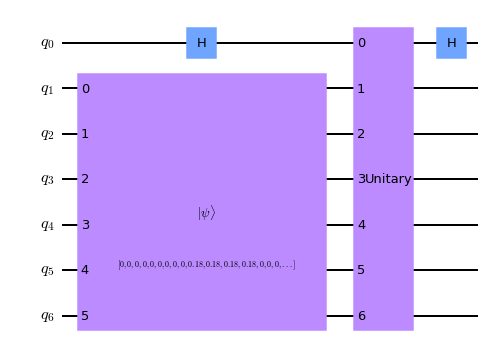

In [ ]:
# Create the circuit for horizontal scan
qc_h = QuantumCircuit(total_qb)
qc_h.initialize(image_norm_h, range(1, total_qb))
qc_h.h(0)
qc_h.unitary(D2n_1, range(total_qb))
qc_h.h(0)
display(qc_h.draw('mpl', fold=-1))

# Create the circuit for vertical scan
qc_v = QuantumCircuit(total_qb)
qc_v.initialize(image_norm_v, range(1, total_qb))
qc_v.h(0)
qc_v.unitary(D2n_1, range(total_qb))
qc_v.h(0)
display(qc_v.draw('mpl', fold=-1))

# Combine both circuits into a single list
circ_list = [qc_h, qc_v]

In [ ]:
# Simulating the cirucits
back = Aer.get_backend('statevector_simulator')
results = execute(circ_list, backend=back).result()
sv_h = results.get_statevector(qc_h)
sv_v = results.get_statevector(qc_v)

from qiskit.visualization import array_to_latex
print('Horizontal scan statevector:')
display(array_to_latex(sv_h[:30], max_size=30))
print()
print('Vertical scan statevector:')
display(array_to_latex(sv_v[:30], max_size=30))

Horizontal scan statevector:


QiskitError: ignored

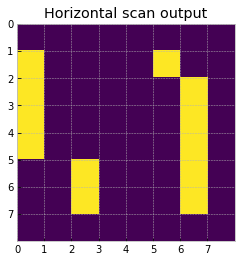

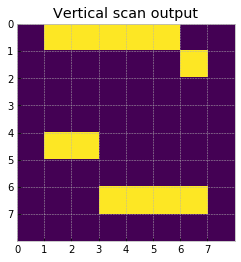

In [ ]:
# Classical postprocessing for plotting the output

# Defining a lambda function for
# thresholding to binary values
threshold = lambda amp: (amp > 1e-15 or amp < -1e-15)

# Selecting odd states from the raw statevector and
# reshaping column vector of size 64 to an 8x8 matrix
edge_scan_h = np.abs(np.array([1 if threshold(sv_h[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(8, 8)
edge_scan_v = np.abs(np.array([1 if threshold(sv_v[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(8, 8).T

# Plotting the Horizontal and vertical scans
plot_image(edge_scan_h, 'Horizontal scan output')
plot_image(edge_scan_v, 'Vertical scan output')

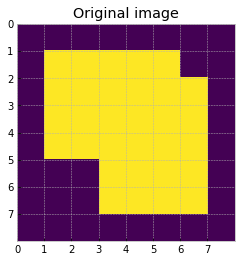

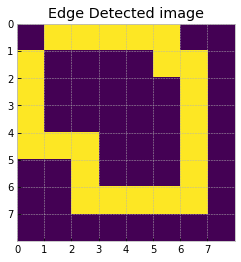

In [ ]:
# Combining the horizontal and vertical component of the result
edge_scan_sim = edge_scan_h | edge_scan_v

# Plotting the original and edge-detected images
plot_image(image, 'Original image')
plot_image(edge_scan_sim, 'Edge Detected image')

In [ ]:
from qiskit import IBMQ

# Load the IBMQ account
IBMQ.enable_account('99e1dd08f2c46188b04a339f1db939ca95b546d2f5ce04176d8a47effe5a12c21cf224a58afb38ee95effeeba182ac34cd14fc18f276cd5ef7948e910f68eea5')

# Get the provider and backend
provider = IBMQ.get_provider(hub='ibm-q', group='open')
backend = provider.get_backend('ibmq_quito')

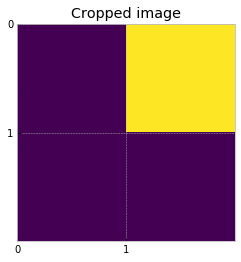

In [ ]:
# Create a 2x2 image to be run on the hardware
# The pixels in `image_small` correspond to the pixels at
# (6, 2), (6, 3), (7, 2), (7, 3) respectively
image_small = image[6:8, 2:4]

# Plotting the image_small using matplotlib
plot_image(image_small, 'Cropped image')

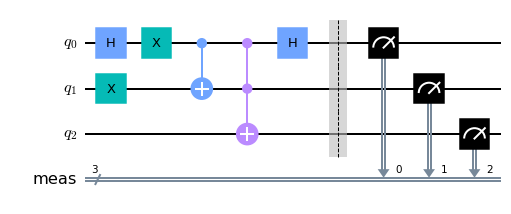

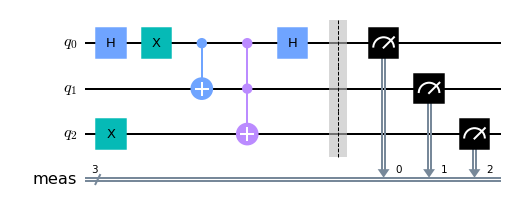

In [ ]:
# Initialize the number of qubits
data_qb = 2
anc_qb = 1
total_qb = data_qb + anc_qb

# Create the circuit for horizontal scan
qc_small_h = QuantumCircuit(total_qb)
qc_small_h.x(1)
qc_small_h.h(0)

# Decrement gate - START
qc_small_h.x(0)
qc_small_h.cx(0, 1)
qc_small_h.ccx(0, 1, 2)
# Decrement gate - END

qc_small_h.h(0)
qc_small_h.measure_all()
display(qc_small_h.draw('mpl'))

# Create the circuit for vertical scan
qc_small_v = QuantumCircuit(total_qb)
qc_small_v.x(2)
qc_small_v.h(0)

# Decrement gate - START
qc_small_v.x(0)
qc_small_v.cx(0, 1)
qc_small_v.ccx(0, 1, 2)
# Decrement gate - END

qc_small_v.h(0)
qc_small_v.measure_all()
display(qc_small_v.draw('mpl'))

# Combine both circuits into a single list
circ_list = [qc_small_h, qc_small_v]

In [ ]:
# Transpile the circuits for optimized execution on the backend
qc_small_h_t = transpile(qc_small_h, backend=backend, optimization_level=3)
qc_small_v_t = transpile(qc_small_v, backend=backend, optimization_level=3)

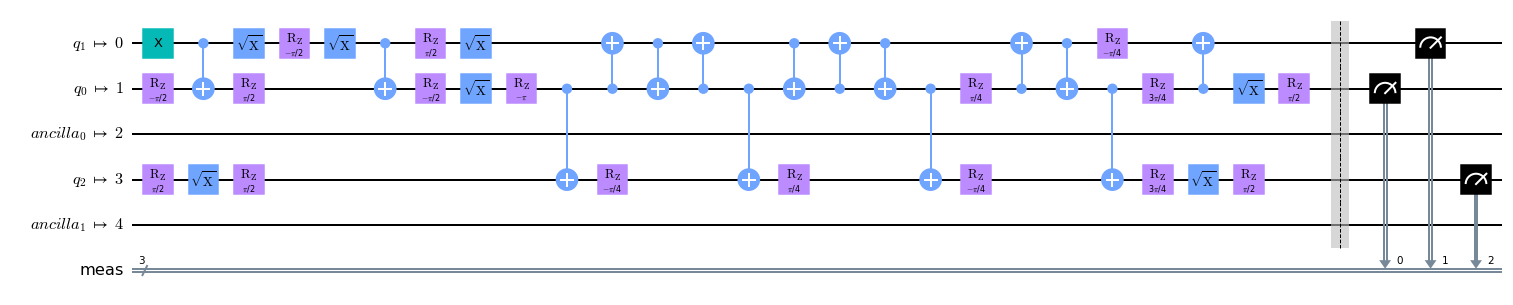

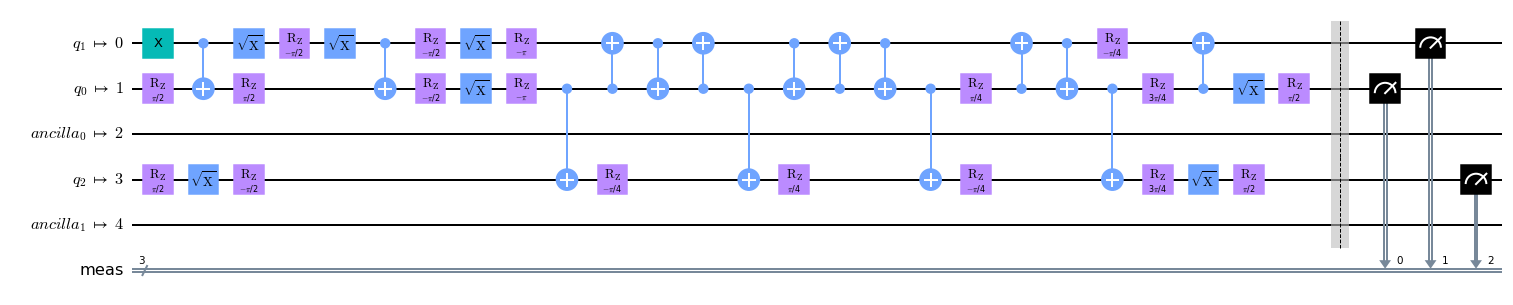

In [ ]:
# Combining both circuits into a list
circ_list_t = [qc_small_h_t, qc_small_v_t]

# Drawing the transpiled circuit
display(circ_list_t[0].draw('mpl', fold=-1))
display(circ_list_t[1].draw('mpl', fold=-1))

In [ ]:
from qiskit.tools.monitor import job_monitor

# Executing the circuits on the backend
job = execute(circ_list_t, backend=backend, shots=8192)
job_monitor(job)

Job Status: job has successfully run


Counts for Horizontal scan:


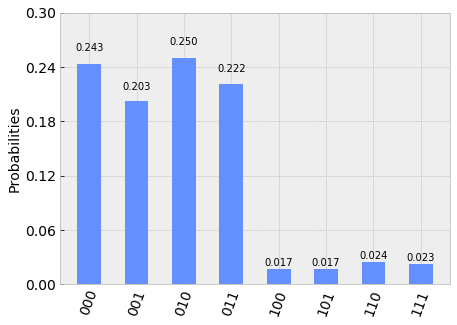



Counts for Vertical scan:


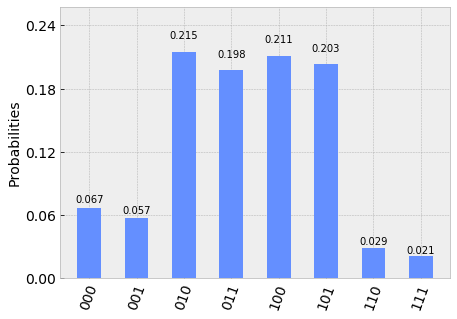

In [ ]:
from qiskit.visualization import plot_histogram

# Getting the resultant probability distribution after measurement
result = job.result()
counts_h = result.get_counts(qc_small_h)
counts_v = result.get_counts(qc_small_v)

print('Counts for Horizontal scan:')
display(plot_histogram(counts_h))

print('\n\nCounts for Vertical scan:')
display(plot_histogram(counts_v))

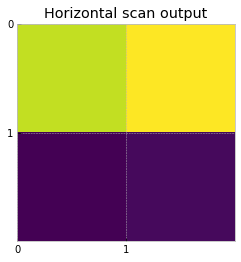

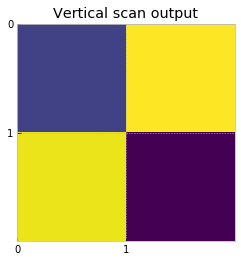

In [ ]:
# Extracting counts for odd-numbered states
edge_scan_small_h = np.array([counts_h[f'{2*i+1:03b}'] for i in range(2**data_qb)]).reshape(2, 2)
edge_scan_small_v = np.array([counts_v[f'{2*i+1:03b}'] for i in range(2**data_qb)]).reshape(2, 2).T

plot_image(edge_scan_small_h, 'Horizontal scan output')
plot_image(edge_scan_small_v, 'Vertical scan output')

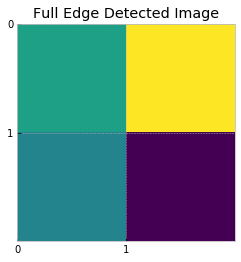

In [ ]:
edge_detected_image_small = edge_scan_small_h + edge_scan_small_v

# Plotting the original and edge-detected images
plot_image(edge_detected_image_small, 'Full Edge Detected Image')

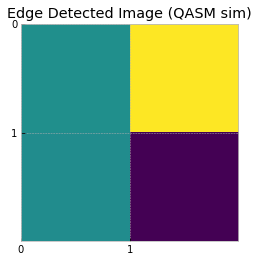

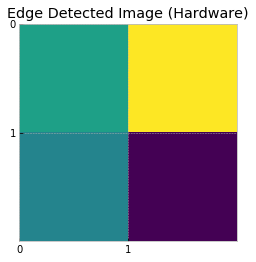

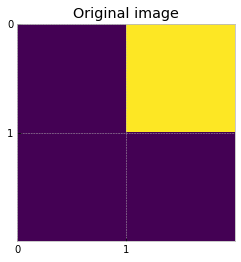

In [ ]:
# Initialise the qasm_simulator from the Aer package
sim = Aer.get_backend('qasm_simulator')
res = sim.run(circ_list_t, shots=8192).result()
sim_counts_h = res.get_counts(qc_small_h)
sim_counts_v = res.get_counts(qc_small_v)

# Get the measurement counts from the result
sim_keys_h = sim_counts_h.keys()
sim_keys_v = sim_counts_v.keys()

# Filter and extract the counts for odd-numbered states
# and make the full edge-detected image by adding horizontal and vertical scans
edge_scan_sim_h = np.array([sim_counts_h[f'{2*i+1:03b}'] if f'{2*i+1:03b}' in sim_keys_h else 0 for i in range(2**data_qb)]).reshape(2, 2)
edge_scan_sim_v = np.array([sim_counts_v[f'{2*i+1:03b}'] if f'{2*i+1:03b}' in sim_keys_v else 0 for i in range(2**data_qb)]).reshape(2, 2).T
edge_detected_sim_small = edge_scan_sim_h + edge_scan_sim_v

# Plot all the simulator-run, hardware-run, and original images
plot_image(edge_detected_sim_small, 'Edge Detected Image (QASM sim)')
plot_image(edge_detected_image_small, 'Edge Detected Image (Hardware)')
plot_image(image_small, 'Original image')

In [ ]:
from PIL import Image
style.use('default')

image_size = 256       # Original image-width
image_crop_size = 32   # Width of each part of image for processing


# Load the image from filesystem
image_raw = np.array(Image.open('./images/edge_detection_input.jpg'))
print('Raw Image info:', image_raw.shape)
print('Raw Image datatype:', image_raw.dtype)


# Convert the RBG component of the image to B&W image, as a numpy (uint8) array
image = []
for i in range(image_size):
    image.append([])
    for j in range(image_size):
        image[i].append(image_raw[i][j][0] / 255)
            
image = np.array(image)
print('Image shape (numpy array):', image.shape)


# Display the image
plt.title('Big Image')
plt.xticks(range(0, image.shape[0]+1, 32))
plt.yticks(range(0, image.shape[1]+1, 32))
plt.imshow(image, extent=[0, image.shape[0], image.shape[1], 0], cmap='viridis')
plt.show()

FileNotFoundError: ignored

Solving the Travelling Salesman Problem using Phase Estimation

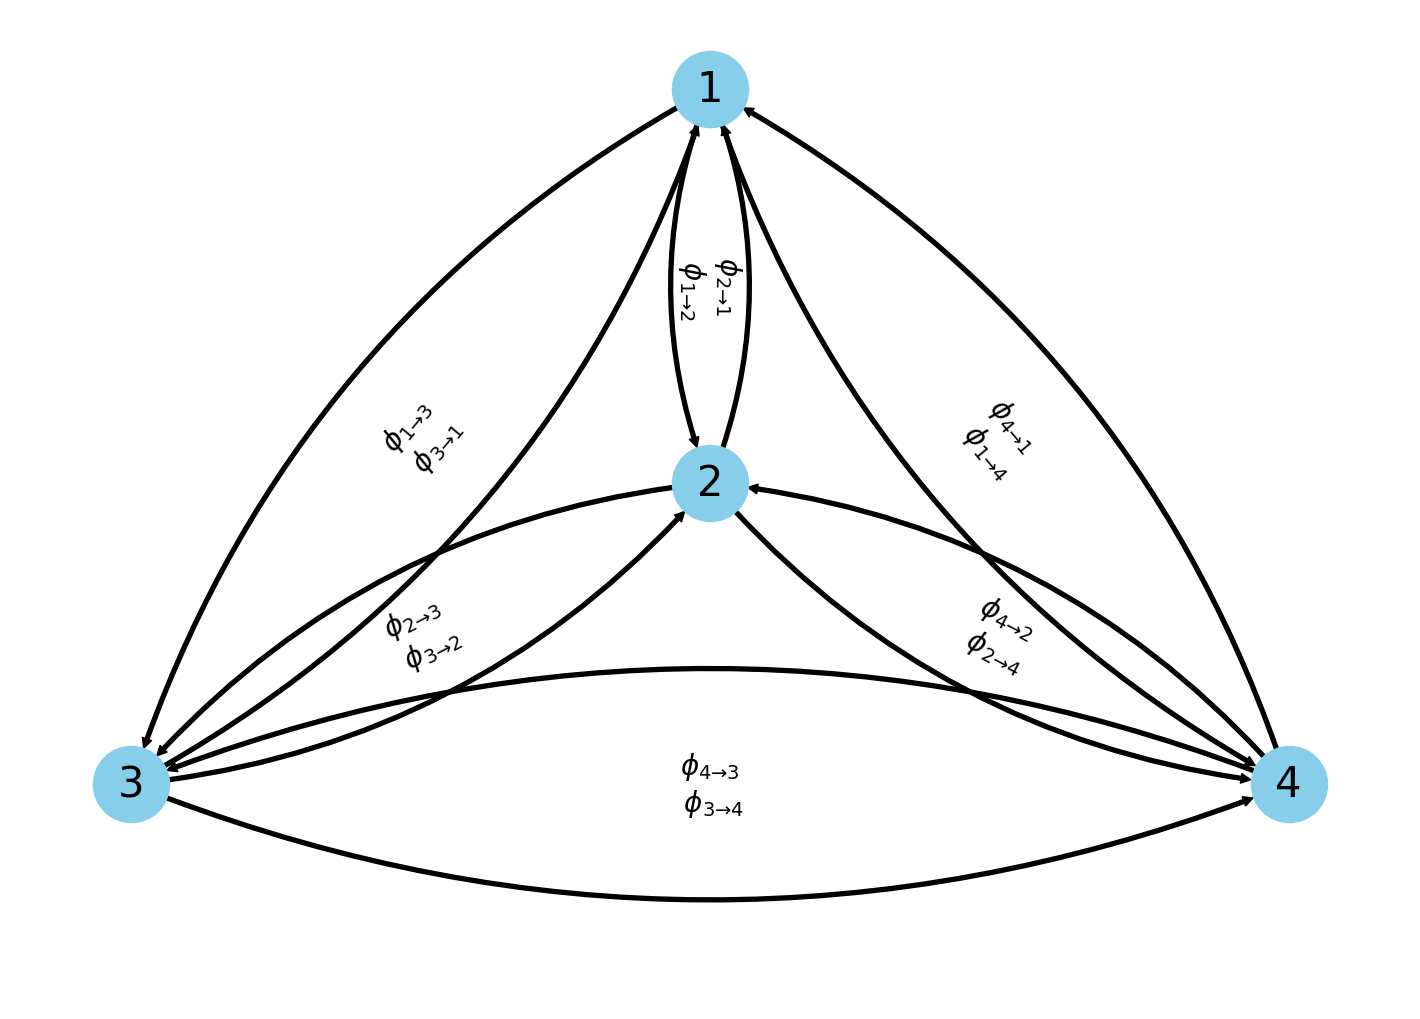

In [ ]:
# Building the graph with nodes = 4

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph(directed=True)
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)

G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)

G.add_edge(2, 1)
G.add_edge(2, 3)
G.add_edge(2, 4)

G.add_edge(3, 1)
G.add_edge(3, 2)
G.add_edge(3, 4)

G.add_edge(4, 1)
G.add_edge(4, 2)
G.add_edge(4, 3)

pos = {1: [0.75, 1.0],
      2: [0.75, 0.15],
      3: [0.5, -0.5],
      4: [1.0, -0.5]}


edge_labels = {(1, 2): '$\\phi_{2\\to 1}$\n $\\phi_{1\\to 2}$',
              (1, 3): '$\\phi_{1\\to 3}$\n $\\phi_{3\\to 1}$',
              (1, 4): '$\\phi_{4\\to 1}$\n $\\phi_{1\\to 4}$',
              (2, 3): '$\\phi_{2\\to 3}$\n $\\phi_{3\\to 2}$',
              (2, 4): '$\\phi_{4\\to 2}$\n $\\phi_{2\\to 4}$',
              (3, 4): '$\\phi_{4\\to 3}$\n $\\phi_{3\\to 4}$'
              }

fig = plt.figure(1, figsize=(14, 10)) 
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos, connectionstyle='arc3, rad = 0.2', 
        node_size=3000, arrowsize=14, arrowstyle='simple', font_size=30)

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=20, bbox=dict(alpha=0))
 
plt.show()

In [ ]:
# Lets import all the necessary libraries
from qiskit import QuantumCircuit, Aer, QuantumRegister, ClassicalRegister, execute
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.circuit.library import QFT
from numpy import pi

In [ ]:
at = 0
bt = pi/2
ct = pi/8
dt = pi/4

qt = QuantumRegister(3, 'qt')
qct = QuantumCircuit(qt)

qct.cp(ct - at, qt[0], qt[1])
qct.p(at, qt[0])
qct.cp(bt - at, qt[0], qt[2])

qct.cp((dt - ct + at - bt)/2, qt[1], qt[2])
qct.cx(qt[0], qt[1])
qct.cp(-(dt - ct + at - bt)/2, qt[1], qt[2])
qct.cx(qt[0], qt[1])
qct.cp((dt - ct + at - bt)/2, qt[0], qt[2])

qct.draw()

┌──────┐                                                      
qt_0: ─■───────┤ P(0) ├─■─────────────────────■───────────────■───■──────────
       │P(π/8) └──────┘ │                   ┌─┴─┐           ┌─┴─┐ │          
qt_1: ─■────────────────┼────────■──────────┤ X ├─■─────────┤ X ├─┼──────────
                        │P(π/2)  │P(-3π/16) └───┘ │P(3π/16) └───┘ │P(-3π/16) 
qt_2: ──────────────────■────────■────────────────■───────────────■──────────

In [ ]:
backend_unitary_t = Aer.get_backend('unitary_simulator')
job_unitary_t = execute(qct, backend_unitary_t, shots=8192)
count_unitary_t = job_unitary_t.result().get_unitary()
array_to_latex(count_unitary_t, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

In [ ]:
ai = 0
bi = pi/2
ci = pi/8
di = pi/4

qi = QuantumRegister(3, 'qi')
qci = QuantumCircuit(qi)


qci.cp(ci - ai, qi[2], qi[1])
qci.p(ai, qi[2])
qci.cp(bi - ai, qi[2], qi[0])

qci.cp((di - ci + ai - bi)/2, qi[1], qi[0])
qci.cx(qi[2], qi[1])
qci.cp(-(di - ci + ai - bi)/2, qi[1], qi[0])
qci.cx(qi[2], qi[1])
qci.cp((di - ci + ai - bi)/2, qi[2], qi[0])

qci.draw()

qi_0: ──────────────────■────────■────────────────■───────────────■──────────
                        │        │P(-3π/16) ┌───┐ │P(3π/16) ┌───┐ │          
qi_1: ─■────────────────┼────────■──────────┤ X ├─■─────────┤ X ├─┼──────────
       │P(π/8) ┌──────┐ │P(π/2)             └─┬─┘           └─┬─┘ │P(-3π/16) 
qi_2: ─■───────┤ P(0) ├─■─────────────────────■───────────────■───■──────────
               └──────┘

In [ ]:
backend_unitary_i = Aer.get_backend('unitary_simulator')
job_unitary_i = execute(qci, backend_unitary_i, shots=8192)
count_unitary_i = job_unitary_i.result().get_unitary()
array_to_latex(count_unitary_i, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

In [ ]:
def controlled_unitary(qc, qubits: list, phases: list): # x,y,z = Specific Qubit; a,b,c,d = Phases
    qc.cp(phases[2]-phases[0], qubits[0], qubits[1]) # controlled-U1(c-a)
    qc.p(phases[0], qubits[0]) # U1(a)
    qc.cp(phases[1]-phases[0], qubits[0], qubits[2]) # controlled-U1(b-a)
    
    # controlled controlled U1(d-c+a-b)
    qc.cp((phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[1], qubits[2])
    qc.cx(qubits[0], qubits[1])
    qc.cp(-(phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[1], qubits[2])
    qc.cx(qubits[0], qubits[1])
    qc.cp((phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[0], qubits[2])

def U(times, qc, unit, eigen, phases: list): # a,b,c = phases for U1; d,e,f = phases for U2; g,h,i = phases for U3; j,k,l = phases for U4; m_list=[m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l]
    controlled_unitary(qc, [unit[0]]+eigen[0:2], [0]+phases[0:3])
    controlled_unitary(qc, [unit[0]]+eigen[2:4], [phases[3]]+[0]+phases[4:6])
    controlled_unitary(qc, [unit[0]]+eigen[4:6], phases[6:8]+[0]+[phases[8]])
    controlled_unitary(qc, [unit[0]]+eigen[6:8], phases[9:12]+[0])

def final_U(times, eigen, phases: list):
    unit = QuantumRegister(1, 'unit')
    qc = QuantumCircuit(unit, eigen)
    for _ in range(2**times):
        U(times, qc, unit, eigen, phases)
    return qc.to_gate(label='U'+'_'+(str(2**times)))

# Storing the eigenvalues in a list
eigen_values = ["11000110", "10001101", "11001001"]

# Function to place appropriate corresponding gate according to eigenstates
def eigenstates(qc, eigen, index):
    for i in range(0, len(eigen)):
        if eigen_values[index][i] == '1':
            qc.x(eigen[i])
        if eigen_values[index][i] == '0':
            pass
    qc.barrier()
    return qc

# Initialization
unit = QuantumRegister(6, 'unit')
eigen = QuantumRegister(8, 'eigen')
unit_classical = ClassicalRegister(6, 'unit_classical')
qc = QuantumCircuit(unit, eigen, unit_classical)
#

# Setting one eigenstate 
# Playing with the first eigenstate here i.e. 11000110 from eigen_values list.
# (Try to play with other eigenstates from the eigen_values list)
eigenstates(qc, eigen, 0)
#

# Hadamard on the 'unit' qubits
qc.h(unit[:])
qc.barrier()
#

# Controlled Unitary  
phases = [pi / 2, pi / 8, pi / 4, pi / 2, pi / 4, pi / 4, pi / 8, pi / 4, pi / 8, pi / 4, pi / 4, pi / 8] # a, b, c, d, e, f, g, h, i, j, k, l
for i in range(0, 6):
    qc.append(final_U(i, eigen, phases), [unit[5-i]] + eigen[:])
#

# Inverse QFT 
qc.barrier()
qft = QFT(num_qubits=len(unit), inverse=True, insert_barriers=True, do_swaps=False, name='Inverse QFT')
qc.append(qft, qc.qubits[:len(unit)])
qc.barrier()
#

# Measure
qc.measure(unit, unit_classical)
#

# Draw
qc.draw(fold=-1)

░ ┌───┐ ░                                          ┌───────┐ ░ ┌──────────────┐ ░ ┌─┐               
          unit_0: ──────░─┤ H ├─░──────────────────────────────────────────┤0      ├─░─┤0             ├─░─┤M├───────────────
                        ░ ├───┤ ░                                 ┌───────┐│       │ ░ │              │ ░ └╥┘┌─┐            
          unit_1: ──────░─┤ H ├─░─────────────────────────────────┤0      ├┤       ├─░─┤1             ├─░──╫─┤M├────────────
                        ░ ├───┤ ░                         ┌──────┐│       ││       │ ░ │              │ ░  ║ └╥┘┌─┐         
          unit_2: ──────░─┤ H ├─░─────────────────────────┤0     ├┤       ├┤       ├─░─┤2             ├─░──╫──╫─┤M├─────────
                        ░ ├───┤ ░                 ┌──────┐│      ││       ││       │ ░ │  Inverse QFT │ ░  ║  ║ └╥┘┌─┐      
          unit_3: ──────░─┤ H ├─░─────────────────┤0     ├┤      ├┤       ├┤       ├─░─┤3             ├─░──╫──╫──╫─┤M├──────
                        ░ ├───┤ ░         ┌──────┐│      ││      ││       ││       │ ░ │              │ ░  ║  ║  ║ └╥┘┌─┐   
          unit_4: ──────░─┤ H ├─░─────────┤0     ├┤      ├┤      ├┤       ├┤       ├─░─┤4             ├─░──╫──╫──╫──╫─┤M├───
                        ░ ├───┤ ░ ┌──────┐│      ││      ││      ││       ││       │ ░ │              │ ░  ║  ║  ║  ║ └╥┘┌─┐
          unit_5: ──────░─┤ H ├─░─┤0     ├┤      ├┤      ├┤      ├┤       ├┤       ├─░─┤5             ├─░──╫──╫──╫──╫──╫─┤M├
                  ┌───┐ ░ └───┘ ░ │      ││      ││      ││      ││       ││       │ ░ └──────────────┘ ░  ║  ║  ║  ║  ║ └╥┘
         eigen_0: ┤ X ├─░───────░─┤1     ├┤1     ├┤1     ├┤1     ├┤1      ├┤1      ├─░──────────────────░──╫──╫──╫──╫──╫──╫─
                  ├───┤ ░       ░ │      ││      ││      ││      ││       ││  U_32 │ ░                  ░  ║  ║  ║  ║  ║  ║ 
         eigen_1: ┤ X ├─░───────░─┤2     ├┤2     ├┤2     ├┤2     ├┤2 U_16 ├┤2      ├─░──────────────────░──╫──╫──╫──╫──╫──╫─
                  └───┘ ░       ░ │      ││      ││      ││  U_8 ││       ││       │ ░                  ░  ║  ║  ║  ║  ║  ║ 
         eigen_2: ──────░───────░─┤3     ├┤3     ├┤3 U_4 ├┤3     ├┤3      ├┤3      ├─░──────────────────░──╫──╫──╫──╫──╫──╫─
                        ░       ░ │      ││  U_2 ││      ││      ││       ││       │ ░                  ░  ║  ║  ║  ║  ║  ║ 
         eigen_3: ──────░───────░─┤4 U_1 ├┤4     ├┤4     ├┤4     ├┤4      ├┤4      ├─░──────────────────░──╫──╫──╫──╫──╫──╫─
                        ░       ░ │      ││      ││      ││      ││       ││       │ ░                  ░  ║  ║  ║  ║  ║  ║ 
         eigen_4: ──────░───────░─┤5     ├┤5     ├┤5     ├┤5     ├┤5      ├┤5      ├─░──────────────────░──╫──╫──╫──╫──╫──╫─
                  ┌───┐ ░       ░ │      ││      ││      ││      ││       ││       │ ░                  ░  ║  ║  ║  ║  ║  ║ 
         eigen_5: ┤ X ├─░───────░─┤6     ├┤6     ├┤6     ├┤6     ├┤6      ├┤6      ├─░──────────────────░──╫──╫──╫──╫──╫──╫─
                  ├───┤ ░       ░ │      ││      ││      ││      ││       ││       │ ░                  ░  ║  ║  ║  ║  ║  ║ 
         eigen_6: ┤ X ├─░───────░─┤7     ├┤7     ├┤7     ├┤7     ├┤7      ├┤7      ├─░──────────────────░──╫──╫──╫──╫──╫──╫─
                  └───┘ ░       ░ │      ││      ││      ││      ││       ││       │ ░                  ░  ║  ║  ║  ║  ║  ║ 
         eigen_7: ──────░───────░─┤8     ├┤8     ├┤8     ├┤8     ├┤8      ├┤8      ├─░──────────────────░──╫──╫──╫──╫──╫──╫─
                        ░       ░ └──────┘└──────┘└──────┘└──────┘└───────┘└───────┘ ░                  ░  ║  ║  ║  ║  ║  ║ 
unit_classical: 6/═════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩══╩══╩══╩═
                                                                                                           0  1  2  3  4  5

{'100100': 8192}


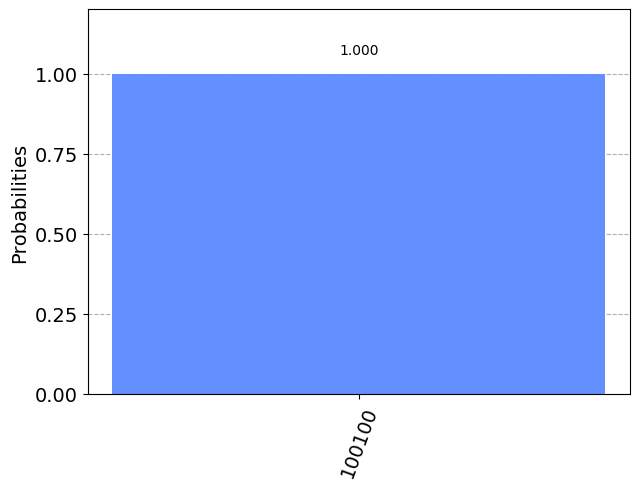

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=8192)
count = job.result().get_counts()
print(count)
plot_histogram(count)

Introduction to Quantum Error Correction using Repetition Codes

In [ ]:
p1 = 0.01
p3 = 3 * p1**2 * (1-p1) + p1**3 # probability of 2 or 3 errors
print('Probability of a single reply being garbled: {}'.format(p1))
print('Probability of a majority of the three replies being garbled: {:.4f}'.format(p3))

Probability of a single reply being garbled: 0.01
Probability of a majority of the three replies being garbled: 0.0003


In [ ]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
aer_sim = Aer.get_backend('aer_simulator')

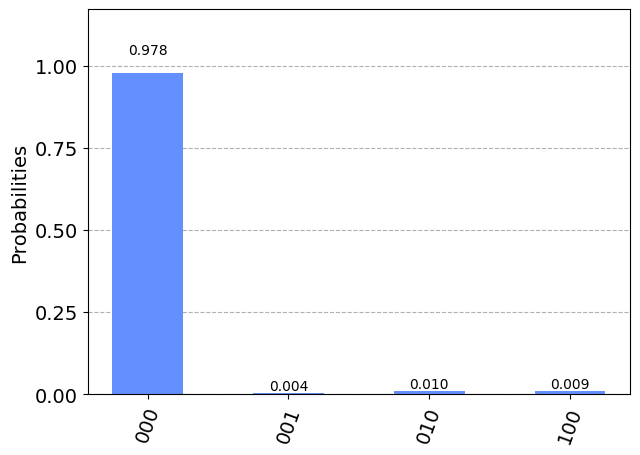

In [ ]:
def get_noise(p_meas,p_gate):
    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x"]) # single qubit gate error is applied to x gates
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # two qubit gate error is applied to cx gates
        
    return noise_model

noise_model = get_noise(0.01,0.01)
qc0 = QuantumCircuit(3) # initialize circuit with three qubits in the 0 state
qc0.measure_all() # measure the qubits

# run the circuit with the noise model and extract the counts
qobj = assemble(qc0)
counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()

plot_histogram(counts)

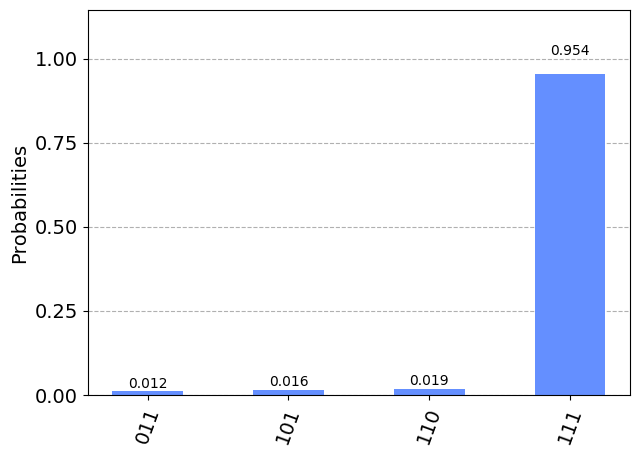

In [ ]:
qc1 = QuantumCircuit(3) # initialize circuit with three qubits in the 0 state
qc1.x([0,1,2]) # flip each 0 to 1

qc1.measure_all() # measure the qubits

# run the circuit with th noise model and extract the counts
qobj = assemble(qc1)
counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()

plot_histogram(counts)

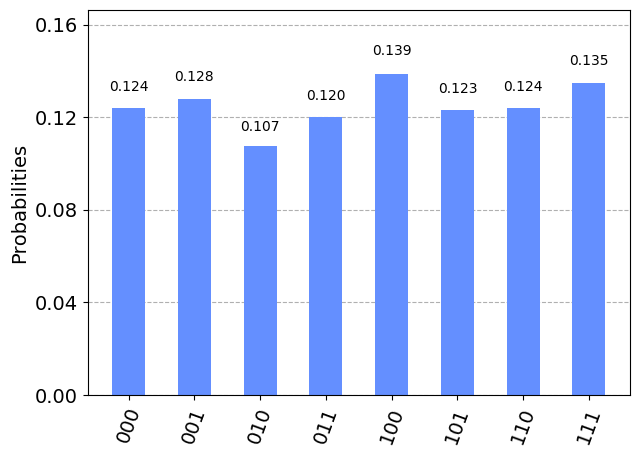

In [ ]:
noise_model = get_noise(0.5,0.0)
qobj = assemble(qc1)
counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()
plot_histogram(counts)

In [ ]:
cq = QuantumRegister(2, 'code_qubit')
lq = QuantumRegister(1, 'auxiliary_qubit')
sb = ClassicalRegister(1, 'syndrome_bit')
qc = QuantumCircuit(cq, lq, sb)
qc.cx(cq[0], lq[0])
qc.cx(cq[1], lq[0])
qc.measure(lq, sb)
qc.draw()

code_qubit_0: ──■──────────
                   │          
   code_qubit_1: ──┼────■─────
                 ┌─┴─┐┌─┴─┐┌─┐
auxiliary_qubit: ┤ X ├┤ X ├┤M├
                 └───┘└───┘└╥┘
 syndrome_bit: 1/═══════════╩═
                            0

In [ ]:
qc_init = QuantumCircuit(cq)
qc.compose(qc_init).draw()

code_qubit_0: ──■──────────
                   │          
   code_qubit_1: ──┼────■─────
                 ┌─┴─┐┌─┴─┐┌─┐
auxiliary_qubit: ┤ X ├┤ X ├┤M├
                 └───┘└───┘└╥┘
 syndrome_bit: 1/═══════════╩═
                            0

In [ ]:
qobj = assemble(qc.compose(qc_init, front=True))
counts = aer_sim.run(qobj).result().get_counts()
print('Results:',counts)

Results: {'0': 1024}


In [ ]:
qc_init = QuantumCircuit(cq)
qc_init.x(cq)
qc.compose(qc_init, front=True).draw()

┌───┐             
   code_qubit_0: ┤ X ├──■──────────
                 ├───┤  │          
   code_qubit_1: ┤ X ├──┼────■─────
                 └───┘┌─┴─┐┌─┴─┐┌─┐
auxiliary_qubit: ─────┤ X ├┤ X ├┤M├
                      └───┘└───┘└╥┘
 syndrome_bit: 1/════════════════╩═
                                 0

In [ ]:
qc_init = QuantumCircuit(cq)
qc_init.h(cq[0])
qc_init.cx(cq[0], cq[1])
qc.compose(qc_init, front=True).draw()

┌───┐                  
   code_qubit_0: ┤ H ├──■────■──────────
                 └───┘┌─┴─┐  │          
   code_qubit_1: ─────┤ X ├──┼────■─────
                      └───┘┌─┴─┐┌─┴─┐┌─┐
auxiliary_qubit: ──────────┤ X ├┤ X ├┤M├
                           └───┘└───┘└╥┘
 syndrome_bit: 1/═════════════════════╩═
                                      0

In [ ]:
qobj = assemble(qc.compose(qc_init, front=True))
counts = aer_sim.run(qobj).result().get_counts()
print('Results:',counts)

Results: {'0': 1024}


In [ ]:
qc_init = QuantumCircuit(cq)
qc_init.h(cq[0])
qc_init.cx(cq[0], cq[1])
qc_init.x(cq[0])
qc.compose(qc_init, front=True).draw()

┌───┐     ┌───┐             
   code_qubit_0: ┤ H ├──■──┤ X ├──■──────────
                 └───┘┌─┴─┐└───┘  │          
   code_qubit_1: ─────┤ X ├───────┼────■─────
                      └───┘     ┌─┴─┐┌─┴─┐┌─┐
auxiliary_qubit: ───────────────┤ X ├┤ X ├┤M├
                                └───┘└───┘└╥┘
 syndrome_bit: 1/══════════════════════════╩═
                                           0

In [ ]:
qobj = assemble(qc.compose(qc_init, front=True))
counts = aer_sim.run(qobj).result().get_counts()
print('Results:',counts)

Results: {'1': 1024}


In [ ]:
from qiskit.ignis.verification.topological_codes import RepetitionCode
from qiskit.ignis.verification.topological_codes import lookuptable_decoding
from qiskit.ignis.verification.topological_codes import GraphDecoder

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  """Entry point for launching an IPython kernel.


In [ ]:
n = 3
T = 1
code = RepetitionCode(n, T)
code.circuit['0'].draw()

┌───┐     ┌───┐        ┌─┐         
      link_qubit_0: ┤ X ├─────┤ X ├────────┤M├─────────
                    └─┬─┘┌───┐└─┬─┘┌───┐   └╥┘┌─┐      
      link_qubit_1: ──┼──┤ X ├──┼──┤ X ├────╫─┤M├──────
                      │  └─┬─┘  │  └─┬─┘┌─┐ ║ └╥┘      
      code_qubit_0: ──■────┼────┼────┼──┤M├─╫──╫───────
                           │    │    │  └╥┘ ║  ║ ┌─┐   
      code_qubit_1: ───────■────■────┼───╫──╫──╫─┤M├───
                                     │   ║  ║  ║ └╥┘┌─┐
      code_qubit_2: ─────────────────■───╫──╫──╫──╫─┤M├
                                         ║  ║  ║  ║ └╥┘
round_0_link_bit: 2/═════════════════════╬══╩══╩══╬══╬═
                                         ║  0  1  ║  ║ 
                                         ║        ║  ║ 
        code_bit: 3/═════════════════════╩════════╩══╩═
                                         0        1  2

In [ ]:
code.circuit['1'].draw()

┌───┐     ┌───┐        ┌─┐         
      link_qubit_0: ─────┤ X ├─────┤ X ├────────┤M├─────────
                         └─┬─┘┌───┐└─┬─┘┌───┐   └╥┘┌─┐      
      link_qubit_1: ───────┼──┤ X ├──┼──┤ X ├────╫─┤M├──────
                    ┌───┐  │  └─┬─┘  │  └─┬─┘┌─┐ ║ └╥┘      
      code_qubit_0: ┤ X ├──■────┼────┼────┼──┤M├─╫──╫───────
                    ├───┤       │    │    │  └╥┘ ║  ║ ┌─┐   
      code_qubit_1: ┤ X ├───────■────■────┼───╫──╫──╫─┤M├───
                    ├───┤                 │   ║  ║  ║ └╥┘┌─┐
      code_qubit_2: ┤ X ├─────────────────■───╫──╫──╫──╫─┤M├
                    └───┘                     ║  ║  ║  ║ └╥┘
round_0_link_bit: 2/══════════════════════════╬══╩══╩══╬══╬═
                                              ║  0  1  ║  ║ 
                                              ║        ║  ║ 
        code_bit: 3/══════════════════════════╩════════╩══╩═
                                              0        1  2

In [ ]:
def get_raw_results(code,noise_model=None):
    circuits = code.get_circuit_list()
    raw_results = {}
    for log in range(2):
        qobj = assemble(circuits[log])
        job = aer_sim.run(qobj, noise_model=noise_model)
        raw_results[str(log)] = job.result().get_counts(str(log))
    return raw_results

raw_results = get_raw_results(code)
for log in raw_results:
    print('Logical', log, ':', raw_results[log], '\n')

Logical 0 : {'000 00': 1024} 

Logical 1 : {'111 00': 1024} 



In [ ]:
code = RepetitionCode(n,4)

raw_results = get_raw_results(code)
for log in raw_results:
    print('Logical', log,':', raw_results[log],'\n')

Logical 0 : {'000 00 00 00 00': 1024} 

Logical 1 : {'111 00 00 00 00': 1024} 



In [ ]:
code = RepetitionCode(5,4)

raw_results = get_raw_results(code)
for log in raw_results:
    print('Logical', log,':', raw_results[log],'\n')

Logical 0 : {'00000 0000 0000 0000 0000': 1024} 

Logical 1 : {'11111 0000 0000 0000 0000': 1024} 



In [ ]:
code = RepetitionCode(3,1)

noise_model = get_noise(0.05,0.05)

raw_results = get_raw_results(code,noise_model)
for log in raw_results:
    print('Logical', log,':', raw_results[log],'\n')

Logical 0 : {'001 10': 3, '100 11': 2, '000 10': 80, '100 00': 54, '101 00': 4, '010 11': 7, '000 00': 656, '001 00': 44, '000 11': 7, '010 00': 50, '100 10': 3, '011 01': 1, '000 01': 64, '011 00': 8, '010 01': 24, '001 01': 6, '010 10': 6, '100 01': 3, '110 00': 2} 

Logical 1 : {'100 11': 1, '001 11': 2, '001 10': 2, '110 10': 5, '110 11': 1, '011 11': 6, '010 00': 4, '001 00': 6, '110 01': 19, '111 10': 73, '111 00': 592, '100 00': 4, '101 01': 31, '001 01': 6, '010 01': 2, '011 00': 51, '011 10': 27, '010 10': 2, '100 01': 3, '101 00': 45, '111 01': 69, '110 00': 39, '101 11': 11, '101 10': 9, '111 11': 10, '011 01': 4} 



In [ ]:
circuits = code.get_circuit_list()
table_results = {}
for log in range(2):
    qobj = assemble(circuits[log], shots=10000)
    job = aer_sim.run(qobj, noise_model=noise_model)
    table_results[str(log)] = job.result().get_counts(str(log))

P = lookuptable_decoding(table_results,raw_results)
print('P =',P)

P = {'0': 0.0166015625, '1': 0.0283203125}


In [ ]:
code = RepetitionCode(3,2)

raw_results = get_raw_results(code,noise_model)

results = code.process_results( raw_results )

for log in ['0','1']:
    print('\nLogical ' + log + ':')
    print('raw results       ', {string:raw_results[log][string] for string in raw_results[log] if raw_results[log][string]>=50 })
    print('processed results ', {string:results[log][string] for string in results[log] if results[log][string]>=50 })


Logical 0:
raw results        {'000 10 10': 54, '000 01 00': 54, '000 00 00': 503}
processed results  {'0 0  10 10 00': 54, '0 0  00 01 01': 54, '0 0  00 00 00': 503}

Logical 1:
raw results        {'111 10 00': 55, '111 00 00': 463}
processed results  {'1 1  00 10 10': 55, '1 1  00 00 00': 463}


In [ ]:
step_2 = False
step_3 = False

In [ ]:
from qiskit import IBMQ
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager
from qiskit.tools import job_monitor

In [ ]:
device_name = 'ibmq_16_melbourne'

if step_2 or step_3:
    
    IBMQ.load_account()
    
    for provider in IBMQ.providers():
        for potential_backend in provider.backends():
            if potential_backend.name()==device_name:
                backend = potential_backend

    coupling_map = backend.configuration().coupling_map

if device_name=='ibmq_16_melbourne':
    line = [13,14,0,1,2,12,11,3,4,10,9,5,6,8,7]
elif device_name=='ibmq_rochester':
    line = [10,11,17,23,22,21,20,19,16,7,8,9,5]#,0,1,2,3,4,6,13,14,15,18,27,26,25,29,36,37,38,41,50,49,48,47,46,45,44,43,42,39,30,31]

n_min = 3
n_max = int((len(line)+1)/2)

code = {}

for n in range(n_min,n_max+1):
    code[n] = RepetitionCode(n,1)

def get_initial_layout(code,line,n):
    initial_layout = {}
    for j in range(n):
        initial_layout[code.code_qubit[j]] = line[2*j]
    for j in range(n-1):
        initial_layout[code.link_qubit[j]] = line[2*j+1]
    return initial_layout

if step_2:
    circuits = []
    for n in range(n_min,n_max+1):
        initial_layout = get_initial_layout(code[n],line,n)
        for log in ['0','1']:
            circuits.append( transpile(code[n].circuit[log], backend=backend, initial_layout=initial_layout) )
            num_cx = dict(circuits[-1].count_ops())['cx']
            assert num_cx==2*(n-1), str(num_cx) + ' instead of ' + str(2*(n-1)) + ' cx gates for n = ' + str(n)

if step_2:
    # run all the circuits
    job = backend.run(circuits, shots=8192)
    job_monitor(job)

    # organize the results of the run
    raw_results = {}
    j = 0
    for d in range(n_min,n_max+1):
        raw_results[d] = {}
        for log in ['0','1']:
            raw_results[d][log] = job.result().get_counts(j)
            j += 1

if step_2: # save results
    with open('results/raw_results_'+device_name+'.txt', 'w') as file:
        file.write(str(raw_results))
elif step_3: # read results
    with open('results/raw_results_'+device_name+'.txt', 'r') as file:
        raw_results = eval(file.read())

if step_3:
    results = {}
    for n in range(n_min,n_max+1):
        results[n] = code[n].process_results( raw_results[n] )

if step_3:
    dec = {}
    for n in range(n_min,n_max+1):
        dec[n] = GraphDecoder(code[n])

if step_3:
    logical_prob_match = {}
    for n in range(n_min,n_max+1):
        logical_prob_match[n] = dec[n].get_logical_prob(results[n])
        
    with open('results/logical_prob_match_'+device_name+'.txt', 'w') as file:
        file.write(str(logical_prob_match))
        
else:
    with open('results/logical_prob_match_'+device_name+'.txt', 'r') as file:
        logical_prob_match = eval(file.read())

import matplotlib.pyplot as plt
import numpy as np

x_axis = range(n_min,n_max+1)
P = { log: [logical_prob_match[n][log] for n in x_axis] for log in ['0', '1'] }

ax = plt.gca()
plt.xlabel('Code distance, n')
plt.ylabel('ln(Logical error probability)')
ax.scatter( x_axis, P['0'], label="logical 0")
ax.scatter( x_axis, P['1'], label="logical 1")
ax.set_yscale('log')
ax.set_ylim(ymax=1.5*max(P['0']+P['1']),ymin=0.75*min(P['0']+P['1']))
plt.legend()
plt.show()

FileNotFoundError: ignored

In [ ]:
if step_3:

    dec[n_max].weight_syndrome_graph(results=results[n_max])

    probs = []
    for edge in dec[n_max].S.edges:
        ratio = np.exp(-dec[n_max].S.get_edge_data(edge[0],edge[1])['distance'])
        probs.append( ratio/(1+ratio) )
        
    with open('results/probs_'+device_name+'.txt', 'w') as file:
        file.write(str(probs))
        
else:
    
    with open('results/probs_'+device_name+'.txt', 'r') as file:
        probs = eval(file.read())

FileNotFoundError: ignored

In [ ]:
import pandas as pd
pd.Series(probs).describe()

NameError: ignored

Measurement Error Mitigation

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, transpile, assemble
from qiskit.visualization import array_to_latex
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error

def get_noise(p):

    error_meas = pauli_error([('X',p), ('I', 1 - p)])

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
        
    return noise_model

noise_model = get_noise(0.01)

aer_sim = Aer.get_backend('aer_simulator')
for state in ['00','01','10','11']:
    qc = QuantumCircuit(2,2)
    if state[0]=='1':
        qc.x(1)
    if state[1]=='1':
        qc.x(0)  
    qc.measure([0, 1], [0, 1])
    t_qc = transpile(qc, aer_sim)
    qobj = assemble(t_qc)
    counts = aer_sim.run(qobj, noise_model=noise_model, shots=10000).result().get_counts()
    print(state+' becomes', counts)

00 becomes {'10': 99, '00': 9810, '01': 91}
01 becomes {'10': 1, '00': 93, '01': 9817, '11': 89}
10 becomes {'01': 1, '11': 94, '10': 9813, '00': 92}
11 becomes {'01': 92, '11': 9802, '00': 1, '10': 105}


In [ ]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)  
qc.measure([0, 1], [0, 1])
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc)
counts = aer_sim.run(qobj, noise_model=noise_model, shots=10000).result().get_counts()
print(counts)

{'01': 88, '10': 114, '00': 4885, '11': 4913}


In [ ]:
import numpy as np

M = [[0.9808,0.0107,0.0095,0.0001],
    [0.0095,0.9788,0.0001,0.0107],
    [0.0096,0.0002,0.9814,0.0087],
    [0.0001,0.0103,0.0090,0.9805]]

Cideal = [[5000],
          [0],
          [0],
          [5000]]

Cnoisy = np.dot(M, Cideal)
array_to_latex(Cnoisy, prefix="\\text{C}_\\text{noisy} = ")

<IPython.core.display.Latex object>

In [ ]:
import scipy.linalg as la

M = [[0.9808,0.0107,0.0095,0.0001],
    [0.0095,0.9788,0.0001,0.0107],
    [0.0096,0.0002,0.9814,0.0087],
    [0.0001,0.0103,0.0090,0.9805]]

Minv = la.inv(M)

array_to_latex(Minv)

<IPython.core.display.Latex object>

In [ ]:
Cmitigated = np.dot(Minv, Cnoisy)
array_to_latex(Cmitigated, prefix="\\text{C}_\\text{mitigated}=")

<IPython.core.display.Latex object>

In [ ]:
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
qr = QuantumRegister(2)
meas_calibs, state_labels = complete_meas_cal(qr=qr, circlabel='mcal')
for circuit in meas_calibs:
    print('Circuit',circuit.name)
    print(circuit)
    print()

Circuit mcalcal_00
         ░ ┌─┐   
q200_0: ─░─┤M├───
         ░ └╥┘┌─┐
q200_1: ─░──╫─┤M├
         ░  ║ └╥┘
  c0: 2/════╩══╩═
            0  1 

Circuit mcalcal_01
        ┌───┐ ░ ┌─┐   
q200_0: ┤ X ├─░─┤M├───
        └───┘ ░ └╥┘┌─┐
q200_1: ──────░──╫─┤M├
              ░  ║ └╥┘
  c0: 2/═════════╩══╩═
                 0  1 

Circuit mcalcal_10
              ░ ┌─┐   
q200_0: ──────░─┤M├───
        ┌───┐ ░ └╥┘┌─┐
q200_1: ┤ X ├─░──╫─┤M├
        └───┘ ░  ║ └╥┘
  c0: 2/═════════╩══╩═
                 0  1 

Circuit mcalcal_11
        ┌───┐ ░ ┌─┐   
q200_0: ┤ X ├─░─┤M├───
        ├───┤ ░ └╥┘┌─┐
q200_1: ┤ X ├─░──╫─┤M├
        └───┘ ░  ║ └╥┘
  c0: 2/═════════╩══╩═
                 0  1 



In [ ]:
# Execute the calibration circuits without noise
t_qc = transpile(meas_calibs, aer_sim)
qobj = assemble(t_qc, shots=10000)
cal_results = aer_sim.run(qobj, shots=10000).result()
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
array_to_latex(meas_fitter.cal_matrix)

<IPython.core.display.Latex object>

In [ ]:
noise_model = get_noise(0.1)
t_qc = transpile(meas_calibs, aer_sim)
qobj = assemble(t_qc, shots=10000)
cal_results = aer_sim.run(qobj, noise_model=noise_model, shots=10000).result()

meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
array_to_latex(meas_fitter.cal_matrix)

<IPython.core.display.Latex object>

In [ ]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)  
qc.measure([0, 1], [0, 1])

t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc, shots=10000)
results = aer_sim.run(qobj, noise_model=noise_model, shots=10000).result()
noisy_counts = results.get_counts()
print(noisy_counts)

{'11': 4167, '10': 929, '00': 4008, '01': 896}


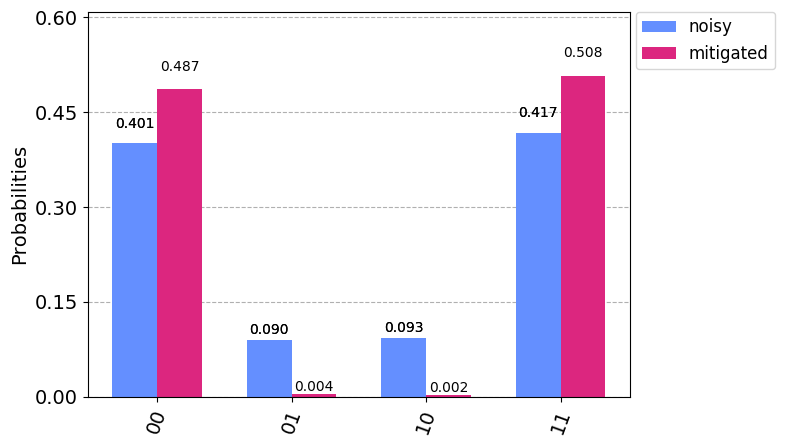

In [ ]:
# Get the filter object
meas_filter = meas_fitter.filter

# Results with mitigation
mitigated_results = meas_filter.apply(results)
mitigated_counts = mitigated_results.get_counts()

from qiskit.visualization import plot_histogram 
noisy_counts = results.get_counts()
plot_histogram([noisy_counts, mitigated_counts], legend=['noisy', 'mitigated'])

Randomized Benchmarking

In [ ]:
# Import general libraries (needed for functions)
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Import the RB Functions
import qiskit.ignis.verification.randomized_benchmarking as rb

# Import Qiskit classes 
import qiskit
from qiskit import assemble, transpile
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error

In [ ]:
# Generate RB circuits (2Q RB)

# number of qubits
nQ = 2 
rb_opts = {}
#Number of Cliffords in the sequence
rb_opts['length_vector'] = [1, 10, 20, 50, 75, 100, 125, 150, 175, 200]
# Number of seeds (random sequences)
rb_opts['nseeds'] = 5
# Default pattern
rb_opts['rb_pattern'] = [[0, 1]]

rb_circs, xdata = rb.randomized_benchmarking_seq(**rb_opts)
rb_circs[0][0].draw(fold=-1)

┌───┐                  ┌───┐ ┌───┐ ░ ┌─────┐┌───┐     ┌───┐     ┌─┐        
qr_0: ┤ X ├──────────────■───┤ H ├─┤ S ├─░─┤ Sdg ├┤ H ├──■──┤ X ├─────┤M├────────
      ├───┤┌─────┐┌───┐┌─┴─┐┌┴───┴┐├───┤ ░ └┬───┬┘├───┤┌─┴─┐├───┤┌───┐└╥┘┌───┐┌─┐
qr_1: ┤ Z ├┤ Sdg ├┤ H ├┤ X ├┤ Sdg ├┤ H ├─░──┤ H ├─┤ S ├┤ X ├┤ H ├┤ S ├─╫─┤ Z ├┤M├
      └───┘└─────┘└───┘└───┘└─────┘└───┘ ░  └───┘ └───┘└───┘└───┘└───┘ ║ └───┘└╥┘
cr: 2/═════════════════════════════════════════════════════════════════╩═══════╩═
                                                                       0       1

In [ ]:
# Create a new circuit without the measurement
qregs = rb_circs[0][-1].qregs
cregs = rb_circs[0][-1].cregs
qc = qiskit.QuantumCircuit(*qregs, *cregs)
for i in rb_circs[0][-1][0:-nQ]:
    qc.data.append(i)

# The Unitary is an identity (with a global phase)
sim = qiskit.Aer.get_backend('aer_simulator')
basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
qc.save_unitary()
unitary = sim.run(qc).result().get_unitary()
from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Unitary} = ")

<IPython.core.display.Latex object>

In [ ]:
# Run on a noisy simulator
noise_model = NoiseModel()

# Depolarizing error on the gates u2, u3 and cx (assuming the u1 is virtual-Z gate and no error)
p1Q = 0.002
p2Q = 0.01

noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Q, 1), 'u2')
noise_model.add_all_qubit_quantum_error(depolarizing_error(2 * p1Q, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2Q, 2), 'cx')

backend = qiskit.Aer.get_backend('aer_simulator')

In [ ]:
# Create the RB fitter
backend = qiskit.Aer.get_backend('aer_simulator')
basis_gates = ['u1','u2','u3','cx'] 
shots = 200
transpiled_circs_list = []
rb_fit = rb.RBFitter(None, xdata, rb_opts['rb_pattern'])
for rb_seed, rb_circ_seed in enumerate(rb_circs):
    print(f'Compiling seed {rb_seed}')
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    transpiled_circs_list.append(new_rb_circ_seed)
    print(f'Simulating seed {rb_seed}')
    qobj = assemble(new_rb_circ_seed, shots=shots)
    job = backend.run(qobj,
                      noise_model=noise_model,
                      max_parallel_experiments=0)
    # Add data to the fitter
    rb_fit.add_data(job.result())
    print('After seed %d, alpha: %f, EPC: %f'%(rb_seed,rb_fit.fit[0]['params'][1], rb_fit.fit[0]['epc']))

Compiling seed 0
Simulating seed 0
After seed 0, alpha: 0.980301, EPC: 0.014774
Compiling seed 1
Simulating seed 1
After seed 1, alpha: 0.980770, EPC: 0.014423
Compiling seed 2
Simulating seed 2
After seed 2, alpha: 0.981584, EPC: 0.013812
Compiling seed 3
Simulating seed 3
After seed 3, alpha: 0.979438, EPC: 0.015422
Compiling seed 4
Simulating seed 4
After seed 4, alpha: 0.980222, EPC: 0.014833


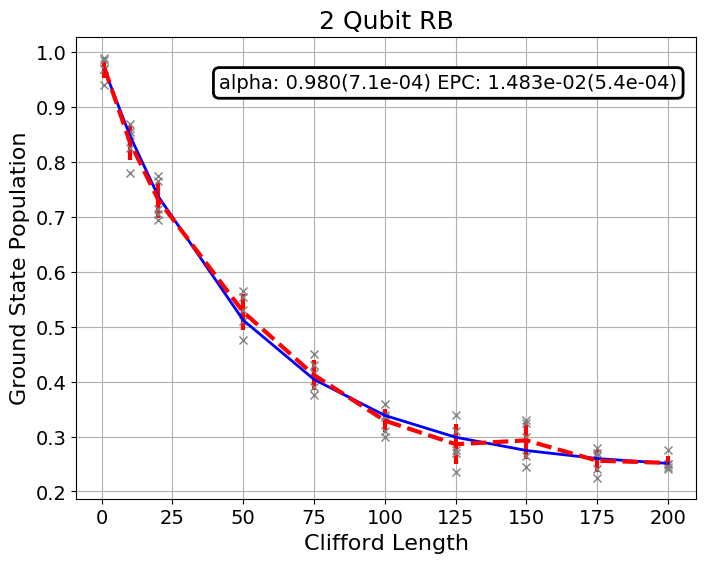

In [ ]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 1, 1)

# Plot the essence by calling plot_rb_data
rb_fit.plot_rb_data(0, ax=ax, add_label=True, show_plt=False)
    
# Add title and label
ax.set_title('%d Qubit RB'%(nQ), fontsize=18)

plt.show()

In [ ]:
# count the number of single and 2Q gates in the 2Q Cliffords
qubits = rb_opts['rb_pattern'][0]

gate_per_cliff = rb.rb_utils.gates_per_clifford(
    transpiled_circuits_list=transpiled_circs_list,
    clifford_lengths=xdata[0],
    basis=basis_gates,
    qubits=qubits)

for basis_gate in basis_gates:
    print("Number of %s gates per Clifford: %f"%(
        basis_gate,
        np.mean([gate_per_cliff[qubit][basis_gate] for qubit in qubits])))

Number of u1 gates per Clifford: 0.124127
Number of u2 gates per Clifford: 1.689301
Number of u3 gates per Clifford: 0.157205
Number of cx gates per Clifford: 1.485371


In [ ]:
# convert from depolarizing error to epg (1Q)
epg_q0 = {'u1': 0, 'u2': p1Q/2, 'u3': 2 * p1Q/2}
epg_q1 = {'u1': 0, 'u2': p1Q/2, 'u3': 2 * p1Q/2}

# convert from depolarizing error to epg (2Q)
epg_q01 = 3/4 * p2Q

# calculate the predicted epc from underlying gate errors 
pred_epc = rb.rb_utils.calculate_2q_epc(
    gate_per_cliff=gate_per_cliff,
    epg_2q=epg_q01,
    qubit_pair=qubits,
    list_epgs_1q=[epg_q0, epg_q1])

print("Predicted 2Q Error per Clifford: %e (aer simulator result: %e)" % (pred_epc, rb_fit.fit[0]['epc']))

Predicted 2Q Error per Clifford: 1.583973e-02 (aer simulator result: 1.483330e-02)


In [ ]:
# use 2Q EPC from aer simulator result and 1Q EPGs from depolarizing error model
pred_epg = rb.rb_utils.calculate_2q_epg(
    gate_per_cliff=gate_per_cliff,
    epc_2q=rb_fit.fit[0]['epc'],
    qubit_pair=qubits,
    list_epgs_1q=[epg_q0, epg_q1])

print("Predicted 2Q Error per gate: %e (gate error model: %e)" % (pred_epg, epg_q01))

Predicted 2Q Error per gate: 6.799842e-03 (gate error model: 7.500000e-03)


Measuring Quantum Volume

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

#Import Qiskit classes
import qiskit
from qiskit import assemble, transpile
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error

#Import the qv function
import qiskit.ignis.verification.quantum_volume as qv

In [ ]:
# qubit_lists: list of list of qubit subsets to generate QV circuits
qubit_lists = [[0,1,3],[0,1,3,5],[0,1,3,5,7],[0,1,3,5,7,10]]
# ntrials: Number of random circuits to create for each subset
ntrials = 100

import warnings
warnings.filterwarnings('ignore')
qv_circs, qv_circs_nomeas = qv.qv_circuits(qubit_lists, ntrials)

# pass the first trial of the nomeas through the transpiler to illustrate the circuit
qv_circs_nomeas[0] = qiskit.compiler.transpile(qv_circs_nomeas[0], basis_gates=['u1','u2','u3','cx'])
qv_circs_nomeas[0][0].draw(fold=-1)

global phase: 6.1364
      ┌────────────────────────────┐                                                                                                                                                                                                                  ┌──────────────────────┐         ┌────────────────────┐      ┌────────────────────────────┐
q_0: ─┤ U3(2.5539,-2.6447,-1.4389) ├───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────■──────┤ U3(0.54708,-π/2,π/2) ├─────■───┤ U3(0.21592,0,-π/2) ├───■──┤ U3(1.4761,-0.73212,1.3698) ├
     ┌┴────────────────────────────┤┌───┐┌──────────────────────────────┐┌───┐┌──────────────────────┐┌───┐┌───────────────────────────┐          ┌──────────────────────┐        ┌─────────────────────┐      ┌───────────────────────────┐   │      └──────────────────────┘     │   └────────────────────┘   │  └────────────────────────────┘
q_1: ┤ U3(0.30841,-3.1167,-1.6009) ├┤ X ├┤ U3(0.038875,-1.6049,-3.1076) ├┤ X ├┤ U3(1.5695,1.5695,-π) ├┤ X ├┤ U3(0.1973,1.5834,-1.6911) ├───■──────┤ U3(0.83516,-π/2,π/2) ├─────■──┤ U3(0.070514,-π,π/2) ├───■──┤ U3(1.5684,2.446,-0.96463) ├───┼───────────────────────────────────┼────────────────────────────┼────────────────────────────────
     └┬───────────────────────────┬┘└─┬─┘└───┬─────────────────────┬────┘└─┬─┘└┬───────────────────┬─┘└─┬─┘├───────────────────────────┴┐┌─┴─┐┌───┴──────────────────────┴──┐┌─┴─┐├─────────────────────┴┐┌─┴─┐├───────────────────────────┴┐┌─┴─┐┌─────────────────────────────┐┌─┴─┐┌──────────────────────┐┌─┴─┐┌───────────────────────────┐ 
q_2: ─┤ U3(0.77224,1.6936,1.2226) ├───■──────┤ U3(1.1504,-π/2,π/2) ├───────■───┤ U3(0.2374,0,-π/2) ├────■──┤ U3(0.95084,-1.4416,1.0404) ├┤ X ├┤ U3(0.20336,-1.5773,-3.1352) ├┤ X ├┤ U3(1.5695,1.5695,-π) ├┤ X ├┤ U3(1.9986,-1.2719,-1.0775) ├┤ X ├┤ U3(0.15785,-1.5792,-3.1333) ├┤ X ├┤ U3(1.5695,1.5695,-π) ├┤ X ├┤ U3(2.9305,-3.0908,1.8221) ├─
      └───────────────────────────┘          └─────────────────────┘           └───────────────────┘       └────────────────────────────┘└───┘└─────────────────────────────┘└───┘└──────────────────────┘└───┘└────────────────────────────┘└───┘└─────────────────────────────┘└───┘└──────────────────────┘└───┘└───────────────────────────┘

In [ ]:
sv_sim = qiskit.Aer.get_backend('aer_simulator')
ideal_results = []
for trial in range(ntrials):
    clear_output(wait=True)
    for qc in qv_circs_nomeas[trial]:
        qc.save_statevector()
    result = qiskit.execute(qv_circs_nomeas[trial], backend=sv_sim).result()
    ideal_results.append(result)
    print(f'Simulated trial {trial+1}/{ntrials}')

qv_fitter = qv.QVFitter(qubit_lists=qubit_lists)
qv_fitter.add_statevectors(ideal_results)

Simulated trial 100/100


In [ ]:
for qubit_list in qubit_lists:
    l = len(qubit_list)
    print ('qv_depth_'+str(l)+'_trial_0:', qv_fitter._heavy_outputs['qv_depth_'+str(l)+'_trial_0'])

qv_depth_3_trial_0: ['000', '001', '101', '111']
qv_depth_4_trial_0: ['0010', '0101', '1001', '1010', '1011', '1100', '1101', '1110']
qv_depth_5_trial_0: ['00100', '00110', '01000', '01001', '01011', '01100', '01101', '01111', '10000', '10001', '10010', '10011', '11001', '11011', '11110', '11111']
qv_depth_6_trial_0: ['000000', '000010', '000101', '001000', '001001', '001010', '001101', '010001', '010100', '011010', '011011', '011110', '011111', '100000', '100010', '101000', '101001', '101010', '101100', '101101', '101110', '101111', '110000', '110001', '110010', '110101', '110111', '111000', '111100', '111101', '111110', '111111']


In [ ]:
for qubit_list in qubit_lists:
    l = len(qubit_list)
    print ('qv_depth_'+str(l)+'_trial_0:', qv_fitter._heavy_output_prob_ideal['qv_depth_'+str(l)+'_trial_0'])

qv_depth_3_trial_0: 0.687985802149258
qv_depth_4_trial_0: 0.8479561538041671
qv_depth_5_trial_0: 0.865761200956506
qv_depth_6_trial_0: 0.8404015940120756


In [ ]:
noise_model = NoiseModel()
p1Q = 0.002
p2Q = 0.02
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Q, 1), 'u2')
noise_model.add_all_qubit_quantum_error(depolarizing_error(2*p1Q, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2Q, 2), 'cx')

aer_sim = qiskit.Aer.get_backend('aer_simulator')
basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 1024
exp_results = []
for trial in range(ntrials):
    clear_output(wait=True)
    t_qcs = transpile(qv_circs[trial], basis_gates=basis_gates, optimization_level=3)
    qobj = assemble(t_qcs)
    result = aer_sim.run(qobj, noise_model=noise_model, max_parallel_experiments=0).result()
    exp_results.append(result)
    print(f'Completed trial {trial+1}/{ntrials}')

Completed trial 100/100


In [ ]:
qv_fitter.add_data(exp_results)
for qubit_list in qubit_lists:
    l = len(qubit_list)
    print ('qv_depth_'+str(l)+'_trial_0:', qv_fitter._heavy_output_counts['qv_depth_'+str(l)+'_trial_0'])

qv_depth_3_trial_0: 697
qv_depth_4_trial_0: 772
qv_depth_5_trial_0: 742
qv_depth_6_trial_0: 631


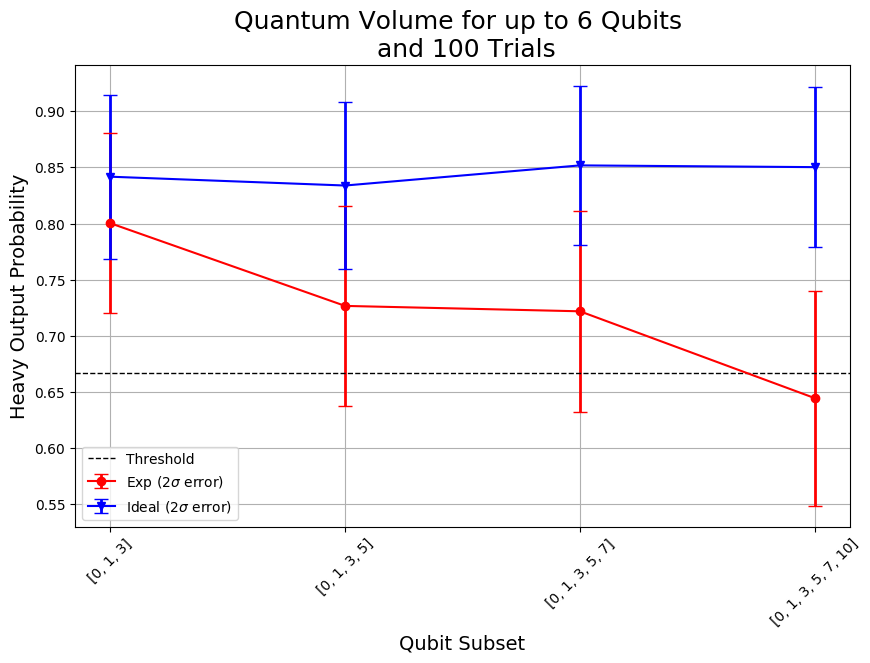

In [ ]:
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot the essence by calling plot_rb_data
qv_fitter.plot_qv_data(ax=ax, show_plt=False)

# Add title and label
ax.set_title('Quantum Volume for up to %d Qubits \n and %d Trials'%(len(qubit_lists[-1]), ntrials), fontsize=18)

plt.show()

In [ ]:
qv_success_list = qv_fitter.qv_success()
qv_list = qv_fitter.ydata
QV = 1
for qidx, qubit_list in enumerate(qubit_lists):
    if qv_list[0][qidx]>2/3:
        if qv_success_list[qidx][0]:
            print("Width/depth %d greater than 2/3 (%f) with confidence %f (successful). Quantum volume %d"%
                  (len(qubit_list),qv_list[0][qidx],qv_success_list[qidx][1],qv_fitter.quantum_volume()[qidx]))
            QV = qv_fitter.quantum_volume()[qidx]
        else:
            print("Width/depth %d greater than 2/3 (%f) with confidence %f (unsuccessful)."%
                  (len(qubit_list),qv_list[0][qidx],qv_success_list[qidx][1]))
    else:
        print("Width/depth %d less than 2/3 (unsuccessful)."%len(qubit_list))

Width/depth 3 greater than 2/3 (0.800361) with confidence 0.999588 (successful). Quantum volume 8
Width/depth 4 greater than 2/3 (0.726689) with confidence 0.910983 (unsuccessful).
Width/depth 5 greater than 2/3 (0.721885) with confidence 0.891091 (unsuccessful).
Width/depth 6 less than 2/3 (unsuccessful).


In [ ]:
print ("The Quantum Volume is:", QV) 

The Quantum Volume is: 8


The Density Matrix & Mixed States

In [ ]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi

In [ ]:
qc_AB = QuantumCircuit(2)
qc_AB.h(0)
qc_AB.cx(0,1)
qc_AB.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [ ]:
psi_AB = qi.Statevector.from_instruction(qc_AB)
print(psi_AB)
#psi_AB.draw('latex', prefix='|\\psi_{AB}\\rangle = ')

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [ ]:
rho_AB = qi.DensityMatrix.from_instruction(qc_AB)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')

<IPython.core.display.Latex object>

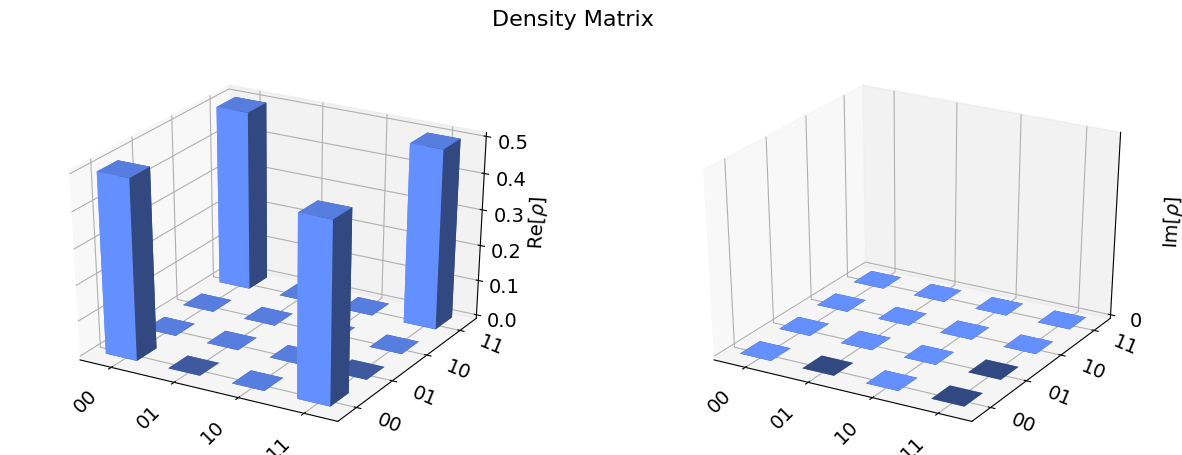

In [ ]:
from qiskit.visualization import plot_state_city
plot_state_city(rho_AB.data, title='Density Matrix')

In [ ]:
import numpy as np
rho_H_matrix = np.array([[1/2,np.sqrt(3)/20 + 2/5],[np.sqrt(3)/20 + 2/5,1/2]])
rho_H = qi.DensityMatrix(rho_H_matrix)
rho_H.draw('latex', prefix='\\rho_H = ')

In [ ]:
rho_0 = 1/3*qi.DensityMatrix.from_label('1') + 2/3*qi.DensityMatrix.from_label('+')
rho_0.draw('latex', prefix='\\rho_0 = ')

<IPython.core.display.Latex object>

In [ ]:
from qiskit.visualization import array_to_latex
Y = qi.Operator.from_label('Y')
array_to_latex(Y.data, prefix='Y =')

<IPython.core.display.Latex object>

In [ ]:
rho_0p = rho_0.evolve(Y)
rho_0p.draw('latex', prefix='\\rho\'_0 = ')

<IPython.core.display.Latex object>

In [ ]:
rho_p = qi.DensityMatrix.from_label('+')
print(rho_p)
#display(rho_p.draw('latex', prefix='\\rho_p = '))
gamma_p = rho_p.purity()
print("State purity: ", np.round(np.real(gamma_p),3))

DensityMatrix([[0.5+0.j, 0.5+0.j],
               [0.5+0.j, 0.5+0.j]],
              dims=(2,))
State purity:  1.0


In [ ]:
rho_m = 1/2*(qi.DensityMatrix.from_label('0') + qi.DensityMatrix.from_label('1'))
print(rho_m)
#display(rho_m.draw('latex', prefix='\\rho_m = '))
gamma_m = rho_m.purity()
print("State purity: ", np.round(np.real(gamma_m),3))

DensityMatrix([[0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j]],
              dims=(2,))
State purity:  0.5


In [ ]:
rho_B = qi.partial_trace(rho_AB,[0])
rho_A = qi.partial_trace(rho_AB,[1])

print(rho_B)
print(rho_A)
#display(rho_B.draw('latex', prefix=" \\rho_{B} = "),
        #rho_A.draw('latex', prefix=" \\rho_{A} = "))

DensityMatrix([[0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j]],
              dims=(2,))
DensityMatrix([[0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j]],
              dims=(2,))


In [ ]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(rho_H.data)

In [ ]:
qc_CD = QuantumCircuit(2)
qc_CD.ry(np.pi/3,0)
qc_CD.h(1)
qc_CD.cx(0,1)
qc_CD.cx(1,0)
qc_CD.draw()

┌─────────┐     ┌───┐
q_0: ┤ Ry(π/3) ├──■──┤ X ├
     └──┬───┬──┘┌─┴─┐└─┬─┘
q_1: ───┤ H ├───┤ X ├──■──
        └───┘   └───┘

In [ ]:
psi_CD = qi.Statevector.from_instruction(qc_CD)
print(psi_CD)
#psi_CD.draw('latex', prefix='|\\psi_{CD}\\rangle =')

Statevector([0.61237244+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.61237244+0.j],
            dims=(2, 2))


In [ ]:
rho_CD = qi.DensityMatrix.from_instruction(qc_CD)
rho_CD.draw('latex', prefix='\\rho_{CD} =')

<IPython.core.display.Latex object>

In [ ]:
rho_D = qi.partial_trace(rho_CD,[0])
rho_C = qi.partial_trace(rho_CD,[1])
print(rho_D)
print(rho_C)
#display(rho_D.draw('latex', prefix=" \\rho_{D} = "),
        #rho_C.draw('latex', prefix=" \\rho_{C} = "))

DensityMatrix([[0.5      +0.j, 0.4330127+0.j],
               [0.4330127+0.j, 0.5      +0.j]],
              dims=(2,))
DensityMatrix([[0.5      +0.j, 0.4330127+0.j],
               [0.4330127+0.j, 0.5      +0.j]],
              dims=(2,))


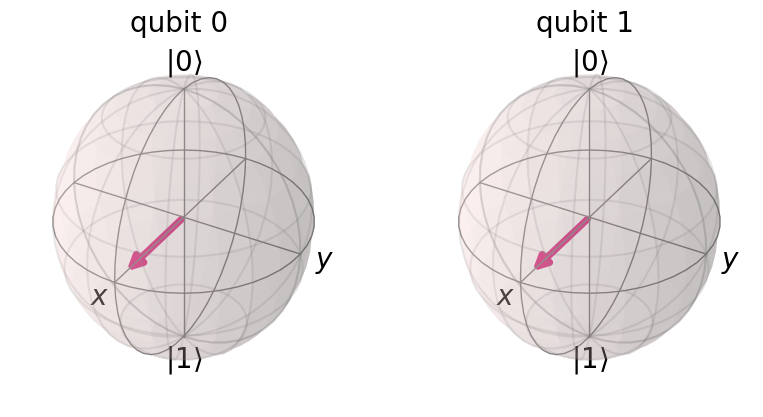

In [ ]:
plot_bloch_multivector(rho_CD.data)

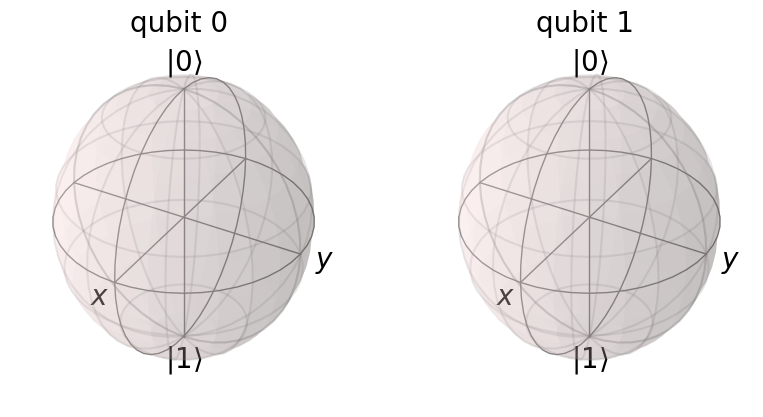

In [ ]:
plot_bloch_multivector(rho_AB.data)

Calibrating Qubits with Qiskit Pulse

In [ ]:
pip install qiskit-terra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings('ignore')
from qiskit.tools.jupyter import *
from qiskit import IBMQ
IBMQ.enable_account('99e1dd08f2c46188b04a339f1db939ca95b546d2f5ce04176d8a47effe5a12c21cf224a58afb38ee95effeeba182ac34cd14fc18f276cd5ef7948e910f68eea5')
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_manila')
backend_config = backend.configuration()
dt = backend_config.dt
print(f"Sampling time: {dt*1e9} ns")    # The configuration returns dt in seconds, so multiply by
                                        # 1e9 to get nanoseconds

Sampling time: 0.2222222222222222 ns


In [ ]:
backend.configuration().timing_constraints

{'acquire_alignment': 16,
 'granularity': 16,
 'min_length': 64,
 'pulse_alignment': 1}

In [ ]:
acquire_alignment = backend.configuration().timing_constraints['acquire_alignment']
granularity = backend.configuration().timing_constraints['granularity']
pulse_alignment = backend.configuration().timing_constraints['pulse_alignment']

import numpy as np

lcm = np.lcm(acquire_alignment, pulse_alignment)
print(f"Least common multiple of acquire_alignment and pulse_alignment: {lcm}")
backend_defaults = backend.defaults()

Least common multiple of acquire_alignment and pulse_alignment: 16


In [ ]:
# unit conversion factors -> all backend properties returned in SI (Hz, sec, etc.)
GHz = 1.0e9 # Gigahertz
MHz = 1.0e6 # Megahertz
us = 1.0e-6 # Microseconds
ns = 1.0e-9 # Nanoseconds

# We will find the qubit frequency for the following qubit.
qubit = 0

# The sweep will be centered around the estimated qubit frequency.
center_frequency_Hz = backend_defaults.qubit_freq_est[qubit]        # The default frequency is given in Hz
                                                                    # warning: this will change in a future release
print(f"Qubit {qubit} has an estimated frequency of {center_frequency_Hz / GHz} GHz.")

# scale factor to remove factors of 10 from the data
scale_factor = 1e-7

# We will sweep 40 MHz around the estimated frequency
frequency_span_Hz = 40 * MHz
# in steps of 1 MHz.
frequency_step_Hz = 1 * MHz

# We will sweep 20 MHz above and 20 MHz below the estimated frequency
frequency_min = center_frequency_Hz - frequency_span_Hz / 2
frequency_max = center_frequency_Hz + frequency_span_Hz / 2
# Construct an np array of the frequencies for our experiment
frequencies_GHz = np.arange(frequency_min / GHz, 
                            frequency_max / GHz, 
                            frequency_step_Hz / GHz)

print(f"The sweep will go from {frequency_min / GHz} GHz to {frequency_max / GHz} GHz \
in steps of {frequency_step_Hz / MHz} MHz.")

Qubit 0 has an estimated frequency of 4.962288181227982 GHz.
The sweep will go from 4.9422881812279815 GHz to 4.982288181227982 GHz in steps of 1.0 MHz.


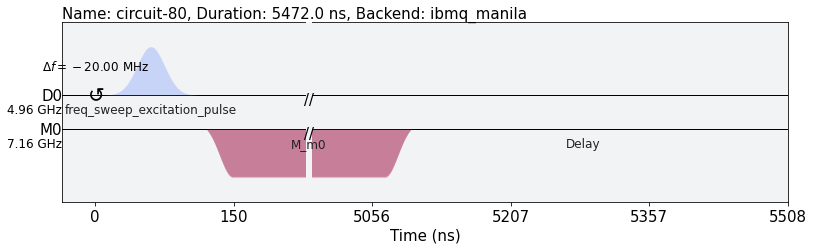

In [ ]:
def get_closest_multiple_of(vaule, base_number):
    return int(vaule + base_number/2) - (int(vaule + base_number/2) % base_number)

# samples need to be multiples of 16
def get_closest_multiple_of_16(num):
    return get_closest_multiple_of(num, granularity)

# Convert seconds to dt
def get_dt_from(sec):
    return get_closest_multiple_of(sec/dt, lcm)

from qiskit import pulse                  # This is where we access all of our Pulse features!
from qiskit.circuit import Parameter      # This is Parameter Class for variable parameters.
from qiskit.circuit import QuantumCircuit, Gate

# Drive pulse parameters (us = microseconds)
drive_sigma_sec = 0.015 * us                           # This determines the actual width of the gaussian
drive_duration_sec = drive_sigma_sec * 8                # This is a truncating parameter, because gaussians don't have 
                                                        # a natural finite length
drive_amp = 0.05

# Create the base schedule
# Start with drive pulse acting on the drive channel
freq = Parameter('freq')
with pulse.build(backend=backend, default_alignment='sequential', name='Frequency sweep') as sweep_sched:
    drive_duration = get_closest_multiple_of_16(pulse.seconds_to_samples(drive_duration_sec))
    drive_sigma = pulse.seconds_to_samples(drive_sigma_sec)
    drive_chan = pulse.drive_channel(qubit)
    pulse.set_frequency(freq, drive_chan)
    # Drive pulse samples
    pulse.play(pulse.Gaussian(duration=drive_duration,
                              sigma=drive_sigma,
                              amp=drive_amp,
                              name='freq_sweep_excitation_pulse'), drive_chan)

sweep_gate = Gate("sweep", 1, [freq])

qc_sweep = QuantumCircuit(1, 1)

qc_sweep.append(sweep_gate, [0])
qc_sweep.measure(0, 0)
qc_sweep.add_calibration(sweep_gate, (0,), sweep_sched, [freq])

# Create the frequency settings for the sweep (MUST BE IN HZ)
frequencies_Hz = frequencies_GHz*GHz
exp_sweep_circs = [qc_sweep.assign_parameters({freq: f}, inplace=False) for f in frequencies_Hz]

from qiskit import schedule

sweep_schedule = schedule(exp_sweep_circs[0], backend)
sweep_schedule.draw(backend=backend)

Job Status: job has successfully run


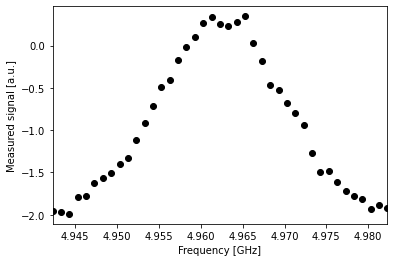

In [ ]:
num_shots_per_frequency = 1024

job = backend.run(exp_sweep_circs, 
                  meas_level=1, 
                  meas_return='avg', 
                  shots=num_shots_per_frequency)

from qiskit.tools.monitor import job_monitor
job_monitor(job)
frequency_sweep_results = job.result(timeout=120) # timeout parameter set to 120 seconds

sweep_values = []
for i in range(len(frequency_sweep_results.results)):
    # Get the results from the ith experiment
    res = frequency_sweep_results.get_memory(i)*scale_factor
    # Get the results for `qubit` from this experiment
    sweep_values.append(res[qubit])

plt.scatter(frequencies_GHz, np.real(sweep_values), color='black') # plot real part of sweep values
plt.xlim([min(frequencies_GHz), max(frequencies_GHz)])
plt.xlabel("Frequency [GHz]")
plt.ylabel("Measured signal [a.u.]")
plt.show()

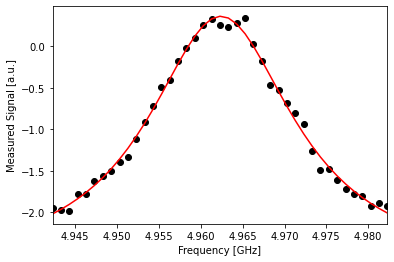

In [ ]:
from scipy.optimize import curve_fit

def fit_function(x_values, y_values, function, init_params):
    fitparams, conv = curve_fit(function, x_values, y_values, init_params)
    y_fit = function(x_values, *fitparams)
    
    return fitparams, y_fit

fit_params, y_fit = fit_function(frequencies_GHz,
                                 np.real(sweep_values), 
                                 lambda x, A, q_freq, B, C: (A / np.pi) * (B / ((x - q_freq)**2 + B**2)) + C,
                                 [1, 4.975, 1, -2] # initial parameters for curve_fit
                                )

plt.scatter(frequencies_GHz, np.real(sweep_values), color='black')
plt.plot(frequencies_GHz, y_fit, color='red')
plt.xlim([min(frequencies_GHz), max(frequencies_GHz)])

plt.xlabel("Frequency [GHz]")
plt.ylabel("Measured Signal [a.u.]")
plt.show()

In [ ]:
A, rough_qubit_frequency, B, C = fit_params
rough_qubit_frequency = rough_qubit_frequency*GHz # make sure qubit freq is in Hz
print(f"We've updated our qubit frequency estimate from "
      f"{round(backend_defaults.qubit_freq_est[qubit] / GHz, 5)} GHz to {round(rough_qubit_frequency/GHz, 5)} GHz.")

We've updated our qubit frequency estimate from 4.96229 GHz to 4.96239 GHz.


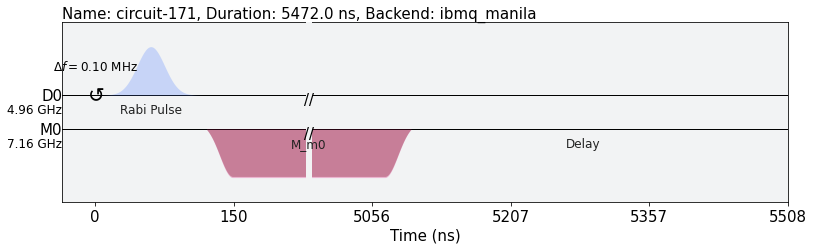

In [ ]:
# This experiment uses these values from the previous experiment:
# `qubit`,and
# `rough_qubit_frequency`.

# Rabi experiment parameters
num_rabi_points = 50

# Drive amplitude values to iterate over: 50 amplitudes evenly spaced from 0 to 0.75
drive_amp_min = 0
drive_amp_max = 0.75
drive_amps = np.linspace(drive_amp_min, drive_amp_max, num_rabi_points)

# Build the Rabi experiments:
#    A drive pulse at the qubit frequency, followed by a measurement,
#    where we vary the drive amplitude each time.

drive_amp = Parameter('drive_amp')
with pulse.build(backend=backend, default_alignment='sequential', name='Rabi Experiment') as rabi_sched:
    drive_duration = get_closest_multiple_of_16(pulse.seconds_to_samples(drive_duration_sec))
    drive_sigma = pulse.seconds_to_samples(drive_sigma_sec)
    drive_chan = pulse.drive_channel(qubit)
    pulse.set_frequency(rough_qubit_frequency, drive_chan)
    pulse.play(pulse.Gaussian(duration=drive_duration,
                              amp=drive_amp,
                              sigma=drive_sigma,
                              name='Rabi Pulse'), drive_chan)

rabi_gate = Gate("rabi", 1, [drive_amp])

qc_rabi = QuantumCircuit(1, 1)

qc_rabi.append(rabi_gate, [0])
qc_rabi.measure(0, 0)
qc_rabi.add_calibration(rabi_gate, (0,), rabi_sched, [drive_amp])

exp_rabi_circs = [qc_rabi.assign_parameters({drive_amp: a}, inplace=False) for a in drive_amps]

rabi_schedule = schedule(exp_rabi_circs[-1], backend)
rabi_schedule.draw(backend=backend)

In [ ]:
num_shots_per_point = 1024

job = backend.run(exp_rabi_circs, 
                  meas_level=1, 
                  meas_return='avg', 
                  shots=num_shots_per_point)

job_monitor(job)

Job Status: job has successfully run


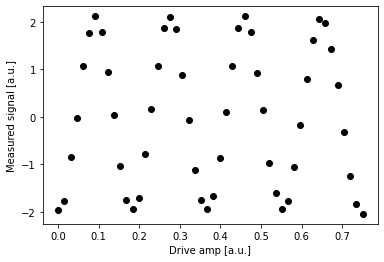

In [ ]:
rabi_results = job.result(timeout=120)

# center data around 0
def baseline_remove(values):
    return np.array(values) - np.mean(values)

rabi_values = []
for i in range(num_rabi_points):
    # Get the results for `qubit` from the ith experiment
    rabi_values.append(rabi_results.get_memory(i)[qubit] * scale_factor)

rabi_values = np.real(baseline_remove(rabi_values))

plt.xlabel("Drive amp [a.u.]")
plt.ylabel("Measured signal [a.u.]")
plt.scatter(drive_amps, rabi_values, color='black') # plot real part of Rabi values
plt.show()

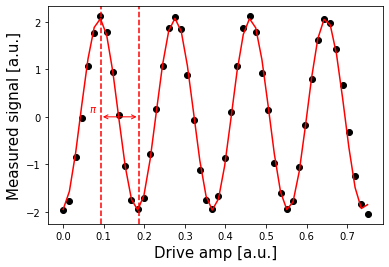

In [ ]:
fit_params, y_fit = fit_function(drive_amps,
                                 rabi_values, 
                                 lambda x, A, B, drive_period, phi: (A*np.cos(2*np.pi*x/drive_period - phi) + B),
                                 [2, 0, 0.2, 0])

plt.scatter(drive_amps, rabi_values, color='black')
plt.plot(drive_amps, y_fit, color='red')

drive_period = fit_params[2] # get period of rabi oscillation

plt.axvline(drive_period/2, color='red', linestyle='--')
plt.axvline(drive_period, color='red', linestyle='--')
plt.annotate("", xy=(drive_period, 0), xytext=(drive_period/2,0), arrowprops=dict(arrowstyle="<->", color='red'))
plt.annotate("$\pi$", xy=(drive_period/2-0.03, 0.1), color='red')

plt.xlabel("Drive amp [a.u.]", fontsize=15)
plt.ylabel("Measured signal [a.u.]", fontsize=15)
plt.show()

In [ ]:
pi_amp = abs(drive_period / 2)
print(f"Pi Amplitude = {pi_amp}")

Pi Amplitude = 0.09293932375810746


In [ ]:
with pulse.build(backend) as pi_pulse:
    drive_duration = get_closest_multiple_of_16(pulse.seconds_to_samples(drive_duration_sec))
    drive_sigma = pulse.seconds_to_samples(drive_sigma_sec)
    drive_chan = pulse.drive_channel(qubit)
    pulse.play(pulse.Gaussian(duration=drive_duration,
                              amp=pi_amp,
                              sigma=drive_sigma,
                              name='pi_pulse'), drive_chan)

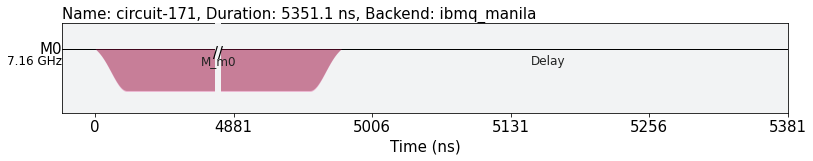

In [ ]:
# Ground state 
qc_gnd = QuantumCircuit(1, 1)
qc_gnd.measure(0, 0)

gnd_schedule = schedule(qc_gnd, backend)
gnd_schedule.draw(backend=backend)

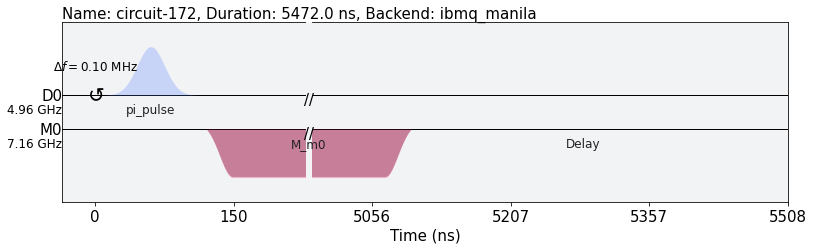

In [ ]:
# Excited state
with pulse.build(backend=backend, default_alignment='sequential', name='excited state') as exc_schedule:
    drive_chan = pulse.drive_channel(qubit)
    pulse.set_frequency(rough_qubit_frequency, drive_chan)
    pulse.call(pi_pulse)

qc_exc = QuantumCircuit(1, 1)
qc_exc.x(0)
qc_exc.measure(0, 0)

qc_exc.add_calibration("x", (0,), exc_schedule, [])

exec_schedule = schedule(qc_exc, backend)
exec_schedule.draw(backend=backend)

In [ ]:
# Execution settings   
num_shots = 1024

job = backend.run([qc_gnd, qc_exc], 
                  meas_level=1, 
                  meas_return='single', 
                  shots=num_shots)

job_monitor(job)

Job Status: job has successfully run


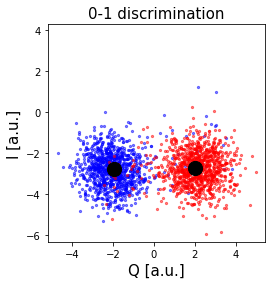

In [ ]:
gnd_exc_results = job.result(timeout=120)

gnd_results = gnd_exc_results.get_memory(0)[:, qubit]*scale_factor
exc_results = gnd_exc_results.get_memory(1)[:, qubit]*scale_factor

plt.figure()

# Plot all the results
# All results from the ground state are plotted in blue
plt.scatter(np.real(gnd_results), np.imag(gnd_results), 
                s=5, cmap='viridis', c='blue', alpha=0.5, label='state_0')
# All results from the excited state are plotted in red
plt.scatter(np.real(exc_results), np.imag(exc_results), 
                s=5, cmap='viridis', c='red', alpha=0.5, label='state_1')

plt.axis('square')

# Plot a large dot for the average result of the 0 and 1 states.
mean_gnd = np.mean(gnd_results) # takes mean of both real and imaginary parts
mean_exc = np.mean(exc_results)
plt.scatter(np.real(mean_gnd), np.imag(mean_gnd), 
            s=200, cmap='viridis', c='black',alpha=1.0, label='state_0_mean')
plt.scatter(np.real(mean_exc), np.imag(mean_exc), 
            s=200, cmap='viridis', c='black',alpha=1.0, label='state_1_mean')

plt.ylabel('I [a.u.]', fontsize=15)
plt.xlabel('Q [a.u.]', fontsize=15)
plt.title("0-1 discrimination", fontsize=15)

plt.show()

In [ ]:
import math

def classify(point: complex):
    """Classify the given state as |0> or |1>."""
    def distance(a, b):
        return math.sqrt((np.real(a) - np.real(b))**2 + (np.imag(a) - np.imag(b))**2)
    return int(distance(point, mean_exc) < distance(point, mean_gnd))

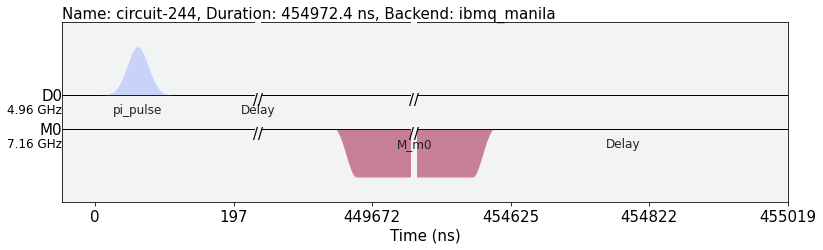

In [ ]:
# T1 experiment parameters
time_max_sec = 450 * us
time_step_sec = 6.5 * us
delay_times_sec = np.arange(1 * us, time_max_sec, time_step_sec)

# We will use the same `pi_pulse` and qubit frequency that we calibrated and used before
delay = Parameter('delay')
qc_t1 = QuantumCircuit(1, 1)

qc_t1.x(0)
qc_t1.delay(delay, 0)
qc_t1.measure(0, 0)
qc_t1.add_calibration("x", (0,), pi_pulse)

exp_t1_circs = [qc_t1.assign_parameters({delay: get_dt_from(d)}, inplace=False) for d in delay_times_sec]

sched_idx = -1
t1_schedule = schedule(exp_t1_circs[sched_idx], backend)
t1_schedule.draw(backend=backend)

In [ ]:
# Execution settings
num_shots = 256

job = backend.run(exp_t1_circs, 
                  meas_level=1, 
                  meas_return='single', 
                  shots=num_shots)

job_monitor(job)

Job Status: job has successfully run


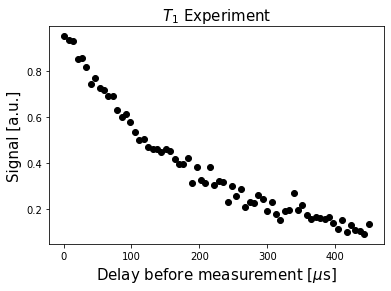

In [ ]:
t1_results = job.result(timeout=120)

t1_values = []

for i in range(len(delay_times_sec)):
    iq_data = t1_results.get_memory(i)[:,qubit] * scale_factor
    t1_values.append(sum(map(classify, iq_data)) / num_shots)

plt.scatter(delay_times_sec/us, t1_values, color='black') 
plt.title("$T_1$ Experiment", fontsize=15)
plt.xlabel('Delay before measurement [$\mu$s]', fontsize=15)
plt.ylabel('Signal [a.u.]', fontsize=15)
plt.show()

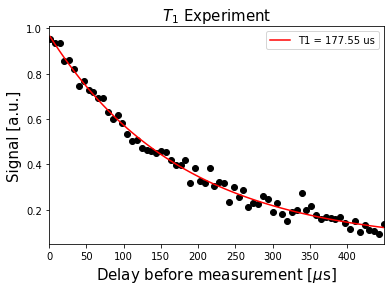

In [ ]:
# Fit the data
fit_params, y_fit = fit_function(delay_times_sec/us, t1_values, 
            lambda x, A, C, T1: (A * np.exp(-x / T1) + C),
            [-3, 3, 100]
            )

_, _, T1 = fit_params

plt.scatter(delay_times_sec/us, t1_values, color='black')
plt.plot(delay_times_sec/us, y_fit, color='red', label=f"T1 = {T1:.2f} us")
plt.xlim(0, np.max(delay_times_sec/us))
plt.title("$T_1$ Experiment", fontsize=15)
plt.xlabel('Delay before measurement [$\mu$s]', fontsize=15)
plt.ylabel('Signal [a.u.]', fontsize=15)
plt.legend()
plt.show()

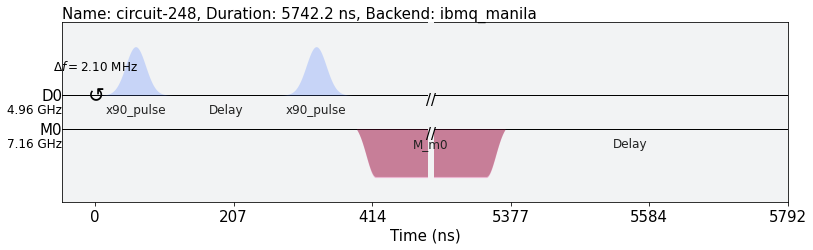

In [ ]:
# Ramsey experiment parameters
time_max_sec = 1.8 * us
time_step_sec = 0.025 * us
delay_times_sec = np.arange(0.1 * us, time_max_sec, time_step_sec)

# Drive parameters
# The drive amplitude for pi/2 is simply half the amplitude of the pi pulse
drive_amp = pi_amp / 2

# x_90 is a concise way to say pi_over_2; i.e., an X rotation of 90 degrees
with pulse.build(backend) as x90_pulse:
    drive_duration = get_closest_multiple_of_16(pulse.seconds_to_samples(drive_duration_sec))
    drive_sigma = pulse.seconds_to_samples(drive_sigma_sec)
    drive_chan = pulse.drive_channel(qubit)
    pulse.play(pulse.Gaussian(duration=drive_duration,
                              amp=drive_amp,
                              sigma=drive_sigma,
                              name='x90_pulse'), drive_chan)

detuning_MHz = 2 
ramsey_frequency = round(rough_qubit_frequency + detuning_MHz * MHz, 6) # need ramsey freq in Hz

# create schedules for Ramsey experiment 
delay = Parameter('delay')
with pulse.build(backend=backend, default_alignment='sequential', name="Ramsey delay Experiment") as ramsey_schedule:
    drive_chan = pulse.drive_channel(qubit)
    pulse.set_frequency(ramsey_frequency, drive_chan)
    pulse.call(x90_pulse)
    pulse.delay(delay, drive_chan)
    pulse.call(x90_pulse)

ramsey_gate = Gate("ramsey", 1, [delay])

qc_ramsey = QuantumCircuit(1, 1)

qc_ramsey.append(ramsey_gate, [0])
qc_ramsey.measure(0, 0)
qc_ramsey.add_calibration(ramsey_gate, (0,), ramsey_schedule, [delay])

exp_ramsey_circs = [qc_ramsey.assign_parameters({delay: get_dt_from(d)}, inplace=False) for d in delay_times_sec]

ramsey_schedule = schedule(exp_ramsey_circs[2], backend)
ramsey_schedule.draw(backend=backend)

In [ ]:
# Execution settings
num_shots = 256

job = backend.run(exp_ramsey_circs, 
                  meas_level=1, 
                  meas_return='single', 
                  shots=num_shots)

job_monitor(job)

Job Status: job has successfully run


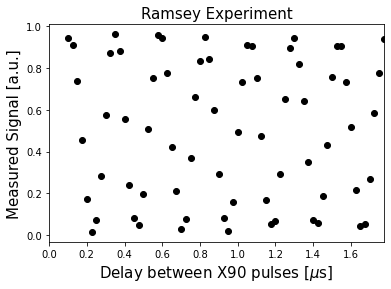

In [ ]:
ramsey_results = job.result(timeout=120)

ramsey_values = []

for i in range(len(delay_times_sec)):
    iq_data = ramsey_results.get_memory(i)[:,qubit] * scale_factor
    ramsey_values.append(sum(map(classify, iq_data)) / num_shots)
    
plt.scatter(delay_times_sec/us, np.real(ramsey_values), color='black')
plt.xlim(0, np.max(delay_times_sec/us))
plt.title("Ramsey Experiment", fontsize=15)
plt.xlabel('Delay between X90 pulses [$\mu$s]', fontsize=15)
plt.ylabel('Measured Signal [a.u.]', fontsize=15)
plt.show()

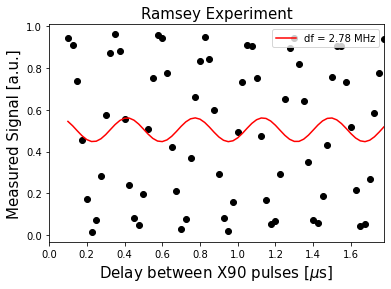

In [ ]:
fit_params, y_fit = fit_function(delay_times_sec/us, np.real(ramsey_values),
                                 lambda x, A, del_f_MHz, C, B: (
                                          A * np.cos(2*np.pi*del_f_MHz*x - C) + B
                                         ),
                                 [5, 1./0.4, 0, 0.25]
                                )

# Off-resonance component
_, del_f_MHz, _, _, = fit_params # freq is MHz since times in us

plt.scatter(delay_times_sec/us, np.real(ramsey_values), color='black')
plt.plot(delay_times_sec/us, y_fit, color='red', label=f"df = {del_f_MHz:.2f} MHz")
plt.xlim(0, np.max(delay_times_sec/us))
plt.xlabel('Delay between X90 pulses [$\mu$s]', fontsize=15)
plt.ylabel('Measured Signal [a.u.]', fontsize=15)
plt.title('Ramsey Experiment', fontsize=15)
plt.legend()
plt.show()

In [ ]:
precise_qubit_freq = rough_qubit_frequency + (detuning_MHz - del_f_MHz) * MHz # get new freq in Hz
print(f"Our updated qubit frequency is now {round(precise_qubit_freq/GHz, 6)} GHz. "
      f"It used to be {round(rough_qubit_frequency / GHz, 6)} GHz")

Our updated qubit frequency is now 4.961607 GHz. It used to be 4.96239 GHz


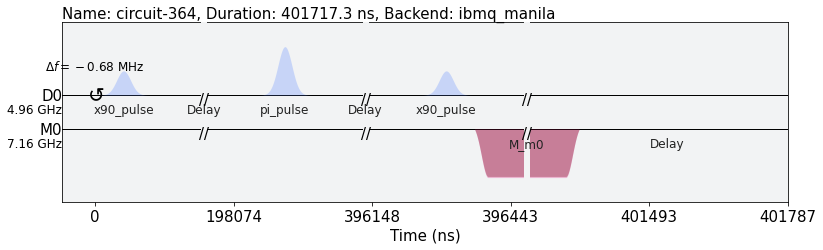

In [ ]:
# T2 experiment parameters
tau_max_sec = 200 * us
tau_step_sec = 4 * us
delay_times_sec = np.arange(2 * us, tau_max_sec, tau_step_sec)

# We will use the pi_pulse and x90_pulse from previous experiments

delay = Parameter('delay')
with pulse.build(backend=backend, default_alignment='sequential', name="T2 delay Experiment") as t2_schedule:
    drive_chan = pulse.drive_channel(qubit)
    pulse.set_frequency(precise_qubit_freq, drive_chan)
    pulse.call(x90_pulse)
    pulse.delay(delay, drive_chan)
    pulse.call(pi_pulse)
    pulse.delay(delay, drive_chan)
    pulse.call(x90_pulse)

t2_gate = Gate("t2", 1, [delay])

qc_t2 = QuantumCircuit(1, 1)

qc_t2.append(t2_gate, [0])
qc_t2.measure(0, 0)
qc_t2.add_calibration(t2_gate, (0,), t2_schedule, [delay])

exp_t2_circs = [qc_t2.assign_parameters({delay: get_dt_from(d)}, inplace=False) for d in delay_times_sec]

t2_schedule = schedule(exp_t2_circs[-1], backend)
t2_schedule.draw(backend=backend)

In [ ]:
# Execution settings
num_shots_per_point = 512

job = backend.run(exp_t2_circs,
                  meas_level=1,
                  meas_return='single',
                  shots=num_shots_per_point)

job_monitor(job)

Job Status: job has successfully run


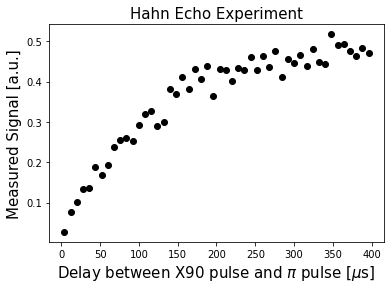

In [ ]:
t2_results = job.result(timeout=120)

t2_values = []

for i in range(len(delay_times_sec)):
    iq_data = t2_results.get_memory(i)[:,qubit] * scale_factor
    t2_values.append(sum(map(classify, iq_data)) / num_shots_per_point)

plt.scatter(2*delay_times_sec/us, t2_values, color='black')
plt.xlabel('Delay between X90 pulse and $\pi$ pulse [$\mu$s]', fontsize=15)
plt.ylabel('Measured Signal [a.u.]', fontsize=15)
plt.title('Hahn Echo Experiment', fontsize=15)
plt.show()

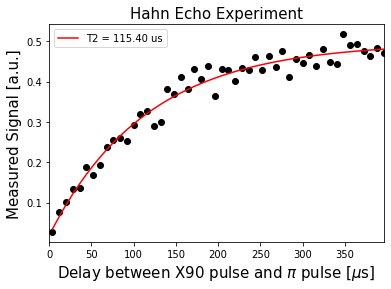

In [ ]:
fit_params, y_fit = fit_function(2*delay_times_sec/us, t2_values,
             lambda x, A, B, T2: (A * np.exp(-x / T2) + B),
             [-3, 0, 100])

_, _, T2 = fit_params
print()

plt.scatter(2*delay_times_sec/us, t2_values, color='black')
plt.plot(2*delay_times_sec/us, y_fit, color='red', label=f"T2 = {T2:.2f} us")
plt.xlim(0, np.max(2*delay_times_sec/us))
plt.xlabel('Delay between X90 pulse and $\pi$ pulse [$\mu$s]', fontsize=15)
plt.ylabel('Measured Signal [a.u.]', fontsize=15)
plt.title('Hahn Echo Experiment', fontsize=15)
plt.legend()
plt.show()

In [ ]:
# DD experiment parameters
tau_sec_min = 1 * us
tau_sec_max = 180 * us
tau_step_sec = 4 * us
taus_sec = np.arange(tau_sec_min, tau_sec_max, tau_step_sec)

num_sequence = 1 # apply 1 sequence
print(f"Total time ranges from {2.*num_sequence*taus_sec[0] / us} to {2.*num_sequence*taus_sec[-1] / us} us")

Total time ranges from 2.0 to 354.0 us


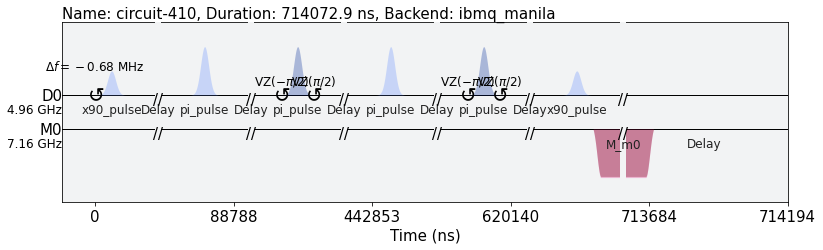

In [ ]:
delay = Parameter('delay')
with pulse.build(backend=backend, default_alignment='sequential', name="T2DD delay Experiment") as T2DD_schedule:
    drive_chan = pulse.drive_channel(qubit)
    pulse.set_frequency(precise_qubit_freq, drive_chan)
    pulse.call(x90_pulse)
    pulse.delay(delay/2, drive_chan)
    for loop_counts in range(num_sequence):
        pulse.call(pi_pulse)
        pulse.delay(delay, drive_chan)
        with pulse.phase_offset(np.pi/2, pulse.drive_channel(qubit)):
            pulse.call(pi_pulse)
        pulse.delay(delay, drive_chan)
        pulse.call(pi_pulse)
        pulse.delay(delay, drive_chan)
        with pulse.phase_offset(np.pi/2, pulse.drive_channel(qubit)):
            pulse.call(pi_pulse)
        if loop_counts != num_sequence-1:
            pulse.delay(delay, drive_chan)
    pulse.delay(delay/2, drive_chan)
    pulse.call(x90_pulse)

T2DD_gate = Gate("T2DD", 1, [delay])

qc_T2DD = QuantumCircuit(1, 1)

qc_T2DD.append(T2DD_gate, [0])
qc_T2DD.measure(0, 0)
qc_T2DD.add_calibration(T2DD_gate, (0,), T2DD_schedule, [delay])

exp_T2DD_circs = [qc_T2DD.assign_parameters({delay: get_dt_from(d)}, inplace=False) for d in taus_sec]

T2DD_schedule = schedule(exp_T2DD_circs[-1], backend)
T2DD_schedule.draw(backend=backend)

In [ ]:
num_shots_per_point = 1024

job = backend.run(exp_T2DD_circs,
                  meas_level=1,
                  meas_return='single',
                  shots=num_shots_per_point)


job_monitor(job)

Job Status: job has successfully run


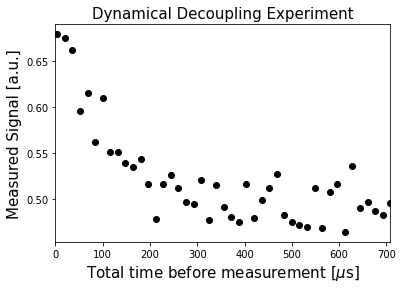

In [ ]:
T2DD_results = job.result(timeout=120)

times_sec = 4*num_sequence*taus_sec
DD_values = []

for i in range(len(times_sec)):
    iq_data = T2DD_results.get_memory(i)[:,qubit] * scale_factor
    DD_values.append(sum(map(classify, iq_data)) / num_shots_per_point)

plt.scatter(times_sec/us, DD_values, color='black')
plt.xlim(0, np.max(times_sec/us))
plt.xlabel('Total time before measurement [$\mu$s]', fontsize=15)
plt.ylabel('Measured Signal [a.u.]', fontsize=15)
plt.title('Dynamical Decoupling Experiment', fontsize=15)
plt.show()

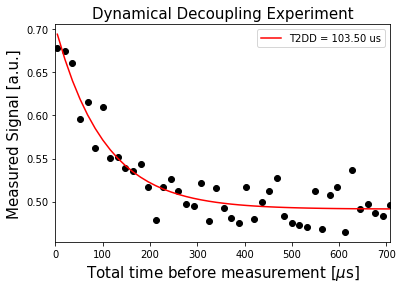

In [ ]:
# Fit the data
fit_func = lambda x, A, B, T2DD: (A * np.exp(-x / T2DD) + B)
fitparams, conv = curve_fit(fit_func, times_sec/us, DD_values, [3.5, 0.8, 150])

_, _, T2DD = fitparams
plt.scatter(times_sec/us, DD_values, color='black')
plt.plot(times_sec/us, fit_func(times_sec/us, *fitparams), color='red', label=f"T2DD = {T2DD:.2f} us")
plt.xlim([0, np.max(times_sec/us)])
plt.xlabel('Total time before measurement [$\mu$s]', fontsize=15)
plt.ylabel('Measured Signal [a.u.]', fontsize=15)
plt.title('Dynamical Decoupling Experiment', fontsize=15)
plt.legend()
plt.show()

Accessing Higher Energy States

In [ ]:
pip install qiskit-terra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

from qiskit import pulse                  # This is where we access all of our Pulse features!
from qiskit.circuit import Parameter      # This is Parameter Class for variable parameters.
from qiskit.circuit import QuantumCircuit, Gate
from qiskit import schedule

from qiskit.tools.monitor import job_monitor

In [ ]:
from qiskit.tools.jupyter import *
%matplotlib inline

from qiskit import IBMQ
IBMQ.enable_account('99e1dd08f2c46188b04a339f1db939ca95b546d2f5ce04176d8a47effe5a12c21cf224a58afb38ee95effeeba182ac34cd14fc18f276cd5ef7948e910f68eea5')
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_manila')

backend_defaults = backend.defaults()

backend_properties = backend.properties()

# unit conversion factors -> all backend properties returned in SI (Hz, sec, etc.)
GHz = 1.0e9 # Gigahertz
MHz = 1.0e6 # Megahertz
us = 1.0e-6 # Microseconds
ns = 1.0e-9 # Nanoseconds

qubit = 0 # qubit we will analyze

default_qubit_freq = backend_defaults.qubit_freq_est[qubit] # Default qubit frequency in Hz. 
print(f"Qubit {qubit} has an estimated frequency of {default_qubit_freq/ GHz} GHz.")

default_anharmonicity = backend_properties.qubits[qubit][3].value # Default anharmonicity in GHz
print(f"Default anharmonicity is {default_anharmonicity} GHz.")

# scale data (specific to each device)
scale_factor = 1e-7

# number of shots for our experiments
NUM_SHOTS = 1024

Qubit 0 has an estimated frequency of 4.962285398613109 GHz.
Default anharmonicity is -0.3433479504893883 GHz.


In [ ]:
def get_job_data(job, average):
    """Retrieve data from a job that has already run.
    Args:
        job (Job): The job whose data you want.
        average (bool): If True, gets the data assuming data is an average.
                        If False, gets the data assuming it is for single shots.
    Return:
        list: List containing job result data. 
    """
    job_results = job.result(timeout = 120) # timeout parameter set to 120 s
    result_data = []
    for i in range(len(job_results.results)):
        if average: # get avg data
            result_data.append(np.real(job_results.get_memory(i)[qubit] * scale_factor))
        else: # get single data
            result_data.append(job_results.get_memory(i)[:, qubit] * scale_factor)
    return result_data

def get_closest_multiple_of_16(num):
    """Compute the nearest multiple of 16. Needed because pulse enabled devices require 
    durations which are multiples of 16 samples.
    """
    return int(num + 8 ) - (int(num + 8 ) % 16)

# there are pulse parameters of the single qubit drive in IBM devices
x12_duration = 160
x12_sigma = 40

In [ ]:
# smaller range sweep
num_freqs = 75
drive_power = 0.15
sweep_freqs = default_anharmonicity*GHz + np.linspace(-30*MHz, 30*MHz, num_freqs)

freq = Parameter('freq')
with pulse.build(backend=backend, default_alignment='sequential', name='Frequency sweep') as freq12_sweep_sched:
    drive_chan = pulse.drive_channel(qubit)
    with pulse.frequency_offset(freq, drive_chan):
        pulse.play(pulse.Gaussian(duration=x12_duration,
                                  amp=drive_power,
                                  sigma=x12_sigma,
                                  name='x12_pulse'), drive_chan)

spect_gate = Gate("spect", 1, [freq])

qc_spect = QuantumCircuit(1, 1)

qc_spect.x(0)
qc_spect.append(spect_gate, [0])
qc_spect.measure(0, 0)
qc_spect.add_calibration(spect_gate, (0,), freq12_sweep_sched, [freq])
    
exp_spect_circs = [qc_spect.assign_parameters({freq: f}) for f in sweep_freqs]

excited_freq_sweep_job = backend.run(exp_spect_circs, 
                                     meas_level=1, 
                                     meas_return='avg', 
                                     shots=NUM_SHOTS)

job_monitor(excited_freq_sweep_job)

Job Status: job has successfully run


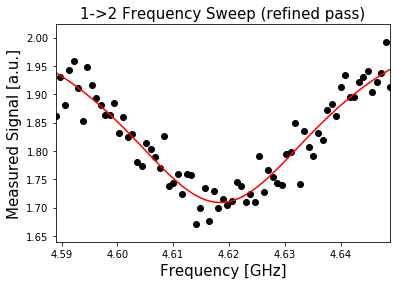

In [ ]:
# Get the refined data (average)
excited_freq_sweep_data = get_job_data(excited_freq_sweep_job, average=True)
excited_sweep_freqs = default_qubit_freq + default_anharmonicity*GHz + np.linspace(-30*MHz, 30*MHz, num_freqs)

def fit_function(x_values, y_values, function, init_params):
    """Fit a function using scipy curve_fit."""
    fitparams, conv = curve_fit(function, x_values, y_values, init_params, maxfev = 50000)
    y_fit = function(x_values, *fitparams)
    
    return fitparams, y_fit

# do fit in Hz
(excited_sweep_fit_params, 
 excited_sweep_y_fit) = fit_function(excited_sweep_freqs,
                                     excited_freq_sweep_data, 
                                     lambda x, A, q_freq, B, C: (A / np.pi) * (B / ((x - q_freq)**2 + B**2)) + C,
                                     [-20, 4.625*GHz, 0.06*GHz, 3*GHz] # initial parameters for curve_fit
                                     )

# Note: we are only plotting the real part of the signal
plt.scatter(excited_sweep_freqs/GHz, excited_freq_sweep_data, color='black')
plt.plot(excited_sweep_freqs/GHz, excited_sweep_y_fit, color='red')
plt.xlim([min(excited_sweep_freqs/GHz), max(excited_sweep_freqs/GHz)])
plt.xlabel("Frequency [GHz]", fontsize=15)
plt.ylabel("Measured Signal [a.u.]", fontsize=15)
plt.title("1->2 Frequency Sweep (refined pass)", fontsize=15)
plt.show()

In [ ]:
_, qubit_12_freq, _, _ = excited_sweep_fit_params
print(f"Our updated estimate for the 1->2 transition frequency is "
      f"{round(qubit_12_freq/GHz, 7)} GHz.")

# experimental configuration
num_rabi_points = 75 # number of experiments (ie amplitudes to sweep out)

# Drive amplitude values to iterate over: 75 amplitudes evenly spaced from 0 to 1.0
drive_amp_min = 0
drive_amp_max = 1.0
drive_amps = np.linspace(drive_amp_min, drive_amp_max, num_rabi_points)

rabi_gate = Gate("rabi", 1, [amp])

qc_rabi = QuantumCircuit(1, 1)

qc_rabi.x(0)
qc_rabi.append(rabi_gate, [0])
qc_rabi.measure(0, 0)
qc_rabi.add_calibration(rabi_gate, (0,), rabi_sched, [amp])
    
exp_rabi_circs = [qc_rabi.assign_parameters({amp: a}) for a in drive_amps]

rabi_12_job = backend.run(exp_rabi_circs, 
                          meas_level=1, 
                          meas_return='avg', 
                          shots=NUM_SHOTS)

job_monitor(rabi_12_job)

Our updated estimate for the 1->2 transition frequency is 4.61845 GHz.


NameError: ignored

In [ ]:
# Get the job data (average)
rabi_12_data = get_job_data(rabi_12_job, average=True)

def baseline_remove(values):
    """Center data around 0."""
    return np.array(values) - np.mean(values)

# Note: Only real part of data is plotted
rabi_12_data = np.real(baseline_remove(rabi_12_data))
(rabi_12_fit_params, 
 rabi_12_y_fit) = fit_function(drive_amps,
                               rabi_12_data, 
                               lambda x, A, B, drive_12_period, phi: (A*np.cos(2*np.pi*x/drive_12_period - phi) + B),
                               [0.2, 0, 0.3, 0])

plt.scatter(drive_amps, rabi_12_data, color='black')
plt.plot(drive_amps, rabi_12_y_fit, color='red')

drive_12_period = rabi_12_fit_params[2] 

pi_amp_12 = drive_12_period/2

plt.axvline(pi_amp_12, color='red', linestyle='--')
plt.axvline(pi_amp_12+drive_12_period/2, color='red', linestyle='--')
plt.annotate("", xy=(pi_amp_12+drive_12_period/2, 0), xytext=(pi_amp_12,0), arrowprops=dict(arrowstyle="<->", color='red'))
plt.annotate("$\pi$", xy=(pi_amp_12-0.03, 0.1), color='red')

plt.xlabel("Drive amp [a.u.]", fontsize=15)
plt.ylabel("Measured signal [a.u.]", fontsize=15)
plt.title('Rabi Experiment (1->2)', fontsize=20)
plt.show()

In [ ]:
print(f"Our updated estimate for the 1->2 transition frequency is "
      f"{round(qubit_12_freq/GHz, 7)} GHz.")
print(f"Pi Amplitude (1->2) = {pi_amp_12}")

In [ ]:
with pulse.build(backend=backend, default_alignment='sequential', name='x12 schedule') as x12_sched:
    drive_chan = pulse.drive_channel(qubit)
    pulse.set_frequency(qubit_12_freq, drive_chan)
    pulse.play(pulse.Gaussian(duration=x12_duration,
                              amp=pi_amp_12,
                              sigma=x12_sigma,
                              name='x12_pulse'), drive_chan)

# Create the three circuits

# 0 state
qc_ground = QuantumCircuit(1, 1)
qc_ground.measure(0, 0)

# 1 state
qc_one = QuantumCircuit(1, 1)
qc_one.x(0)
qc_one.measure(0, 0)

# 2 state 
x12_gate = Gate("one_two_pulse", 1, [])
qc_x12 = QuantumCircuit(1, 1)
qc_x12.x(0)
qc_x12.append(x12_gate, [0])
qc_x12.measure(0, 0)
qc_x12.add_calibration(x12_gate, (0,), x12_sched, [])

# Assemble the schedules into a program
IQ_012_job = backend.run([qc_ground, qc_one, qc_x12], 
                          meas_level=1, 
                          meas_return='single', 
                          shots=NUM_SHOTS)

job_monitor(IQ_012_job)

In [ ]:
# Get job data (single); split for zero, one and two
IQ_012_data = get_job_data(IQ_012_job, average=False)
zero_data = IQ_012_data[0]
one_data = IQ_012_data[1]
two_data = IQ_012_data[2]

def IQ_012_plot(x_min, x_max, y_min, y_max):
    """Helper function for plotting IQ plane for 0, 1, 2. Limits of plot given
    as arguments."""
    # zero data plotted in blue
    plt.scatter(np.real(zero_data), np.imag(zero_data), 
                    s=5, cmap='viridis', c='blue', alpha=0.5, label=r'$|0\rangle$')
    # one data plotted in red
    plt.scatter(np.real(one_data), np.imag(one_data), 
                    s=5, cmap='viridis', c='red', alpha=0.5, label=r'$|1\rangle$')
    # two data plotted in green
    plt.scatter(np.real(two_data), np.imag(two_data), 
                    s=5, cmap='viridis', c='green', alpha=0.5, label=r'$|2\rangle$')

    # Plot a large dot for the average result of the 0, 1 and 2 states.
    mean_zero = np.mean(zero_data) # takes mean of both real and imaginary parts
    mean_one = np.mean(one_data)
    mean_two = np.mean(two_data)
    plt.scatter(np.real(mean_zero), np.imag(mean_zero), 
                s=200, cmap='viridis', c='black',alpha=1.0)
    plt.scatter(np.real(mean_one), np.imag(mean_one), 
                s=200, cmap='viridis', c='black',alpha=1.0)
    plt.scatter(np.real(mean_two), np.imag(mean_two), 
                s=200, cmap='viridis', c='black',alpha=1.0)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min,y_max)
    plt.legend()
    plt.ylabel('I [a.u.]', fontsize=15)
    plt.xlabel('Q [a.u.]', fontsize=15)
    plt.title("0-1-2 discrimination", fontsize=15)

x_min = -5
x_max = 5
y_min = -10
y_max = 10
IQ_012_plot(x_min, x_max, y_min, y_max)

In [ ]:
def reshape_complex_vec(vec):
    """Take in complex vector vec and return 2d array w/ real, imag entries. This is needed for the learning.
    Args:
        vec (list): complex vector of data
    Returns:
        list: vector w/ entries given by (real(vec], imag(vec))
    """
    length = len(vec)
    vec_reshaped = np.zeros((length, 2))
    for i in range(len(vec)):
        vec_reshaped[i]=[np.real(vec[i]), np.imag(vec[i])]
    return vec_reshaped

# Create IQ vector (split real, imag parts)
zero_data_reshaped = reshape_complex_vec(zero_data)
one_data_reshaped = reshape_complex_vec(one_data)  
two_data_reshaped = reshape_complex_vec(two_data)  

IQ_012_data = np.concatenate((zero_data_reshaped, one_data_reshaped, two_data_reshaped))
print(IQ_012_data.shape) # verify IQ data shape

In [ ]:
# construct vector w/ 0's, 1's and 2's (for testing)
state_012 = np.zeros(NUM_SHOTS) # shots gives number of experiments
state_012 = np.concatenate((state_012, np.ones(NUM_SHOTS)))
state_012 = np.concatenate((state_012, 2*np.ones(NUM_SHOTS)))
print(len(state_012))

# Shuffle and split data into training and test sets
IQ_012_train, IQ_012_test, state_012_train, state_012_test = train_test_split(IQ_012_data, state_012, test_size=0.5)

In [ ]:
# Set up the LDA
LDA_012 = LinearDiscriminantAnalysis()
LDA_012.fit(IQ_012_train, state_012_train)

In [ ]:
# test on some simple data 
print(LDA_012.predict([[0, 0], [-10, 0], [-15, -5]]))

In [ ]:
# Compute accuracy
score_012 = LDA_012.score(IQ_012_test, state_012_test)
print(score_012)

In [ ]:
# Plot separatrix on top of scatter
def separatrixPlot(lda, x_min, x_max, y_min, y_max, shots):
    nx, ny = shots, shots

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)

    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='black')

IQ_012_plot(x_min, x_max, y_min, y_max)
separatrixPlot(LDA_012, x_min, x_max, y_min, y_max, NUM_SHOTS)

Introduction to Transmon Physics

In [ ]:
!pip install qutip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.7 MB 4.0 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

E_J = 20e9
w = 5e9
anharm = -300e6

N_phis = 101
phis = np.linspace(-np.pi,np.pi,N_phis)
mid_idx = int((N_phis+1)/2)

# potential energies of the QHO & transmon
U_QHO = 0.5*E_J*phis**2
U_QHO = U_QHO/w
U_transmon = (E_J-E_J*np.cos(phis))
U_transmon = U_transmon/w

# import QuTiP, construct Hamiltonians, and solve for energies

from qutip import destroy
N = 35
N_energies = 5
c = destroy(N)
H_QHO = w*c.dag()*c
E_QHO = H_QHO.eigenenergies()[0:N_energies]
H_transmon = w*c.dag()*c + (anharm/2)*(c.dag()*c)*(c.dag()*c - 1)
E_transmon = H_transmon.eigenenergies()[0:2*N_energies]

print(E_QHO[:4])
print(E_transmon[:8])

[0.0e+00 5.0e+09 1.0e+10 1.5e+10]
[0.00e+00 1.70e+09 5.00e+09 6.60e+09 9.70e+09 1.12e+10 1.41e+10 1.55e+10]


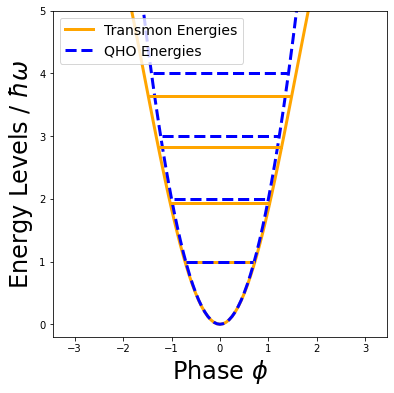

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(6,6))

axes.plot(phis, U_transmon, '-', color='orange', linewidth=3.0)
axes.plot(phis, U_QHO, '--', color='blue', linewidth=3.0)

for eidx in range(1,N_energies):
    delta_E_QHO = (E_QHO[eidx]-E_QHO[0])/w
    delta_E_transmon = (E_transmon[2*eidx]-E_transmon[0])/w
    QHO_lim_idx = min(np.where(U_QHO[int((N_phis+1)/2):N_phis] > delta_E_QHO)[0])
    trans_lim_idx = min(np.where(U_transmon[int((N_phis+1)/2):N_phis] > delta_E_transmon)[0])
    trans_label, = axes.plot([phis[mid_idx-trans_lim_idx-1], phis[mid_idx+trans_lim_idx-1]], \
                             [delta_E_transmon, delta_E_transmon], '-', color='orange', linewidth=3.0)
    qho_label, = axes.plot([phis[mid_idx-QHO_lim_idx-1], phis[mid_idx+QHO_lim_idx-1]], \
                           [delta_E_QHO, delta_E_QHO], '--', color='blue', linewidth=3.0)
    
axes.set_xlabel('Phase $\phi$', fontsize=24)
axes.set_ylabel('Energy Levels / $\hbar\omega$', fontsize=24)
axes.set_ylim(-0.2,5)

qho_label.set_label('QHO Energies')
trans_label.set_label('Transmon Energies')
axes.legend(loc=2, fontsize=14)


Circuit Quantum Electrodynamics

In [ ]:
# import SymPy and define symbols
import sympy as sp
sp.init_printing(use_unicode=True)
wr = sp.Symbol('\omega_r') # resonator frequency
wq = sp.Symbol('\omega_q') # qubit frequency
g = sp.Symbol('g', real=True) # vacuum Rabi coupling
Delta = sp.Symbol('Delta', real=True) # wr - wq; defined later

# import operator relations and define them
from sympy.physics.quantum.boson import BosonOp
a = BosonOp('a') # resonator photon annihilation operator
from sympy.physics.quantum import pauli, Dagger, Commutator
from sympy.physics.quantum.operatorordering import normal_ordered_form

# Pauli matrices
sx = pauli.SigmaX()
sy = pauli.SigmaY()
sz = pauli.SigmaZ()

# qubit raising and lowering operators, notice the spin and qubit ladder operators are inversed
splus = pauli.SigmaMinus()
sminus = pauli.SigmaPlus()

# define J-C Hamiltonian in terms of diagonal and non-block diagonal terms
H0 = wr*Dagger(a)*a - (1/2)*wq*sz; 
H2 = g*(Dagger(a)*sminus + a*splus); 
HJC = H0 + H2; HJC # print

In [ ]:
# using the above method for finding the ansatz
eta = Commutator(H0, H2); eta

In [ ]:
pauli.qsimplify_pauli(normal_ordered_form(eta.doit().expand()))

In [ ]:
A = sp.Symbol('A')
B = sp.Symbol('B')
eta = A * Dagger(a) * sminus - B * a * splus;
pauli.qsimplify_pauli(normal_ordered_form(Commutator(H0, eta).doit().expand()))

In [ ]:
H2

In [ ]:
S1 = eta.subs(A, g/Delta)
S1 = S1.subs(B, g/Delta); S1.factor()

In [ ]:
Heff = H0 + 0.5*pauli.qsimplify_pauli(normal_ordered_form(Commutator(H2, S1).doit().expand())).simplify(); Heff

In [ ]:
from qiskit.aqua.algorithms import VQE, NumPyEigensolver
import matplotlib.pyplot as plt
import numpy as np
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.components.initial_states import HartreeFock
from qiskit.circuit.library import EfficientSU2
from qiskit.aqua.components.optimizers import COBYLA, SPSA, SLSQP
from qiskit.aqua.operators import Z2Symmetries
from qiskit import IBMQ, BasicAer, Aer
from qiskit.chemistry.drivers import PySCFDriver, UnitsType
from qiskit.chemistry import FermionicOperator
from qiskit.aqua import QuantumInstance
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter
from qiskit.providers.aer.noise import NoiseModel

ImportError: ignored

In [ ]:
def get_qubit_op(dist):
    driver = PySCFDriver(atom="Li .0 .0 .0; H .0 .0 " + str(dist), unit=UnitsType.ANGSTROM, 
                         charge=0, spin=0, basis='sto3g')
    molecule = driver.run()
    freeze_list = [0]
    remove_list = [-3, -2]
    repulsion_energy = molecule.nuclear_repulsion_energy
    num_particles = molecule.num_alpha + molecule.num_beta
    num_spin_orbitals = molecule.num_orbitals * 2
    remove_list = [x % molecule.num_orbitals for x in remove_list]
    freeze_list = [x % molecule.num_orbitals for x in freeze_list]
    remove_list = [x - len(freeze_list) for x in remove_list]
    remove_list += [x + molecule.num_orbitals - len(freeze_list)  for x in remove_list]
    freeze_list += [x + molecule.num_orbitals for x in freeze_list]
    ferOp = FermionicOperator(h1=molecule.one_body_integrals, h2=molecule.two_body_integrals)
    ferOp, energy_shift = ferOp.fermion_mode_freezing(freeze_list)
    num_spin_orbitals -= len(freeze_list)
    num_particles -= len(freeze_list)
    ferOp = ferOp.fermion_mode_elimination(remove_list)
    num_spin_orbitals -= len(remove_list)
    qubitOp = ferOp.mapping(map_type='parity', threshold=0.00000001)
    qubitOp = Z2Symmetries.two_qubit_reduction(qubitOp, num_particles)
    shift = energy_shift + repulsion_energy
    return qubitOp, num_particles, num_spin_orbitals, shift

backend = BasicAer.get_backend("statevector_simulator")
distances = np.arange(0.5, 4.0, 0.1)
exact_energies = []
vqe_energies = []
optimizer = SLSQP(maxiter=5)
for dist in distances:
    qubitOp, num_particles, num_spin_orbitals, shift = get_qubit_op(dist)
    result = NumPyEigensolver(qubitOp).run()
    exact_energies.append(np.real(result.eigenvalues) + shift)
    initial_state = HartreeFock(
        num_spin_orbitals,
        num_particles,
        qubit_mapping='parity'
    ) 
    var_form = UCCSD(
        num_orbitals=num_spin_orbitals,
        num_particles=num_particles,
        initial_state=initial_state,
        qubit_mapping='parity'
    )
    vqe = VQE(qubitOp, var_form, optimizer)
    vqe_result = np.real(vqe.run(backend)['eigenvalue'] + shift)
    vqe_energies.append(vqe_result)
    print("Interatomic Distance:", np.round(dist, 2), "VQE Result:", vqe_result, "Exact Energy:", exact_energies[-1])
    
print("All energies have been calculated")

NameError: ignored

ValueError: ignored

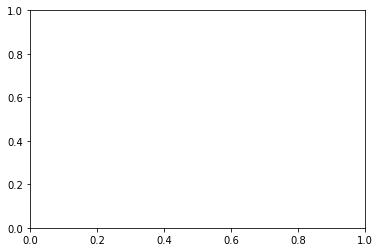

In [ ]:
plt.plot(distances, exact_energies, label="Exact Energy")
plt.plot(distances, vqe_energies, label="VQE Energy")
plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy')
plt.legend()
plt.show()

In [ ]:
driver = PySCFDriver(atom='H .0 .0 -0.3625; H .0 .0 0.3625', unit=UnitsType.ANGSTROM, charge=0, spin=0, basis='sto3g')
molecule = driver.run()
num_particles = molecule.num_alpha + molecule.num_beta
qubitOp = FermionicOperator(h1=molecule.one_body_integrals, h2=molecule.two_body_integrals).mapping(map_type='parity')
qubitOp = Z2Symmetries.two_qubit_reduction(qubitOp, num_particles)

NameError: ignored

In [ ]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = Aer.get_backend("qasm_simulator")
device = provider.get_backend("ibmq_lima")
coupling_map = device.configuration().coupling_map
noise_model = NoiseModel.from_backend(device.properties())
quantum_instance = QuantumInstance(backend=backend, 
                                   shots=8192, 
                                   noise_model=noise_model, 
                                   coupling_map=coupling_map,
                                   measurement_error_mitigation_cls=CompleteMeasFitter,
                                   cals_matrix_refresh_period=30)

IBMQAccountCredentialsNotFound: ignored

In [ ]:
exact_solution = NumPyEigensolver(qubitOp).run()
print("Exact Result:", np.real(exact_solution.eigenvalues) + molecule.nuclear_repulsion_energy)
optimizer = SPSA(maxiter=100)
var_form = EfficientSU2(qubitOp.num_qubits, entanglement="linear")
vqe = VQE(qubitOp, var_form, optimizer=optimizer)
ret = vqe.run(quantum_instance)
vqe_result = np.real(ret['eigenvalue']+ molecule.nuclear_repulsion_energy)
print("VQE Result:", vqe_result)

NameError: ignored

Exploring the Jaynes-Cummings Hamiltonian with Qiskit Pulse

In [ ]:
from qiskit import IBMQ
provider = IBMQ.enable_account('99e1dd08f2c46188b04a339f1db939ca95b546d2f5ce04176d8a47effe5a12c21cf224a58afb38ee95effeeba182ac34cd14fc18f276cd5ef7948e910f68eea5')
backends_supporting_openpulse = provider.backends(filters=lambda b: b.configuration().open_pulse)
display(backends_supporting_openpulse)

[]

In [ ]:
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
# Loading your IBM Q account(s)
provider = IBMQ.enable_account('99e1dd08f2c46188b04a339f1db939ca95b546d2f5ce04176d8a47effe5a12c21cf224a58afb38ee95effeeba182ac34cd14fc18f276cd5ef7948e910f68eea5')
IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_manila')

In [ ]:
backend.configuration().backend_version

'1.0.36'

In [ ]:
backend_config = backend.configuration()
backend_defaults = backend.defaults()

from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

# samples need to be multiples of 16 to accommodate the hardware limitations
def get_closest_multiple_of_16(num):
    return int(num + 8 ) - (int(num + 8 ) % 16)

# process the reflective measurement results
# in a reflective measurement the data is encoded in the phase of the output signal
def process_reflective_measurement(freqs, values):
    phase_grad = np.gradient(savgol_filter(np.unwrap(np.angle(values)), 3, 2), freqs)
    return (phase_grad-min(phase_grad))/(max(phase_grad)-min(phase_grad)) - 1

# lorentzian function
def lorentzian(f, f0, k, a, offs):
    return -a*k/(2*np.pi)/((k/2)**2+(f-f0)**2)+offs

#fit_lorentzian takes two arrays that contain the frequencies and experimental output values of each frequency respectively. 
#returns the lorentzian parameters that best fits this output of the experiment.
#popt are the fit parameters and pcov is the covariance matrix for the fit
def fit_lorentzian(freqs, values):
    p0=[freqs[np.argmin(values)], (freqs[-1]-freqs[0])/2, min(values), 0]
    bounds=([freqs[0], 0, -np.inf, -np.inf], [freqs[-1], freqs[-1]-freqs[0], np.inf, np.inf])
    popt, pcov=curve_fit(lorentzian, freqs, values, p0=p0, bounds=bounds)
    return popt, pcov

# exponential function
def exponential(t, tau, a, offset):
    return a*np.exp(-t/tau)+offset

# fit an exponential function
def fit_exponential(ts, values):
    p0=[np.average(ts), 1, 0]
    return curve_fit(exponential, ts, values, p0=p0)

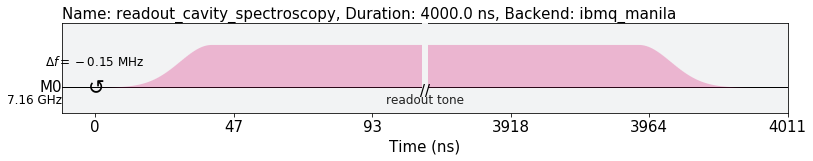

In [ ]:
from qiskit import pulse            # This is where we access all of our Pulse features!
from qiskit.pulse import Play, Acquire
from qiskit.circuit import Parameter      # This is Parameter Class for variable parameters.
import numpy as np

qubit=0   # qubit used in our experiment

readout_time = 4e-6
readout_sigma = 10e-9 

# readout output signal acquisition setup
acquisition_time = readout_time   # We want to acquire the readout signal for the full duration of the readout

center_freq = backend_defaults.meas_freq_est[qubit]  # an estimate for the resonator frequency
freq_span = 0.3e6 # resonator scan span. The span should be larger than the resonator linewidth kappa

frequencies_range = np.linspace(center_freq-freq_span/2, center_freq+freq_span/2, 41)

# build the pulse sequence for low power resonator spectroscopy
freq = Parameter('freq')
amp = Parameter('amp')
with pulse.build(backend=backend, name='readout_cavity_spectroscopy') as meas_spect_sched:
    acq_chan = pulse.acquire_channel(qubit)
    meas_chan = pulse.measure_channel(qubit)
    pulse.set_frequency(freq, meas_chan)
    # We use a square pulse with a Guassian rise and fall time
    duration = get_closest_multiple_of_16(pulse.seconds_to_samples(readout_time))
    sigma = get_closest_multiple_of_16(pulse.seconds_to_samples(readout_sigma))
    width = get_closest_multiple_of_16(pulse.seconds_to_samples(readout_time-8*readout_sigma))
    #drive the resonator
    pulse.play(pulse.GaussianSquare(duration = duration,
                                    amp = amp,
                                    sigma = sigma,
                                    width = width,
                                    name = 'readout tone'), meas_chan)
    #acquire the readout signal
    pulse.acquire(duration = get_closest_multiple_of_16(pulse.seconds_to_samples(acquisition_time)),
                  qubit_or_channel = acq_chan,
                  register = pulse.MemorySlot(qubit))

low_power_schedules = [meas_spect_sched.assign_parameters({freq: f, amp: .3}, inplace=False) for f in frequencies_range]
low_power_schedules[0].draw(backend=backend)

In [ ]:
#from qiskit import assemble
from qiskit.tools.monitor import job_monitor

num_shots_per_frequency = 2*1024

job_low_power = backend.run(low_power_schedules, 
                            meas_level=1, 
                            meas_return='avg', 
                            shots=num_shots_per_frequency)
job_monitor(job_low_power)

low_power_sweep_results = job_low_power.result(timeout=120)

Job Status: job incurred error    


In [ ]:
import matplotlib.pyplot as plt

low_power_sweep_values = []
for i in range(len(low_power_sweep_results.results)):
    res_low_power = low_power_sweep_results.get_memory(i)
    low_power_sweep_values.append(res_low_power[qubit])

low_power_sweep_values = process_reflective_measurement(frequencies_range, low_power_sweep_values)

plt.plot(frequencies_range/1e3, low_power_sweep_values, '-o', color='red', lw=2)

popt_low_power, _=fit_lorentzian(frequencies_range, low_power_sweep_values)

popt_low_power, _=fit_lorentzian(frequencies_range, low_power_sweep_values)
f0, kappa, a, offset = popt_low_power

fs=np.linspace(frequencies_range[0], frequencies_range[-1], 1000)
plt.plot(fs/1e3, lorentzian(fs, *popt_low_power), color='red', ls='--')
plt.annotate("", xy=((f0-kappa/2)/1e3, offset-1/2), xytext=((f0+kappa/2)/1e3, offset-1/2), arrowprops=dict(arrowstyle="<->", color='black'))
plt.annotate("$\kappa$={:d} kHz".format(int(kappa/1e3)), xy=((f0-kappa/2)/1e3, offset-.45), color='black')

plt.grid()
plt.xlabel("Frequency [kHz]")
plt.ylabel("Measured signal [a.u.]")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

low_power_sweep_values = []
for i in range(len(low_power_sweep_results.results)):
    res_low_power = low_power_sweep_results.get_memory(i)
    low_power_sweep_values.append(res_low_power[qubit])

low_power_sweep_values = process_reflective_measurement(frequencies_range, low_power_sweep_values)

plt.plot(frequencies_range/1e3, low_power_sweep_values, '-o', color='red', lw=2)

popt_low_power, _=fit_lorentzian(frequencies_range, low_power_sweep_values)

popt_low_power, _=fit_lorentzian(frequencies_range, low_power_sweep_values)
f0, kappa, a, offset = popt_low_power

fs=np.linspace(frequencies_range[0], frequencies_range[-1], 1000)
plt.plot(fs/1e3, lorentzian(fs, *popt_low_power), color='red', ls='--')
plt.annotate("", xy=((f0-kappa/2)/1e3, offset-1/2), xytext=((f0+kappa/2)/1e3, offset-1/2), arrowprops=dict(arrowstyle="<->", color='black'))
plt.annotate("$\kappa$={:d} kHz".format(int(kappa/1e3)), xy=((f0-kappa/2)/1e3, offset-.45), color='black')

plt.grid()
plt.xlabel("Frequency [kHz]")
plt.ylabel("Measured signal [a.u.]")
plt.show()

In [ ]:
schedule_frequencies = [meas_spect_sched.assign_parameters({freq: f, amp: 1}, inplace=False) for f in frequencies_range]
schedule_frequencies[0].draw(backend=backend)

In [ ]:
frequency_sweep_high_power = backend.run(schedule_frequencies, 
                                         meas_level=1, 
                                         meas_return='avg', 
                                         shots=num_shots_per_frequency)

job_monitor(frequency_sweep_high_power)

high_power_sweep_results = frequency_sweep_high_power.result(timeout=120)

In [ ]:
high_power_sweep_values = []
for i in range(len(high_power_sweep_results.results)):
    res_high_power = high_power_sweep_results.get_memory(i)
    high_power_sweep_values.append(res_high_power[qubit])

high_power_sweep_values = process_reflective_measurement(frequencies_range, high_power_sweep_values)

popt_high_power, _=fit_lorentzian(frequencies_range, high_power_sweep_values)

plt.plot(frequencies_range/1e3, high_power_sweep_values, '-o', color='black', lw=2, label='non-interactive')
plt.plot(frequencies_range/1e3, low_power_sweep_values, '-o', color='red', lw=2, label='dispersive')

fs=np.linspace(frequencies_range[0], frequencies_range[-1],1000)
plt.plot(fs/1e3, lorentzian(fs, *popt_high_power), color='black', ls='--')
plt.plot(fs/1e3, lorentzian(fs, *popt_low_power), color='red', ls='--')

plt.axvline(x=popt_low_power[0]/1e3, color='red')
plt.axvline(x=popt_high_power[0]/1e3, color='black')

chi=popt_low_power[0]-popt_high_power[0]
plt.annotate("", xy=(popt_low_power[0]/1e3, -.1), xytext=(popt_high_power[0]/1e3, -.1), arrowprops=dict(arrowstyle="<->", color='black'))
plt.annotate("$\chi$={:d} kHz".format(int(chi/1e3)), xy=(popt_high_power[0]/1e3, -.05), color='black')

plt.grid()
plt.xlabel("Frequency [kHz]")
plt.ylabel("Measured signal [a.u.]")
plt.legend()
plt.show()

print(r'chi={:.1f} kHz'.format((popt_low_power[0]-popt_high_power[0])/1e3))
Delta=abs(backend_defaults.meas_freq_est[qubit] - backend_defaults.qubit_freq_est[qubit])
print(r'g={:.1f} MHz'.format(np.sqrt(chi*Delta)/1e6))

In [ ]:
drive_sigma = 100e-9
drive_duration = 8*drive_sigma

# We drive our qubit, wait for some time (time delay), and then measure the qubit
# Using these measurements we can create a plot of qubit population vs. time delay
delay_times=np.linspace(0, 600e-6, 61) #measurement time delays
qubit_decay_pulses = []
for delay in delay_times:
    with pulse.build(backend=backend, default_alignment='sequential', name=f"decay delay = {delay * 1e6} us") as temp_decay_pulse:
        drive_chan = pulse.drive_channel(qubit)
        meas_chan = pulse.measure_channel(qubit)
        acq_chan = pulse.acquire_channel(qubit)

        #drive the qubit
        pulse.play(pulse.Gaussian(duration=get_closest_multiple_of_16(pulse.seconds_to_samples(drive_duration)),
                                  amp=.5,
                                  sigma=get_closest_multiple_of_16(pulse.seconds_to_samples(drive_sigma)),
                                  name='qubit tone'), drive_chan)
        #wait for the duration of the time delay before measuring the qubit
        pulse.delay(get_closest_multiple_of_16(pulse.seconds_to_samples(delay)), meas_chan)
                
        with pulse.align_left():
            duration = get_closest_multiple_of_16(pulse.seconds_to_samples(readout_time))
            sigma = get_closest_multiple_of_16(pulse.seconds_to_samples(readout_sigma))
            width = get_closest_multiple_of_16(pulse.seconds_to_samples(readout_time-8*readout_sigma))
            #drive the resonator with low power
            pulse.play(pulse.GaussianSquare(duration = duration,
                                            amp = .3,
                                            sigma = sigma,
                                            width = width,
                                            name = 'low power readout tone'), meas_chan)
            #acquire the readout signal
            pulse.acquire(duration = get_closest_multiple_of_16(pulse.seconds_to_samples(acquisition_time)),
                          qubit_or_channel = acq_chan,
                          register = pulse.MemorySlot(qubit))
        
    qubit_decay_pulses.append(temp_decay_pulse)

In [ ]:
qubit_decay_pulses[1].draw(backend=backend)

In [ ]:
num_shots = 4*1024  # increasing this number will make your output more accurate,
                    # but it will slow down the experiment

job_qubit_decay = backend.run(qubit_decay_pulses, 
                              meas_level=1, 
                              meas_return='avg', 
                              shots=num_shots)

job_monitor(job_qubit_decay)

In [ ]:
qubit_decay_results = job_qubit_decay.result(timeout=120)

qubit_decay_values = []
for i in range(len(delay_times)):
    qubit_decay_values.append(qubit_decay_results.get_memory(i)[qubit])
qubit_decay_values = np.abs(qubit_decay_values)
qubit_decay_values = (qubit_decay_values-min(qubit_decay_values))
qubit_decay_values/=max(qubit_decay_values)

decay_popt, _=fit_exponential(delay_times, qubit_decay_values)
tau=decay_popt[0]
g=1/tau

plt.scatter(delay_times*1e6, qubit_decay_values, color='black') 
plt.plot(delay_times*1e6, exponential(delay_times, *decay_popt), '--', lw=2, color='red', label=r'$\tau$={:.1f} $\mu$s'.format(tau*1e6))
plt.title("$T_1$ Experiment", fontsize=15)
plt.xlabel('Delay before measurement [$\mu$s]', fontsize=15)
plt.ylabel('Signal [a.u.]', fontsize=15)
plt.legend()
plt.show()

print(r'gamma=  {:.2f} kHz'.format(g/1e3))

Measuring the Qubit ac-Stark Shift

In [ ]:
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
# Loading your IBM Q account(s)
provider = IBMQ.enable_account('99e1dd08f2c46188b04a339f1db939ca95b546d2f5ce04176d8a47effe5a12c21cf224a58afb38ee95effeeba182ac34cd14fc18f276cd5ef7948e910f68eea5')
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_manila')

In [ ]:
backend_config = backend.configuration()
backend_defaults = backend.defaults()
dt=backend_config.dt  # hardware resolution
backend.configuration().parametric_pulses = [] # will allow us to send a larger waveform for our experiments

from scipy.optimize import leastsq,minimize, curve_fit

# samples need to be multiples of 16 to accommodate the hardware limitations
def get_closest_multiple_of_16(num):
    return int(num + 8 ) - (int(num + 8 ) % 16)

# lorentzian function
def lorentzian(f, f0, k, a, offs):
    return a*k/(2*np.pi)/((k/2)**2+(f-f0)**2)+offs

#fit_lorentzian takes two arrays that contain the frequencies and experimental output values of each frequency respectively. 
#returns the lorentzian parameters that best fits this output of the experiment.
#popt are the fit parameters and pcov is the covariance matrix for the fit
def fit_lorentzian(freqs,values):
    p0=[freqs[np.argmax(values)],(freqs[-1]-freqs[0])/2,max(values),0]
    bounds=([freqs[0],0,0,-np.inf],[freqs[-1],freqs[-1]-freqs[0],np.inf,np.inf])
    popt,pcov=curve_fit(lorentzian, freqs, values, p0=p0, bounds=bounds)
    return popt,pcov

# Gaussian function
def gaussian(f, f0, sigma, a, offs):
    return a*np.exp(-(f-f0)**2/(2*sigma**2))+offs

#fit_gaussian takes two arrays that contain the frequencies and experimental output values of each frequency respectively. 
#returns the gaussian parameters that best fits this output of the experiment.
#popt are the fit parameters and pcov is the covariance matrix for the fit
def fit_gaussian(freqs,values):
    p0=[freqs[np.argmax(values)],(freqs[-1]-freqs[0])/2,max(values),0]
    bounds=([freqs[0],0,0,-np.inf],[freqs[-1],freqs[-1]-freqs[0],np.inf,np.inf])
    popt,pcov=curve_fit(gaussian, freqs, values, p0=p0, bounds=bounds)
    return popt,pcov

# normalize the data points to fall in the range of [0,1]
def normalize(a):
    a= a-min(a)
    return a/max(a)

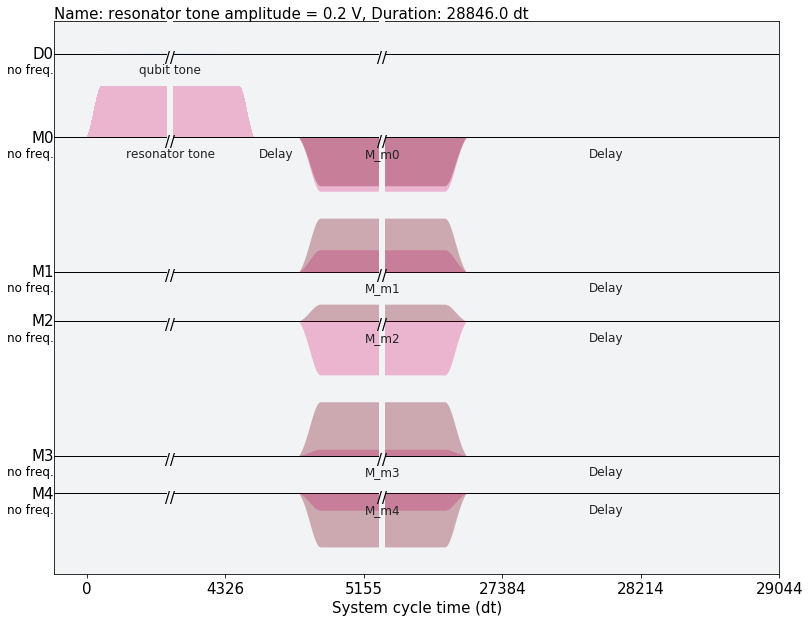

In [ ]:
from qiskit import pulse            # This is where we access all of our Pulse features!
from qiskit.pulse import Play, Acquire
import qiskit.pulse.library as pulse_lib
import numpy as np

qubit=0   # qubit used in our experiment

inst_sched_map = backend_defaults.instruction_schedule_map
# Get the default measurement pulse sequence
measure = inst_sched_map.get('measure', qubits=backend_config.meas_map[0])  

qubit_drive_sigma = 100e-9           #the width of the qubit spectroscopy drive
resonator_drive_sigma=10e-9          #the width of the resonator drive
drive_duration=10*qubit_drive_sigma  #the resonator drive duration

# We use a Gaussian shape pulse to drive the qubit for spectroscopy
qubit_drive = pulse_lib.gaussian(duration = get_closest_multiple_of_16(drive_duration//dt),
                             amp = .1,
                             sigma = get_closest_multiple_of_16(qubit_drive_sigma//dt),
                             name = 'qubit tone')


drive_chan = pulse.DriveChannel(qubit)   # qubit drive channel
meas_chan = pulse.MeasureChannel(qubit)  # resonator channel
acq_chan = pulse.AcquireChannel(qubit)   # readout signal acquisition channel

measurement_delay=20e-9*3

resonator_tone_amplitude = np.linspace(0,1,11) #change to amplitude
resonator_tone_pulses = []
for amp in resonator_tone_amplitude:
    # we use a square pulse with Gaussian rise and fall time to populate the resonator with photons
    temp_resonator_tone=pulse_lib.GaussianSquare(duration = get_closest_multiple_of_16(drive_duration//dt),
                             amp = amp,
                             sigma = get_closest_multiple_of_16(resonator_drive_sigma//dt),
                             width = get_closest_multiple_of_16((drive_duration-4*resonator_drive_sigma)//dt),
                             name = 'resonator tone')
    # pulse sequence for the experiment at different amplitudes
    with pulse.build(name=f"resonator tone amplitude = {np.round(amp,2)} V") as temp_pulse:
        pulse.play(qubit_drive, drive_chan)
        pulse.play(temp_resonator_tone, meas_chan)
        pulse.delay(int(measurement_delay//dt), meas_chan)
        pulse.call(measure)
    
    resonator_tone_pulses.append(temp_pulse)

resonator_tone_pulses[2].draw()

In [ ]:
start=4.960e9  # qubit spectroscopy start frequency
stop=4.980e9   # qubit spectroscopy stop frequency
freqs = np.linspace(start, stop, 41)-500e3
# list of qubit drive frequencies for spectroscopy
schedule_frequencies = [{drive_chan: freq , meas_chan: backend_defaults.meas_freq_est[qubit]} for freq in freqs]

from qiskit.tools.monitor import job_monitor

num_shots = 4*1024

resonator_tone_experiments=[(resonator_tone_pulses[i],
                            {'meas_level':  1,
                             'meas_return': 'avg',
                             'shots':        num_shots,
                             'schedule_los': schedule_frequencies}) for i in range(len(resonator_tone_pulses))]

resonator_tone_results=[]
for experiment, args in resonator_tone_experiments:
    job = backend.run(experiment, **args)
    job_monitor(job)
    resonator_tone_results.append(job.result(timeout=120))

/usr/local/lib/python3.7/dist-packages/qiskit/compiler/assembler.py:461: RuntimeWarning: Dynamic rep rates are supported on this backend. 'rep_delay' will be used instead of 'rep_time'.
  RuntimeWarning,


Job Status: job incurred error    


IBMQJobFailureError: ignored

In [ ]:
import matplotlib.pyplot as plt

skip_idx=0

resonator_tone_values = []
for result in resonator_tone_results:
    result_values=[]
    for i in range(len(result.results)):
        result_values.append(result.get_memory(i)[qubit])

    resonator_tone_values.append(normalize(result_values))
    
plot_extent=[freqs[0]/1e9,freqs[-1]/1e9,resonator_tone_amplitude[skip_idx],resonator_tone_amplitude[-1]]
plt.imshow(np.abs(resonator_tone_values[skip_idx:]), aspect='auto', origin='lower', cmap='viridis',
          extent=plot_extent)

plt.xlabel('Qubit tone frequency [GHz]')
plt.ylabel('Resonator tone amplitude [V]')
plt.title('Qubit ac-Stark shift')
plt.show()

In [ ]:
show_individual_traces=False
skip_idx=3  # number of points to skip

center=[]
fwhm=[]
for i in range(len(resonator_tone_values)):
    popt,pcov=fit_gaussian(freqs,np.abs(np.real(resonator_tone_values[i])))
    center.append(popt[0])
    fwhm.append(2.355*popt[1])
    if show_individual_traces:
        plt.plot(freqs/1e3, np.real(resonator_tone_values[i]))
        plt.plot(freqs/1e3, gaussian(freqs,*popt), '--')
if show_individual_traces: plt.show()

center_fit=np.polyfit(resonator_tone_amplitude[skip_idx:], (center[skip_idx:]-center[0]),1)
plt.plot(resonator_tone_amplitude[skip_idx:], np.poly1d(center_fit/1e6)(resonator_tone_amplitude[skip_idx:]), '--', lw=2, color='grey')
plt.plot(resonator_tone_amplitude[skip_idx:], (center[skip_idx:]-center[0])/1e6, 'o', color='black')
plt.xlabel(r'Resonator tone amplitude [V]')
plt.ylabel(r'$\delta \omega_q (MHz)$')
plt.show()

fwhm_fit=np.polyfit(resonator_tone_amplitude[skip_idx:], np.array(fwhm[skip_idx:]),1)
plt.plot(resonator_tone_amplitude[skip_idx:], np.poly1d(fwhm_fit/1e6)(resonator_tone_amplitude[skip_idx:]), '--', lw=2, color='orange')
plt.plot(resonator_tone_amplitude[skip_idx:], np.array(fwhm[skip_idx:])/1e6, 'o', color='red')
plt.xlabel(r'Resonator tone amplitude [V]')
plt.ylabel(r'FWHM (MHz)')
plt.show()

Hamiltonian Tomography

In [ ]:
!pip install qiskit-aer==0.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 17.5 MB 482 kB/s 
     |████████████████████████████████| 213 kB 46.8 MB/s 
  Attempting uninstall: qiskit-aer
    Found existing installation: qiskit-aer 0.11.0
    Uninstalling qiskit-aer-0.11.0:
      Successfully uninstalled qiskit-aer-0.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit 0.38.0 requires qiskit-aer==0.11.0, but you have qiskit-aer 0.7.0 which is incompatible.


In [ ]:
from qiskit import circuit, pulse, transpile, QuantumCircuit, schedule
from qiskit.pulse import Play
from qiskit.pulse.channels import ControlChannel, DriveChannel
from qiskit.pulse.library import drag, GaussianSquare
from qiskit.test.mock import FakeAthens
import numpy as np
import matplotlib.pyplot as plt

backend = FakeAthens()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  """


In [ ]:
backend_config = backend.configuration()
ham_params = backend_config.hamiltonian['vars']
dt = backend_config.dt
print(f"Sampling time: {dt * 1e9} ns") 

Sampling time: 0.2222222222222222 ns


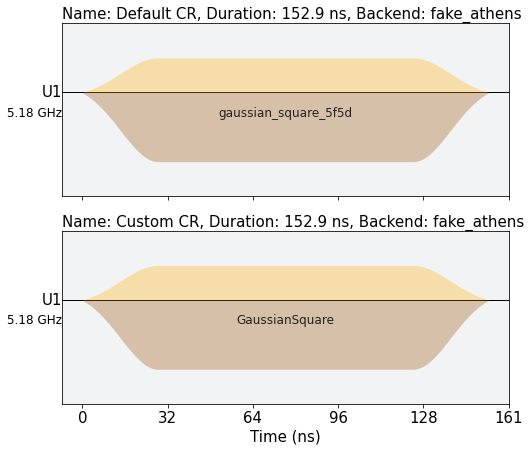

In [ ]:
qc = 1
qt = 0
    
backend_defaults = backend.defaults()
inst_sched_map = backend_defaults.instruction_schedule_map 
cr_pulse = inst_sched_map.get('cx', (0, 1)).filter(channels = [ControlChannel(1)], instruction_types=[Play]).instructions[0][1].pulse

pulse_amp = cr_pulse.parameters['amp']  #import amplitude from cr_pulse to match the phase

#declare pulse parameters and build GaussianSquare pulse
cr_params = {}
cr_params['duration'] = 688
cr_params['amp'] = pulse_amp
cr_params['sigma'] = 64
cr_params['width'] = 432
my_cr_pulse = GaussianSquare(**cr_params)

fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(8, 7))

with pulse.build(backend, name="Default CR") as cr_sched_default:  
        pulse.play(cr_pulse, ControlChannel(1)) 
cr_sched_default.draw(backend = backend, axis=axes[0])
axes[0].set_xlabel("")

with pulse.build(backend, name="Custom CR") as cr_sched_custom:
    pulse.play(my_cr_pulse, ControlChannel(1))
cr_sched_custom.draw(backend = backend, axis=axes[1])

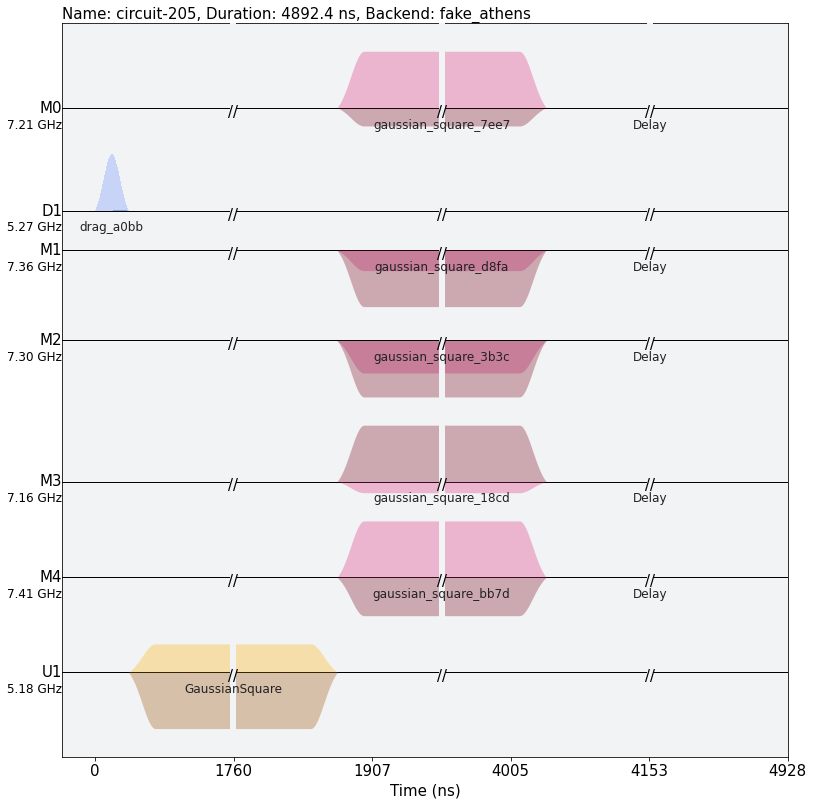

In [ ]:
def build_cr_scheds(qc: int, qt: int, cr_times, phase = 0.0, ZI_MHz = 0.0) -> np.array:
    """Build an array of cross resonance schedules for the Hamiltonian tomography experiment.
    
    Args:
      qc: control qubit index
      qt: target qubit index
      cr_times: array of widths of the cross resonance pulses
      phase: phase offset of the cross resonance pulse (rad)
      ZI_MHz: ZI interaction rate (in MHz) to correct for with frame change
    """
    tomo_circs = []
    
    cr_gate = circuit.Gate('cr', num_qubits = 2, params = []) 
    cr_risefall = (cr_params['duration'] - cr_params['width']) / (2 * cr_params['sigma'])
    
    for width in cr_times:
        tomo_cr_params = cr_params.copy()
        tomo_cr_params['duration'] = int(width + 2 * cr_risefall * cr_params['sigma'])
        tomo_cr_params['width'] = width
        framechange = 2 * np.pi * int(width) * dt * ZI_MHz * 1e6
        
        with pulse.build(backend) as cr_sched:
            uchan = pulse.control_channels(qc, qt)[0]
            with pulse.phase_offset(phase, uchan):
                pulse.play(GaussianSquare(**tomo_cr_params), uchan)
                
        for basis in ['X', 'Y', 'Z']:
            for control in ['0', '1']:
                tomo_circ = circuit.QuantumCircuit(5)  #use all qubits to avoid error
                if control == '1':
                    tomo_circ.x(qc)# flip control from |0> to |1>
                tomo_circ.append(cr_gate, [qc, qt])  #apply custom cr_gate
                tomo_circ.rz(-framechange, qc)  #apply frame change on the qc
                tomo_circ.barrier(qc, qt)
                if basis == 'X':
                    tomo_circ.h(qt)
                elif basis == 'Y':
                    tomo_circ.sdg(qt)
                    tomo_circ.h(qt)
                tomo_circ.measure_all()   
                tomo_circ.add_calibration(gate=cr_gate, qubits=[qc, qt], schedule=cr_sched)
                tomo_circs.append(tomo_circ)
                
    tomo_circs_transpiled = transpile(tomo_circs, backend, optimization_level = 1)            
    return schedule(tomo_circs_transpiled, backend)

# remember samples must be in multiples of 16
cr_times = 16*np.linspace(0, 500, 21)
cr_scheds = build_cr_scheds(qc, qt, cr_times)
cr_scheds[-1].draw(backend = backend)

In [ ]:
from qiskit import assemble
from qiskit.providers.aer import PulseSimulator
from qiskit.providers.aer.pulse import PulseSystemModel

backend_model= PulseSystemModel.from_backend(backend)
backend_sim = PulseSimulator()
qubit_lo_freq = backend_model.hamiltonian.get_qubit_lo_from_drift()

def run_pulse(sched): 
    """Runs the scheduled experiment on the simulated backend.
    
    Args:
      sched: pulse schedule to run
    """
    # assemble the qobj
    test_qobj = assemble(sched,
                        backend = backend_sim,
                        qubit_lo_freq = qubit_lo_freq,
                        meas_level = 1, 
                        meas_return = 'avg',
                        shots = 2048)
    
    # run simulation
    sim_result = backend_sim.run(test_qobj, system_model=backend_model).result()
    return sim_result.get_memory(0)


def run_ham_tomo(cr_times, cr_scheds):
    """Run Hamiltonian tomography experiment and return results.
    
    Args:
      cr_times: widths of cross resonance pulses
      cr_scheds: array of pulse schedules for Ham Tomo experiment
    """
    # expectation values of target conditioned on control
    avg_t_c = np.zeros((6, len(cr_times)), dtype = complex)

    # sanity check: expectation values of control conditioned on control
    avg_c_c = np.zeros((6, len(cr_times)), dtype = complex)

    for ii in range(len(cr_scheds)):
        result = run_pulse(cr_scheds[ii])
        avg_t_c[ii % 6, ii // 6] = 1 - 2 * result[qt]
        avg_c_c[ii % 6, ii // 6] = result[qc]
        print(ii + 1, "/",len(cr_scheds), end = "\r")
        
    return np.real(avg_t_c), np.real(avg_c_c)

avg_t_c, avg_c_c = run_ham_tomo(cr_times, cr_scheds)

KeyboardInterrupt: ignored

In [ ]:
from scipy.optimize import curve_fit

def get_omega(eDelta, eOmega_x, eOmega_y):
    """Return \Omega from parameter arguments."""
    eOmega = np.sqrt(eDelta**2 + eOmega_x**2 + eOmega_y**2)
    return eOmega

def avg_X(t, eDelta, eOmega_x, eOmega_y):
    """Return average X Pauli measurement vs time t"""
    eOmega = get_omega(eDelta, eOmega_x, eOmega_y)
    eXt = (-eDelta*eOmega_x + eDelta*eOmega_x*np.cos(eOmega*t) + \
           eOmega*eOmega_y*np.sin(eOmega*t)) / eOmega**2
    return eXt

def avg_Y(t, eDelta, eOmega_x, eOmega_y):
    """Return average Y Pauli measurement vs time t"""
    eOmega = get_omega(eDelta, eOmega_x, eOmega_y)
    eYt = (eDelta*eOmega_y - eDelta*eOmega_y*np.cos(eOmega*t) - \
           eOmega*eOmega_x*np.sin(eOmega*t)) / eOmega**2
    return eYt

def avg_Z(t, eDelta, eOmega_x, eOmega_y):
    """Return average Z Pauli measurement vs time t"""
    eOmega = get_omega(eDelta, eOmega_x, eOmega_y)
    eZt = (eDelta**2 + (eOmega_x**2 + eOmega_y**2)*np.cos(eOmega*t)) / eOmega**2
    return eZt

def rt_evol(ts, eDelta, eOmega_x, eOmega_y):
    """Stack average X,Y,Z Pauli measurements vertically."""
    return np.vstack([avg_X(ts, eDelta, eOmega_x, eOmega_y), \
                     avg_Y(ts, eDelta, eOmega_x, eOmega_y), \
                     avg_Z(ts, eDelta, eOmega_x, eOmega_y)])
    
def rt_flat(ts, eDelta, eOmega_x, eOmega_y):
    """Flatten X,Y,Z Pauli measurement data into 1D array."""
    return rt_evol(ts[0:len(ts)//3], eDelta, eOmega_x, eOmega_y).flatten()

def fit_rt_evol(ts, eXt, eYt, eZt, p0):
    """Use curve_fit to determine fit parameters of X,Y,Z Pauli measurements together."""
    rt_vec = np.asarray([eXt, eYt, eZt])
    
    return curve_fit(rt_flat, np.tile(ts, 3), rt_vec.flatten(), p0=p0, method='trf')

def get_interation_rates_MHz(ground_fit, excited_fit):
    """Determine interaction rates from fits to ground and excited control qubit data."""
    Delta0 = (ground_fit[0]/dt)/1e6
    Omega0_x = (ground_fit[1]/dt)/1e6
    Omega0_y = (ground_fit[2]/dt)/1e6
    Delta1 = (excited_fit[0]/dt)/1e6
    Omega1_x = (excited_fit[1]/dt)/1e6
    Omega1_y = (excited_fit[2]/dt)/1e6
    
    IX = 0.5*(Omega0_x + Omega1_x)
    IY = 0.5*(Omega0_y + Omega1_y)
    IZ = 0.5*(Delta0 + Delta1)
    ZX = 0.5*(Omega0_x - Omega1_x)
    ZY = 0.5*(Omega0_y - Omega1_y)
    ZZ = 0.5*(Delta0 - Delta1)
    
    return [[IX, IY, IZ], [ZX, ZY, ZZ]]

def plot_cr_ham_tomo(cr_times, avg_t_c, avg_c_c, ground_fit, excited_fit):
    """Plot Hamiltonian tomography data and curve fits with interaction rates."""
    coeffs = get_interation_rates_MHz(ground_fit, excited_fit)
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,15), sharey = True)
    ax1.scatter(cr_times, avg_t_c[0,:].real, lw=3.0, color='blue', label='ctrl in |0>')
    ax1.plot(cr_times, avg_X(cr_times, *ground_fit), lw=3.0, color='blue')
    ax1.scatter(cr_times, avg_t_c[1,:].real, lw=3.0, color='red', label='ctrl in |1>')
    ax1.plot(cr_times, avg_X(cr_times, *excited_fit), lw=3.0, color='red')
    ax1.set_ylabel('<X(t)>', fontsize=20)
    ax1.set_title('Pauli Expectation Value', fontsize=20)
    ax1.legend(loc=4, fontsize=14)
    ax2.scatter(cr_times, avg_t_c[2,:].real, lw=3.0, color='blue', label='ctrl in |0>')
    ax2.plot(cr_times, avg_Y(cr_times, *ground_fit), lw=3.0, color='blue')
    ax2.scatter(cr_times, avg_t_c[3,:].real, lw=3.0, color='red', label='ctrl in |1>')
    ax2.plot(cr_times, avg_Y(cr_times, *excited_fit), lw=3.0, color='red')
    ax2.set_title('IX = %.3f MHz   IY = %.3f MHz   IZ = %.3f MHz' % \
              (coeffs[0][0], coeffs[0][1], coeffs[0][2]), fontsize=20)
    ax2.set_ylabel('<Y(t)>', fontsize=20)
    ax2.legend(loc=4, fontsize=14)
    ax3.scatter(cr_times, avg_t_c[4,:].real, lw=3.0, color='blue', label='ctrl in |0>')
    ax3.plot(cr_times, avg_Z(cr_times, *ground_fit), lw=3.0, color='blue')
    ax3.scatter(cr_times, avg_t_c[5,:].real, lw=3.0, color='red', label='ctrl in |1>')
    ax3.plot(cr_times, avg_Z(cr_times, *excited_fit), lw=3.0, color='red')
    ax3.set_title('ZX = %.3f MHz   ZY = %.3f MHz   ZZ = %.3f MHz' % \
              (coeffs[1][0], coeffs[1][1], coeffs[1][2]), fontsize=20)
    ax3.set_ylabel('<Z(t)>', fontsize=20)
    ax3.set_xlabel('time (dt)', fontsize=20)
    ax3.legend(loc=4, fontsize=14)

ground_fit,_ = fit_rt_evol(cr_times, avg_t_c[0,:], avg_t_c[2,:], avg_t_c[4,:], p0=[0.0002, 0.0002, 0.0005])
excited_fit,_ = fit_rt_evol(cr_times, avg_t_c[1,:], avg_t_c[3,:], avg_t_c[5,:], p0=[0.0002, 0.001, 0.001])

plot_cr_ham_tomo(cr_times, avg_t_c, avg_c_c, ground_fit, excited_fit)

NameError: ignored

In [ ]:
coeffs = get_interation_rates_MHz(ground_fit, excited_fit)
ZX_rate = coeffs[1][0]
ZY_rate = coeffs[1][1]
phase = -np.arctan2(ZY_rate, ZX_rate)
print('Phase from ZY/ZX ratio is '+str(phase))

In [ ]:
cr_scheds = build_cr_scheds(qc, qt, cr_times, phase=phase)
avg_t_c_mod, avg_c_c_mod = run_ham_tomo(cr_times, cr_scheds)

In [ ]:
ground_fit_mod,_ = fit_rt_evol(cr_times, avg_t_c_mod[0,:], avg_t_c_mod[2,:], avg_t_c_mod[4,:], p0=[0, 0, 0.0001])
excited_fit_mod,_ = fit_rt_evol(cr_times, avg_t_c_mod[1,:], avg_t_c_mod[3,:], avg_t_c_mod[5,:], p0=[0.001, 0.001, 0.0000001])

plot_cr_ham_tomo(cr_times, avg_t_c_mod, avg_c_c_mod, ground_fit_mod, excited_fit_mod)

In [ ]:
def build_cr_ramsey_scheds(qc: int, qt: int, cr_times, phase=0.0, ZI_MHz=0.0) -> np.array:
    """Build array of pulse schedules for CR Ramsey experiment.
    
    Args:
      qc: control qubit index
      qt: target qubit index
      cr_times: width of cross resonance pulses (in dt)
      phase: phase offset of cross resonance pulse (rad)
      ZI_MHz: Z-rotation rate of control qubit (in MHz) compensated in software by frame change
    """
    scheds = []

    cr_gate = circuit.Gate('cr', num_qubits=2, params=[]) 
    cr_risefall = (cr_params['duration'] - cr_params['width']) / (2 * cr_params['sigma'])
    
    for width in cr_times:
        ramsey_cr_params = cr_params.copy()
        ramsey_cr_params['duration'] = int(width + 2 * cr_risefall * cr_params['sigma'])
        ramsey_cr_params['width'] = width
        framechange = 2 * np.pi * int(width) * dt * ZI_MHz * 1e6
        with pulse.build(backend) as cr_sched:
            uchan = pulse.control_channels(qc, qt)[0]
            with pulse.phase_offset(phase, uchan):
                pulse.play(GaussianSquare(**ramsey_cr_params), uchan)    
        ramsey_circ = circuit.QuantumCircuit(5)    

        ramsey_circ.sx(qc)
        
        ramsey_circ.append(cr_gate, [qc, qt])
        ramsey_circ.rz(-framechange, qc)      

        ramsey_circ.sx(qc)

        
        ramsey_circ.measure_all()   
        ramsey_circ.add_calibration(gate=cr_gate, qubits=[qc, qt], schedule=cr_sched) 
        ramsey_circ_transpiled = transpile(ramsey_circ, backend, optimization_level=1)
        sched = schedule(ramsey_circ_transpiled, backend)       
        scheds.append(sched)
    
    return scheds

cr_ramsey_times = 16*np.linspace(0, 100, 21)
cr_ramsey_scheds = build_cr_ramsey_scheds(qc, qt, cr_ramsey_times)
cr_ramsey_scheds[-1].draw(backend = backend)

In [ ]:
cr_ramsey_result = []
count = 0
for sched in cr_ramsey_scheds:
    results = run_pulse(sched)
    cr_ramsey_result.append(np.real(1 - 2 * results[qc]))
    count += 1
    print(count, "/", len(cr_ramsey_scheds), end = "\r")

In [ ]:
def decay_sin(t, f, a, phi, tau, offset):
    """Fit function for exponentially-decaying sinusoid."""
    return a * np.exp(-t / tau) * np.sin(2 * np.pi * f * t - phi) + offset

def fit_decay_sin(ts, values, p0):
    """Perform fit of decaying sinusoid."""
    return curve_fit(decay_sin, ts, values, p0=p0)

def plot_cr_ramsey(cr_ramsey_times, cr_ramsey_result, ramsey_fit):
    """Plot CR Ramsey experiment and fit with ZI interaction rate."""
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.scatter(cr_ramsey_times, cr_ramsey_result, lw = 3.0, color = 'red')
    ax.plot(cr_ramsey_times, decay_sin(cr_ramsey_times, *ramsey_fit), lw = 3.0, color = 'red')
    ax.set_ylabel('<Z(t)>', fontsize = 20)
    ax.set_title('CR Ramsey Rate (ZI = %.3f MHz)' % ((ramsey_fit[0] / dt) / 1e6), fontsize = 20)
    ax.set_xlabel('time (dt)', fontsize = 20)

ramsey_fit,_ = fit_decay_sin(cr_ramsey_times, cr_ramsey_result, p0 = [0.0025, 1, -np.pi / 2, 300, 0.5])
plot_cr_ramsey(cr_ramsey_times, cr_ramsey_result, ramsey_fit)

In [ ]:
oscillator_freqs = [] # qubit transition frequencies
SF = 1 / (2 * np.pi) # scale factor to convert from angular frequency to Hz

for key in ham_params:
    if 'wq' in key:
        oscillator_freqs.append(ham_params[key] * SF)

ZI_rate = np.sign(oscillator_freqs[qc] - oscillator_freqs[qt]) * (ramsey_fit[0] / dt) / 1e6
print('Shift frame according to ZI rate of %.3f MHz' % ZI_rate)

In [ ]:
# run simulation to longer times
cr_ramsey_times = 16 * np.linspace(0, 250, 21)
cr_ramsey_scheds = build_cr_ramsey_scheds(1, 0, cr_ramsey_times, phase = 0, ZI_MHz = ZI_rate)

cr_ramsey_result = []
count = 0

for sched in cr_ramsey_scheds:
    result = run_pulse(sched)
    cr_ramsey_result.append(np.real(1 - 2 * result[qc]))
    count += 1
    print(count, "/", len(cr_ramsey_scheds), end = "\r")

In [ ]:
ramsey_fit,_ = fit_decay_sin(cr_ramsey_times, cr_ramsey_result, p0 = [0.00001, 0.1, 0, 300, -0.1])
plot_cr_ramsey(cr_ramsey_times, cr_ramsey_result, ramsey_fit)

Lab 1. Quantum Circuits

In [3]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

In [4]:
def NOT(inp):
    """An NOT gate.
    
    Parameters:
        inp (str): Input, encoded in qubit 0.
        
    Returns:
        QuantumCircuit: Output NOT circuit.
        str: Output value measured from qubit 0.
    """

    qc = QuantumCircuit(1, 1) # A quantum circuit with a single qubit and a single classical bit
    qc.reset(0)
    
    # We encode '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0'
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
    if inp=='1':
        qc.x(0)
        
    # barrier between input state and gate operation 
    qc.barrier()
    
    # Now we've encoded the input, we can do a NOT on it using x
    qc.x(0)
    
    #barrier between gate operation and measurement
    qc.barrier()
    
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0]
    qc.measure(0,0)
    qc.draw('mpl')
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
    
    return qc, output

## Test the function
for inp in ['0', '1']:
    qc, out = NOT(inp)
    print('NOT with input',inp,'gives output',out)
    display(qc.draw())
    print('\n')

NOT with input 0 gives output 1


░ ┌───┐ ░ ┌─┐
  q: ─|0>──░─┤ X ├─░─┤M├
           ░ └───┘ ░ └╥┘
c: 1/═════════════════╩═
                      0



NOT with input 1 gives output 0


┌───┐ ░ ┌───┐ ░ ┌─┐
  q: ─|0>─┤ X ├─░─┤ X ├─░─┤M├
          └───┘ ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0

In [5]:
def XOR(inp1,inp2):
    """An XOR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 1.
    """
  
    qc = QuantumCircuit(2, 1) 
    qc.reset(range(2))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    # this is where your program for quantum XOR gate goes
    
    
    
    
    
    
    
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    qc.measure(1,0) # output from qubit 1 is measured
  
    #We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    #Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = XOR(inp1, inp2)
        print('XOR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

XOR with inputs 0 0 gives output 0


░  ░    
q_0: ─|0>──░──░────
           ░  ░ ┌─┐
q_1: ─|0>──░──░─┤M├
           ░  ░ └╥┘
c: 1/════════════╩═
                 0



XOR with inputs 0 1 gives output 1


░  ░    
q_0: ─|0>───────░──░────
          ┌───┐ ░  ░ ┌─┐
q_1: ─|0>─┤ X ├─░──░─┤M├
          └───┘ ░  ░ └╥┘
c: 1/═════════════════╩═
                      0



XOR with inputs 1 0 gives output 0


┌───┐ ░  ░    
q_0: ─|0>─┤ X ├─░──░────
          └───┘ ░  ░ ┌─┐
q_1: ─|0>───────░──░─┤M├
                ░  ░ └╥┘
c: 1/═════════════════╩═
                      0



XOR with inputs 1 1 gives output 1


┌───┐ ░  ░    
q_0: ─|0>─┤ X ├─░──░────
          ├───┤ ░  ░ ┌─┐
q_1: ─|0>─┤ X ├─░──░─┤M├
          └───┘ ░  ░ └╥┘
c: 1/═════════════════╩═
                      0

In [6]:
def AND(inp1,inp2):
    """An AND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(2))
  
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()

    # this is where your program for quantum AND gate goes

    
    
    
    
    

    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = AND(inp1, inp2)
        print('AND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

AND with inputs 0 0 gives output 0


░  ░    
q_0: ─|0>──░──░────
           ░  ░    
q_1: ─|0>──░──░────
           ░  ░ ┌─┐
q_2: ──────░──░─┤M├
           ░  ░ └╥┘
c: 1/════════════╩═
                 0



AND with inputs 0 1 gives output 0


░  ░    
q_0: ─|0>───────░──░────
          ┌───┐ ░  ░    
q_1: ─|0>─┤ X ├─░──░────
          └───┘ ░  ░ ┌─┐
q_2: ───────────░──░─┤M├
                ░  ░ └╥┘
c: 1/═════════════════╩═
                      0



AND with inputs 1 0 gives output 0


┌───┐ ░  ░    
q_0: ─|0>─┤ X ├─░──░────
          └───┘ ░  ░    
q_1: ─|0>───────░──░────
                ░  ░ ┌─┐
q_2: ───────────░──░─┤M├
                ░  ░ └╥┘
c: 1/═════════════════╩═
                      0



AND with inputs 1 1 gives output 0


┌───┐ ░  ░    
q_0: ─|0>─┤ X ├─░──░────
          ├───┤ ░  ░    
q_1: ─|0>─┤ X ├─░──░────
          └───┘ ░  ░ ┌─┐
q_2: ───────────░──░─┤M├
                ░  ░ └╥┘
c: 1/═════════════════╩═
                      0

In [7]:
def NAND(inp1,inp2):
    """An NAND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output NAND circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
    
    # this is where your program for quantum NAND gate goes


    
    
    
    
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = NAND(inp1, inp2)
        print('NAND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

NAND with inputs 0 0 gives output 0


░  ░    
q_0: ─|0>──░──░────
           ░  ░    
q_1: ─|0>──░──░────
           ░  ░ ┌─┐
q_2: ─|0>──░──░─┤M├
           ░  ░ └╥┘
c: 1/════════════╩═
                 0



NAND with inputs 0 1 gives output 0


░  ░    
q_0: ─|0>───────░──░────
          ┌───┐ ░  ░    
q_1: ─|0>─┤ X ├─░──░────
          └───┘ ░  ░ ┌─┐
q_2: ─|0>───────░──░─┤M├
                ░  ░ └╥┘
c: 1/═════════════════╩═
                      0



NAND with inputs 1 0 gives output 0


┌───┐ ░  ░    
q_0: ─|0>─┤ X ├─░──░────
          └───┘ ░  ░    
q_1: ─|0>───────░──░────
                ░  ░ ┌─┐
q_2: ─|0>───────░──░─┤M├
                ░  ░ └╥┘
c: 1/═════════════════╩═
                      0



NAND with inputs 1 1 gives output 0


┌───┐ ░  ░    
q_0: ─|0>─┤ X ├─░──░────
          ├───┤ ░  ░    
q_1: ─|0>─┤ X ├─░──░────
          └───┘ ░  ░ ┌─┐
q_2: ─|0>───────░──░─┤M├
                ░  ░ └╥┘
c: 1/═════════════════╩═
                      0

In [8]:
def OR(inp1,inp2):
    """An OR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """

    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
   
    # this is where your program for quantum OR gate goes


    
    
    
    
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = OR(inp1, inp2)
        print('OR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

OR with inputs 0 0 gives output 0


░  ░    
q_0: ─|0>──░──░────
           ░  ░    
q_1: ─|0>──░──░────
           ░  ░ ┌─┐
q_2: ─|0>──░──░─┤M├
           ░  ░ └╥┘
c: 1/════════════╩═
                 0



OR with inputs 0 1 gives output 0


░  ░    
q_0: ─|0>───────░──░────
          ┌───┐ ░  ░    
q_1: ─|0>─┤ X ├─░──░────
          └───┘ ░  ░ ┌─┐
q_2: ─|0>───────░──░─┤M├
                ░  ░ └╥┘
c: 1/═════════════════╩═
                      0



OR with inputs 1 0 gives output 0


┌───┐ ░  ░    
q_0: ─|0>─┤ X ├─░──░────
          └───┘ ░  ░    
q_1: ─|0>───────░──░────
                ░  ░ ┌─┐
q_2: ─|0>───────░──░─┤M├
                ░  ░ └╥┘
c: 1/═════════════════╩═
                      0



OR with inputs 1 1 gives output 0


┌───┐ ░  ░    
q_0: ─|0>─┤ X ├─░──░────
          ├───┤ ░  ░    
q_1: ─|0>─┤ X ├─░──░────
          └───┘ ░  ░ ┌─┐
q_2: ─|0>───────░──░─┤M├
                ░  ░ └╥┘
c: 1/═════════════════╩═
                      0

In [9]:
IBMQ.enable_account('99e1dd08f2c46188b04a339f1db939ca95b546d2f5ce04176d8a47effe5a12c21cf224a58afb38ee95effeeba182ac34cd14fc18f276cd5ef7948e910f68eea5')

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [10]:
IBMQ.providers()
provider = IBMQ.get_provider('ibm-q')
provider.backends()

import qiskit.tools.jupyter

backend_ex = provider.get_backend('ibmq_lima')
backend_ex

backends = provider.backends(filters = lambda x:x.configuration().n_qubits >= 2 and not x.configuration().simulator
                             and x.status().operational==True)
backends

from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                        not x.configuration().simulator and x.status().operational==True))
backend

# run this cell
backend = provider.get_backend('ibmq_quito')

qc_and = QuantumCircuit(3)
qc_and.ccx(0,1,2)
print('AND gate')
display(qc_and.draw())
print('\n\nTranspiled AND gate with all the required connectivity')
qc_and.decompose().draw()

AND gate


q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘



Transpiled AND gate with all the required connectivity


┌───┐      
q_0: ───────────────────■─────────────────────■────■───┤ T ├───■──
                        │             ┌───┐   │  ┌─┴─┐┌┴───┴┐┌─┴─┐
q_1: ───────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ Tdg ├┤ X ├
     ┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌─┴─┐├───┤└┬───┬┘└───┘
q_2: ┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├──────
     └───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ └───┘

In [11]:
from qiskit.tools.monitor import job_monitor

# run the cell to define AND gate for real quantum system

def AND(inp1, inp2, backend, layout):
    
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()
    qc.ccx(0, 1, 2) 
    qc.barrier()
    qc.measure(2, 0) 
  
    qc_trans = transpile(qc, backend, initial_layout=layout, optimization_level=3)
    job = backend.run(qc_trans, shots=8192)
    print(job.job_id())
    job_monitor(job)
    
    output = job.result().get_counts()
    
    return qc_trans, output

In [13]:
backend
layout = 

SyntaxError: ignored

In [12]:
output_all = []
qc_trans_all = []
prob_all = []

worst = 1
best = 0
for input1 in ['0','1']:
    for input2 in ['0','1']:
        qc_trans, output = AND(input1, input2, backend, layout)
        
        output_all.append(output)
        qc_trans_all.append(qc_trans)
        
        prob = output[str(int( input1=='1' and input2=='1' ))]/8192
        prob_all.append(prob)
        
        print('\nProbability of correct answer for inputs',input1,input2)
        print('{:.2f}'.format(prob) )
        print('---------------------------------')
        
        worst = min(worst,prob)
        best = max(best, prob)
        
print('')
print('\nThe highest of these probabilities was {:.2f}'.format(best))
print('The lowest of these probabilities was {:.2f}'.format(worst))

NameError: ignored

In [14]:
print('Transpiled AND gate circuit for ibmq_vigo with input 0 0')
print('\nThe circuit depth : {}'.format (qc_trans_all[0].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[0].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[0]) )
qc_trans_all[0].draw('mpl')

print('Transpiled AND gate circuit for ibmq_vigo with input 0 1')
print('\nThe circuit depth : {}'.format (qc_trans_all[1].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[1].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[1]) )
qc_trans_all[1].draw('mpl')

print('Transpiled AND gate circuit for ibmq_vigo with input 1 0')
print('\nThe circuit depth : {}'.format (qc_trans_all[2].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[2].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[2]) )
qc_trans_all[2].draw('mpl')

print('Transpiled AND gate circuit for ibmq_vigo with input 1 1')
print('\nThe circuit depth : {}'.format (qc_trans_all[3].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[3].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[3]) )
qc_trans_all[3].draw('mpl')

Transpiled AND gate circuit for ibmq_vigo with input 0 0


IndexError: ignored

Lab 2. Quantum Measurement

In [15]:
from qiskit import *
import numpy as np
from numpy import linalg as la
from qiskit.tools.monitor import job_monitor
import qiskit.tools.jupyter

In [16]:
qc = QuantumCircuit(1, 1)

#### your code goes here

# z measurement of qubit 0
measure_z = QuantumCircuit(1,1)
measure_z.measure(0,0)

# x measurement of qubit 0
measure_x = QuantumCircuit(1,1)
# your code goes here







# y measurement of qubit 0
measure_y = QuantumCircuit(1,1)
# your code goes here







shots = 2**14 # number of samples used for statistics
sim = Aer.get_backend('aer_simulator')
bloch_vector_measure = []
for measure_circuit in [measure_x, measure_y, measure_z]:
    
    # run the circuit with the selected measurement and get the number of samples that output each bit value
    circ_trans = transpile(qc.compose(measure_circuit), sim)
    counts = sim.run(qc.compose(circ_trans), shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {}
    for output in ['0','1']:
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
            
    bloch_vector_measure.append( probs['0'] -  probs['1'] )

# normalizing the Bloch sphere vector
bloch_vector = bloch_vector_measure/la.norm(bloch_vector_measure)

print('The Bloch sphere coordinates are [{0:4.3f}, {1:4.3f}, {2:4.3f}]'
      .format(*bloch_vector))    

QiskitError: ignored

In [17]:
from kaleidoscope.interactive import bloch_sphere

bloch_sphere(bloch_vector, vectors_annotation=True)

ModuleNotFoundError: ignored

In [ ]:
from qiskit.visualization import plot_bloch_vector

plot_bloch_vector( bloch_vector )